# **ELL409 Assignment 2**

## PART 1A

Load dataset

In [2]:
from google.colab import files
uploaded = files.upload()

Saving 2019EE10451.csv to 2019EE10451.csv


Import all required libraries and packages

In [3]:
import io
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from PIL import Image

Save the csv data to a dataframe named under the column headings for features as F1, F2, ... F25 and the class_label

In [4]:
IMAGE_DATA = pd.read_csv(io.BytesIO(uploaded['2019EE10451.csv']), names=['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20', 'F21', 'F22', 'F23', 'F24', 'F25', 'class_label'])
IMAGE_DATA

F1        F2        F3  ...       F24       F25  class_label
0     0.159628  3.569244  0.946156  ... -0.007435  0.295797          7.0
1    -3.757384 -2.659323  0.574455  ... -0.340756  0.341713          1.0
2     1.299146 -2.735298 -0.370838  ...  0.705935  0.021808          3.0
3     2.133980 -1.039969  2.982761  ...  0.615282 -0.870809          2.0
4    -0.003326  0.901577  1.910635  ... -0.098434  0.444234          5.0
...        ...       ...       ...  ...       ...       ...          ...
2995  2.379232 -4.261587  1.556199  ...  1.678325 -0.054884          2.0
2996  1.821868 -1.216249  0.214245  ...  0.444243 -0.022632          6.0
2997  1.565306  1.507884 -0.180076  ...  1.520698 -0.680300          0.0
2998  0.342392 -1.140653 -0.959847  ... -1.088615  0.096745          5.0
2999 -1.108781 -1.079360  1.237192  ... -0.301634  1.873800          3.0

[3000 rows x 26 columns]

### **Attempt to plot the data values (image)**

We take every 5 set of features a pixel values (relative) in every row (horizontal).


In [5]:
def print_image_h(m, IMAGE_NAME):
  image1 = IMAGE_DATA.iloc[m,:].values
  val = image1[25 ]
  image1 = image1[0:25]
  i1 = [[0]*5]*5
  i,j=0,0
  while(i<5):
    while(j<5):
      i1[i][j] = image1[i+j]
      j = j+1
    i = i+1
  img1 = np.array(i1, dtype=np.uint8)
  img = Image.fromarray(img1)
  size = 500, 300
  img = img.resize(size)
  print('image number =', m, 'index value:', val)
  return img


In [ ]:
for i in range(0,20):
  display(print_image_h(i, 'img.png'))
  print('\n')

We take every 5 set of features a pixel values (relative) in every column (vertical).

In [7]:
def print_image_v(m, IMAGE_NAME):
  image1 = IMAGE_DATA.iloc[m,:].values
  val = image1[25]
  image1 = image1[0:25]
  i1 = [[0]*5]*5
  i,j=0,0
  while(i<5):
    while(j<5):
      i1[i][j] = image1[i+5*j]
      j = j+1
    i = i+1
  img1 = np.array(i1, dtype=np.uint8)
  img = Image.fromarray(img1)
  size = 500, 300
  img = img.resize(size)
  print('image number =', m, 'index value:', val)
  return img


In [ ]:
for i in range(0,20):
  display(print_image_v(i, 'img.png'))
  print('\n')

###**Trial for LIBSVM Library**

In [9]:
!pip install -U libsvm-official
from libsvm.svmutil import *

  Created wheel for libsvm-official: filename=libsvm_official-3.25.0-cp37-cp37m-linux_x86_64.whl size=99086 sha256=7ba5bb96399c327e59fbbf8e454ee08e3bd84c956403cea4facd3a090141993b
  Stored in directory: /root/.cache/pip/wheels/c2/c8/dc/2dea0257b8e7196981e07a44abd9b33b0c38abb1a141b6a4f8
Successfully built libsvm-official


In [10]:
x = IMAGE_DATA.drop(['class_label'], axis = 1)
x = x.to_numpy()
y = IMAGE_DATA['class_label']
y = y.to_numpy()

In [11]:
prob = svm_problem(y,x)
param = svm_parameter()
param = svm_parameter('-t 0 -c 4 -b 1')
model = svm_train(prob, param)

In [12]:
p_label, p_acc, p_val = svm_predict(y, x, model, '-b 1')
ACC, MSE, SCC = evaluations(y, p_label)

Accuracy = 95% (2850/3000) (classification)


In [13]:
# -t 0 is LINEAR model  

prob = svm_problem(y,x)
#param = svm_parameter(kernel_type=RBF)
#param = svm_parameter('-s 0 -t 2 -d 3 -c 4 -b 1')
param = svm_parameter()
param.kerner_type = LINEAR
param.C = 10
model = svm_train(prob, param)
p_label, p_acc, p_val = svm_predict(y, x, model, '-b 0')
ACC, MSE, SCC = evaluations(y, p_label)

Accuracy = 100% (3000/3000) (classification)


###**LIBSVM Binary Classification**

In [14]:
def select_label(data, label1, label2):
  sel_data1 = data.loc[data['class_label']==label1]
  sel_data2 = data.loc[data['class_label']==label2]
  sel_data = pd.concat([sel_data1,sel_data2])
  return sel_data

In [15]:
mod_data = select_label(IMAGE_DATA, 1.0,2.0)
np.shape(mod_data)

(638, 26)

In [16]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

def partition(data, percent_train):
  X = data.drop(['class_label'], axis = 1)
  X = X.to_numpy()
  y = data['class_label']
  y = y.to_numpy()
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 1 - (percent_train/100))
  return X_train, X_test, y_train, y_test

In [17]:
T1, T2, T3, T4 = partition(IMAGE_DATA, 80)
print(np.shape(T1))
print(np.shape(T2))
print(np.shape(T3))
print(np.shape(T4))

(2400, 25)
(600, 25)
(2400,)
(600,)


In [18]:
def test_results(data, parameter_string = None, label1 = 0, label2 = 1, percent_train = 80):
  mod_data = select_label(data, label1, label2)
  t1, t2, t3, t4 = partition(mod_data, percent_train)
  prob = svm_problem(t3,t1)
  param = svm_parameter(parameter_string)
  model = svm_train(prob, param)
  p_label, p_acc, p_val = svm_predict(t4, t2, model)
  ACC, MSE, SCC = evaluations(t4, p_label)
  return ACC

### **Hyperparameter tuning for LIBSVM**<br>

-s svm_type : set type of SVM (default 0)<br>
1) 0 -- C-SVC<br>
2) 1 -- nu-SVC<br>
3) 2 -- one-class SVM<br>
4) 3 -- epsilon-SVR<br>
5) 4 -- nu-SVR<br>

-t kernel_type : set type of kernel function (default 2)<br>
1) 0 -- linear<br>
2) 1 -- polynomial<br>
3) 2 -- radial basis function<br>
4) 3 -- sigmoid<br>

-d degree : set degree in kernel function (default 3)<br>

-g gamma : set gamma in kernel function (default 1/num_features)<br>

-r coef0 : set coef0 in kernel function (default 0)<br>

-c cost : set the parameter C of C-SVC, epsilon-SVR, and nu-SVR (default 1)<br>

-b probability_estimates: whether to train a SVC or SVR model for probability estimates, 0 or 1 (default 0)<br>

-wi weight: set the parameter C of class i to weight*C, for C-SVC (default 1)<br>


In [19]:
# KERNEL = linear ; cost = 10 ; degree = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

ACC0 = test_results(IMAGE_DATA, '-s 0 -c 10 -t 0 -r 1 -d 0', 3, 4, 75)
ACC1 = test_results(IMAGE_DATA, '-s 0 -c 10 -t 0 -r 1 -d 1', 3, 4, 75)
ACC2 = test_results(IMAGE_DATA, '-s 0 -c 10 -t 0 -r 1 -d 2', 3, 4, 75)
ACC3 = test_results(IMAGE_DATA, '-s 0 -c 10 -t 0 -r 1 -d 3', 3, 4, 75)
ACC4 = test_results(IMAGE_DATA, '-s 0 -c 10 -t 0 -r 1 -d 4', 3, 4, 75)
ACC5 = test_results(IMAGE_DATA, '-s 0 -c 10 -t 0 -r 1 -d 5', 3, 4, 75)
ACC6 = test_results(IMAGE_DATA, '-s 0 -c 10 -t 0 -r 1 -d 6', 3, 4, 75)
ACC7 = test_results(IMAGE_DATA, '-s 0 -c 10 -t 0 -r 1 -d 7', 3, 4, 75)
ACC8 = test_results(IMAGE_DATA, '-s 0 -c 10 -t 0 -r 1 -d 8', 3, 4, 75)
ACC9 = test_results(IMAGE_DATA, '-s 0 -c 10 -t 0 -r 1 -d 9', 3, 4, 75)

Accuracy = 97.931% (142/145) (classification)
Accuracy = 97.2414% (141/145) (classification)
Accuracy = 98.6207% (143/145) (classification)
Accuracy = 98.6207% (143/145) (classification)
Accuracy = 97.2414% (141/145) (classification)
Accuracy = 98.6207% (143/145) (classification)
Accuracy = 96.5517% (140/145) (classification)
Accuracy = 96.5517% (140/145) (classification)
Accuracy = 97.2414% (141/145) (classification)
Accuracy = 97.931% (142/145) (classification)


In [20]:
import matplotlib.pyplot as plt

def plot_lin(data, label1, label2, percent, N):
  fig, ax = plt.subplots()
  fig.set_size_inches(15, 7.5)
  plt.title("Test accuracy vs degree in kernel function (kernel type = LINEAR)", fontsize=20)
  plt.xlabel("degree")
  plt.ylabel("Test accuracy")
  ax. xaxis. label. set_size(20)
  ax. yaxis. label. set_size(20)
  plt.xticks(fontsize=20)
  plt.yticks(fontsize=20)
  for i in range(0, N):
    ACC0 = test_results(data, '-s 0 -c 10 -t 0 -r 1 -d 0', label1, label2, percent)
    ACC1 = test_results(data, '-s 0 -c 10 -t 0 -r 1 -d 1', label1, label2, percent)
    ACC2 = test_results(data, '-s 0 -c 10 -t 0 -r 1 -d 2', label1, label2, percent)
    ACC3 = test_results(data, '-s 0 -c 10 -t 0 -r 1 -d 3', label1, label2, percent)
    ACC4 = test_results(data, '-s 0 -c 10 -t 0 -r 1 -d 4', label1, label2, percent)
    ACC5 = test_results(data, '-s 0 -c 10 -t 0 -r 1 -d 5', label1, label2, percent)
    ACC6 = test_results(data, '-s 0 -c 10 -t 0 -r 1 -d 6', label1, label2, percent)
    ACC7 = test_results(data, '-s 0 -c 10 -t 0 -r 1 -d 7', label1, label2, percent)
    ACC8 = test_results(data, '-s 0 -c 10 -t 0 -r 1 -d 8', label1, label2, percent)
    ACC9 = test_results(data, '-s 0 -c 10 -t 0 -r 1 -d 9', label1, label2, percent)
    xpoints = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    ypoints = [ACC0, ACC1, ACC2, ACC3, ACC4, ACC5, ACC6, ACC7, ACC8, ACC9]
    
    plt.plot(xpoints, ypoints, linestyle='--', linewidth=5, label=i)

  plt.legend(fontsize=20)
  return plt
  

In [21]:
def plot_poly(data, label1, label2, percent, N):
  fig, ax = plt.subplots()
  fig.set_size_inches(15, 7.5)
  plt.title("Test accuracy vs degree in kernel function (kernel type = POLYNOMIAL)", fontsize=20)
  plt.xlabel("degree")
  plt.ylabel("Test accuracy")
  ax. xaxis. label. set_size(20)
  ax. yaxis. label. set_size(20)
  plt.xticks(fontsize=20)
  plt.yticks(fontsize=20)
  for i in range(0, N):
    ACC0 = test_results(data, '-s 0 -c 10 -t 1 -r 1 -d 0', label1, label2, percent)
    ACC1 = test_results(data, '-s 0 -c 10 -t 1 -r 1 -d 1', label1, label2, percent)
    ACC2 = test_results(data, '-s 0 -c 10 -t 1 -r 1 -d 2', label1, label2, percent)
    ACC3 = test_results(data, '-s 0 -c 10 -t 1 -r 1 -d 3', label1, label2, percent)
    ACC4 = test_results(data, '-s 0 -c 10 -t 1 -r 1 -d 4', label1, label2, percent)
    ACC5 = test_results(data, '-s 0 -c 10 -t 1 -r 1 -d 5', label1, label2, percent)
    ACC6 = test_results(data, '-s 0 -c 10 -t 1 -r 1 -d 6', label1, label2, percent)
    ACC7 = test_results(data, '-s 0 -c 10 -t 1 -r 1 -d 7', label1, label2, percent)
    ACC8 = test_results(data, '-s 0 -c 10 -t 1 -r 1 -d 8', label1, label2, percent)
    ACC9 = test_results(data, '-s 0 -c 10 -t 1 -r 1 -d 9', label1, label2, percent)
    xpoints = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    ypoints = [ACC0, ACC1, ACC2, ACC3, ACC4, ACC5, ACC6, ACC7, ACC8, ACC9]
    
    plt.plot(xpoints, ypoints, linestyle='--', linewidth=5, label=i)

  plt.legend(fontsize=20)
  return plt

In [22]:
def plot_rbf(data, label1, label2, percent, N):
  fig, ax = plt.subplots()
  fig.set_size_inches(15, 7.5)
  plt.title("Test accuracy vs gamma (kernel type = RADIAL BASIS FUNCTION)", fontsize=20)
  plt.xlabel("gamma")
  plt.ylabel("Test accuracy")
  ax. xaxis. label. set_size(20)
  ax. yaxis. label. set_size(20)
  plt.xticks(fontsize=20)
  plt.yticks(fontsize=20)
  for i in range(0, N):
    ACC0 = test_results(data, '-s 0 -c 10 -t 2 -r 1 -d 3 -g 0.015625', label1, label2, percent)
    ACC1 = test_results(data, '-s 0 -c 10 -t 2 -r 1 -d 3 -g 0.03125', label1, label2, percent)
    ACC2 = test_results(data, '-s 0 -c 10 -t 2 -r 1 -d 3 -g 0.0625', label1, label2, percent)
    ACC3 = test_results(data, '-s 0 -c 10 -t 2 -r 1 -d 3 -g 0.125', label1, label2, percent)
    ACC4 = test_results(data, '-s 0 -c 10 -t 2 -r 1 -d 3 -g 0.25', label1, label2, percent)
    ACC5 = test_results(data, '-s 0 -c 10 -t 2 -r 1 -d 3 -g 0.5', label1, label2, percent)
    ACC6 = test_results(data, '-s 0 -c 10 -t 2 -r 1 -d 3 -g 1', label1, label2, percent)
    ACC7 = test_results(data, '-s 0 -c 10 -t 2 -r 1 -d 3 -g 2', label1, label2, percent)
    ACC8 = test_results(data, '-s 0 -c 10 -t 2 -r 1 -d 3 -g 4', label1, label2, percent)
    ACC9 = test_results(data, '-s 0 -c 10 -t 2 -r 1 -d 3 -g 8', label1, label2, percent)
    xpoints = [0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8]
    ypoints = [ACC0, ACC1, ACC2, ACC3, ACC4, ACC5, ACC6, ACC7, ACC8, ACC9]
    
    plt.plot(xpoints, ypoints, linestyle='--', linewidth=5, label=i)

  plt.legend(fontsize=20)
  return plt

In [23]:
def plot_kernel(data, label1, label2, percent, N):
  fig, ax = plt.subplots()
  fig.set_size_inches(15, 7.5)
  plt.title("Test accuracy vs kernel type", fontsize=20)
  plt.xlabel("kernel type")
  plt.ylabel("Test accuracy")
  ax. xaxis. label. set_size(20)
  ax. yaxis. label. set_size(20)
  plt.xticks(fontsize=20)
  plt.yticks(fontsize=20)
  for i in range(0, N):
    ACC0 = test_results(data, '-s 0 -c 10 -t 0 -r 1 -d 3', label1, label2, percent)
    ACC1 = test_results(data, '-s 0 -c 10 -t 1 -r 1 -d 3', label1, label2, percent)
    ACC2 = test_results(data, '-s 0 -c 10 -t 2 -r 1 -d 3', label1, label2, percent)
    ACC3 = test_results(data, '-s 0 -c 10 -t 3 -r 1 -d 3', label1, label2, percent)
    xpoints = [0, 1, 2, 3]
    ypoints = [ACC0, ACC1, ACC2, ACC3]
    
    plt.plot(xpoints, ypoints, linestyle='--', linewidth=5, label=i)

  plt.legend(fontsize=20)
  return plt

In [24]:
def plot_svm(data, label1, label2, percent, N):
  fig, ax = plt.subplots()
  fig.set_size_inches(15, 7.5)
  plt.title("Test accuracy vs type of SVM", fontsize=20)
  plt.xlabel("type of SVM")
  plt.ylabel("Test accuracy")
  ax. xaxis. label. set_size(20)
  ax. yaxis. label. set_size(20)
  plt.xticks(fontsize=20)
  plt.yticks(fontsize=20)
  for i in range(0, N):
    ACC0 = test_results(data, '-s 0 -c 10 -t 2 -r 1 -d 3', label1, label2, percent)
    ACC1 = test_results(data, '-s 1 -c 10 -t 2 -r 1 -d 3', label1, label2, percent)
    ACC2 = test_results(data, '-s 2 -c 10 -t 2 -r 1 -d 3', label1, label2, percent)
    ACC3 = test_results(data, '-s 3 -c 10 -t 2 -r 1 -d 3', label1, label2, percent)
    ACC4 = test_results(data, '-s 4 -c 10 -t 2 -r 1 -d 3', label1, label2, percent)
    xpoints = [0, 1, 2, 3, 4]
    ypoints = [ACC0, ACC1, ACC2, ACC3, ACC4]
    
    plt.plot(xpoints, ypoints, linestyle='--', linewidth=5, label=i)

  plt.legend(fontsize=20)
  return plt

In [25]:
def plot_best_c(data, label1, label2, percent, N):
  fig, ax = plt.subplots()
  fig.set_size_inches(15, 7.5)
  plt.title("Test accuracy vs cost value (c)", fontsize=20)
  plt.xlabel("c")
  plt.ylabel("Test accuracy")
  ax. xaxis. label. set_size(20)
  ax. yaxis. label. set_size(20)
  plt.xticks(fontsize=20)
  plt.yticks(fontsize=20)
  for i in range(0, N):
    ACC0 = test_results(data, '-s 0 -c 0.0625 -t 2 -r 1 -d 3 -g 0.03125', label1, label2, percent)
    ACC1 = test_results(IMAGE_DATA, '-s 0 -c 0.125 -t 2 -r 1 -d 3 -g 0.03125', label1, label2, percent)
    ACC2 = test_results(IMAGE_DATA, '-s 0 -c 0.25 -t 2 -r 1 -d 3 -g 0.03125', label1, label2, percent)
    ACC3 = test_results(IMAGE_DATA, '-s 0 -c 0.5 -t 2 -r 1 -d 3 -g 0.03125', label1, label2, percent)
    ACC4 = test_results(IMAGE_DATA, '-s 0 -c 1 -t 2 -r 1 -d 3 -g 0.03125', label1, label2, percent)
    ACC5 = test_results(IMAGE_DATA, '-s 0 -c 2 -t 2 -r 1 -d 3 -g 0.03125', label1, label2, percent)
    ACC6 = test_results(IMAGE_DATA, '-s 0 -c 4 -t 2 -r 1 -d 3 -g 0.03125', 3, 4, 75)
    ACC7 = test_results(IMAGE_DATA, '-s 0 -c 8 -t 2 -r 1 -d 3 -g 0.03125', 3, 4, 75)
    ACC8 = test_results(IMAGE_DATA, '-s 0 -c 16 -t 2 -r 1 -d 3 -g 0.03125', 3, 4, 75)
    ACC9 = test_results(IMAGE_DATA, '-s 0 -c 32 -t 2 -r 1 -d 3 -g 0.03125', 3, 4, 75)
    xpoints = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32]
    ypoints = [ACC0, ACC1, ACC2, ACC3, ACC4, ACC5, ACC6, ACC7, ACC8, ACC9]
    
    plt.plot(xpoints, ypoints, linestyle='--', linewidth=5, label=i)

  plt.legend(fontsize=20)
  return plt

In [26]:

def save_fig(function, data, label1, label2, percent, N, image_name):
  plt = function(data, label1, label2, percent, N)
  image_format = 'svg' # e.g .png, .svg, etc.
  plt.savefig(image_name, format=image_format, bbox_inches='tight', dpi=1200)
  #files.download(image_name)

Accuracy = 98.7179% (154/156) (classification)
Accuracy = 99.359% (155/156) (classification)
Accuracy = 99.359% (155/156) (classification)
Accuracy = 99.359% (155/156) (classification)
Accuracy = 99.359% (155/156) (classification)
Accuracy = 98.7179% (154/156) (classification)
Accuracy = 100% (156/156) (classification)
Accuracy = 99.359% (155/156) (classification)
Accuracy = 99.359% (155/156) (classification)
Accuracy = 99.359% (155/156) (classification)
Accuracy = 92.1569% (141/153) (classification)
Accuracy = 94.1176% (144/153) (classification)
Accuracy = 91.5033% (140/153) (classification)
Accuracy = 94.1176% (144/153) (classification)
Accuracy = 97.3856% (149/153) (classification)
Accuracy = 96.732% (148/153) (classification)
Accuracy = 90.8497% (139/153) (classification)
Accuracy = 96.0784% (147/153) (classification)
Accuracy = 94.1176% (144/153) (classification)
Accuracy = 96.0784% (147/153) (classification)
Accuracy = 97.1223% (135/139) (classification)
Accuracy = 95.6835% (133/

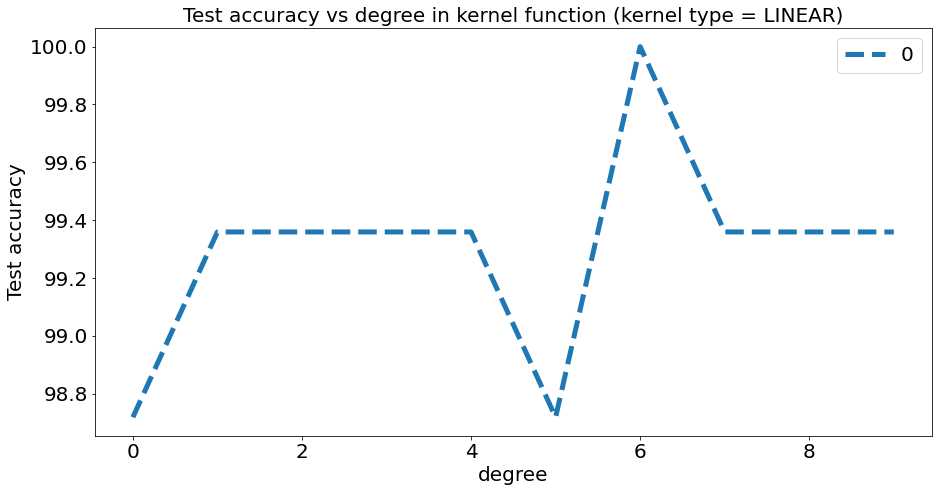

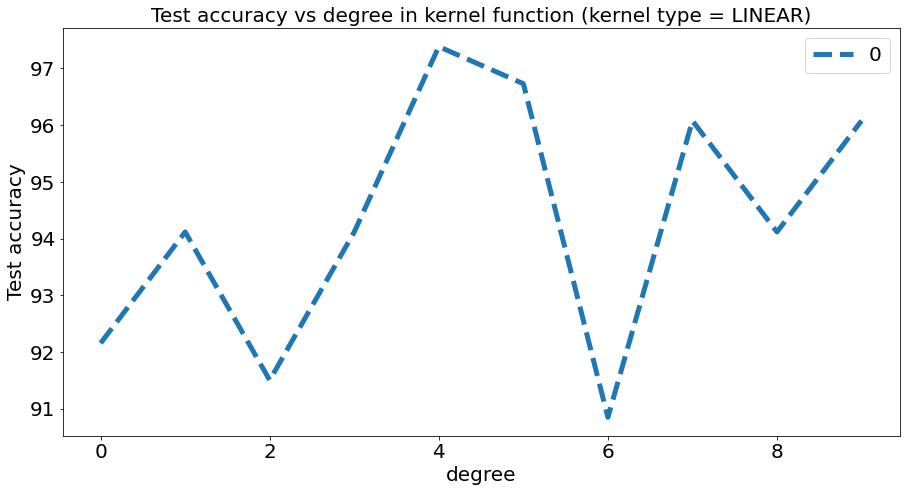

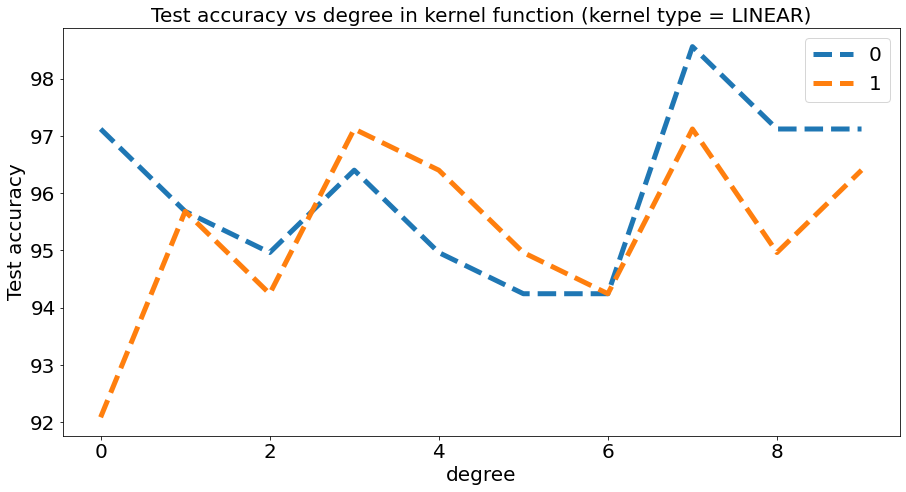

In [27]:
save_fig(plot_lin, IMAGE_DATA, 0, 1, 75, 1, 'plot1.svg')
save_fig(plot_lin, IMAGE_DATA, 2, 3, 75, 1, 'plot2.svg')
save_fig(plot_lin, IMAGE_DATA, 4, 5, 75, 2, 'plot3.svg')

Accuracy = 53.8462% (84/156) (classification)
Accuracy = 99.359% (155/156) (classification)
Accuracy = 99.359% (155/156) (classification)
Accuracy = 100% (156/156) (classification)
Accuracy = 100% (156/156) (classification)
Accuracy = 100% (156/156) (classification)
Accuracy = 99.359% (155/156) (classification)
Accuracy = 100% (156/156) (classification)
Accuracy = 100% (156/156) (classification)
Accuracy = 99.359% (155/156) (classification)
Accuracy = 47.0588% (72/153) (classification)
Accuracy = 94.7712% (145/153) (classification)
Accuracy = 97.3856% (149/153) (classification)
Accuracy = 96.732% (148/153) (classification)
Accuracy = 94.7712% (145/153) (classification)
Accuracy = 95.4248% (146/153) (classification)
Accuracy = 96.0784% (147/153) (classification)
Accuracy = 98.0392% (150/153) (classification)
Accuracy = 96.0784% (147/153) (classification)
Accuracy = 99.3464% (152/153) (classification)
Accuracy = 46.0432% (64/139) (classification)
Accuracy = 96.4029% (134/139) (classifica

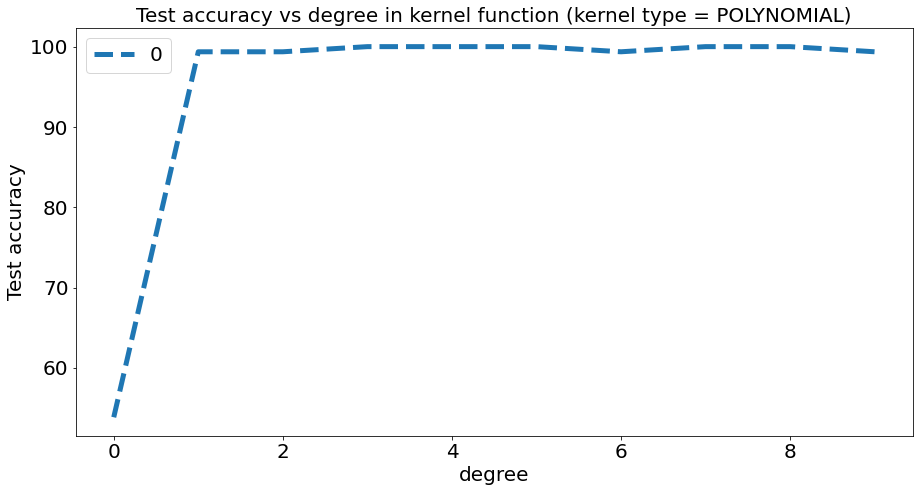

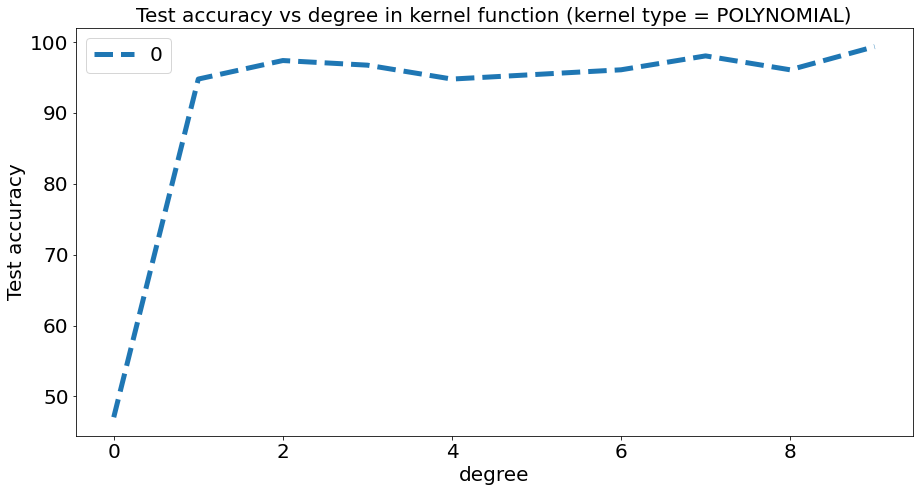

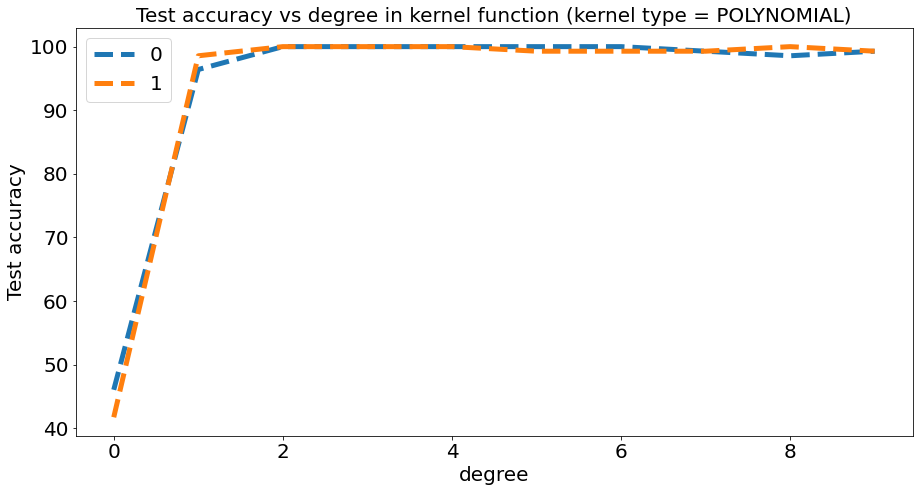

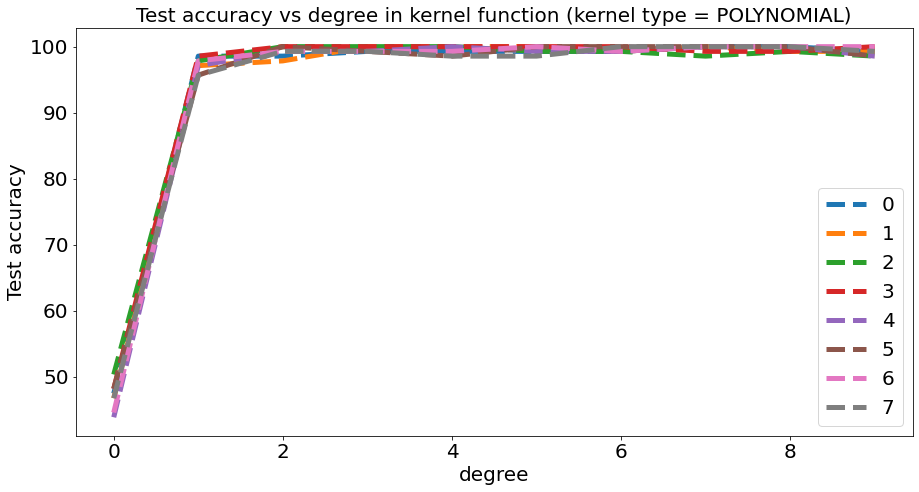

In [28]:
save_fig(plot_poly, IMAGE_DATA, 0, 1, 75, 1, 'plot4.svg')
save_fig(plot_poly, IMAGE_DATA, 2, 3, 75, 1, 'plot5.svg')
save_fig(plot_poly, IMAGE_DATA, 4, 5, 75, 2, 'plot6.svg')
save_fig(plot_poly, IMAGE_DATA, 4, 5, 75, 8, 'plot7.svg')

Accuracy = 100% (156/156) (classification)
Accuracy = 100% (156/156) (classification)
Accuracy = 100% (156/156) (classification)
Accuracy = 100% (156/156) (classification)
Accuracy = 94.2308% (147/156) (classification)
Accuracy = 96.7949% (151/156) (classification)
Accuracy = 89.1026% (139/156) (classification)
Accuracy = 91.0256% (142/156) (classification)
Accuracy = 48.7179% (76/156) (classification)
Accuracy = 48.7179% (76/156) (classification)
Accuracy = 97.3856% (149/153) (classification)
Accuracy = 98.0392% (150/153) (classification)
Accuracy = 99.3464% (152/153) (classification)
Accuracy = 95.4248% (146/153) (classification)
Accuracy = 85.6209% (131/153) (classification)
Accuracy = 63.3987% (97/153) (classification)
Accuracy = 47.7124% (73/153) (classification)
Accuracy = 50.3268% (77/153) (classification)
Accuracy = 46.4052% (71/153) (classification)
Accuracy = 52.2876% (80/153) (classification)
Accuracy = 99.3671% (157/158) (classification)
Accuracy = 99.3671% (157/158) (class

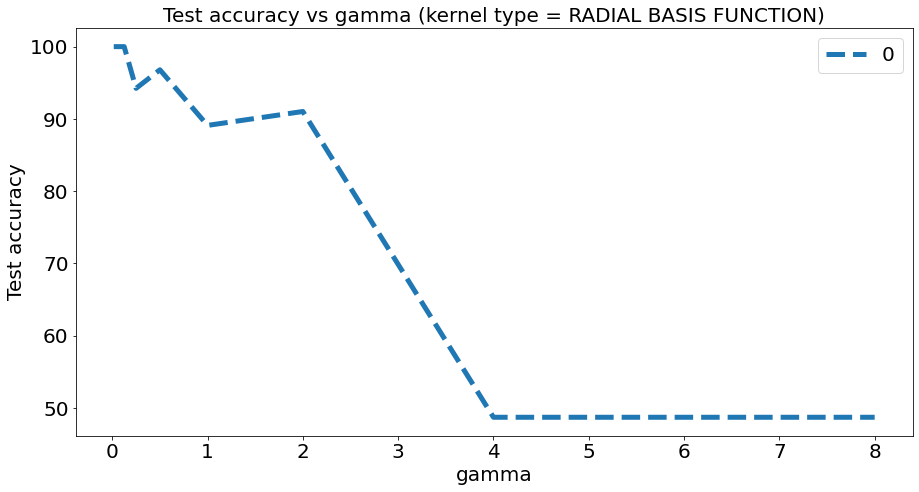

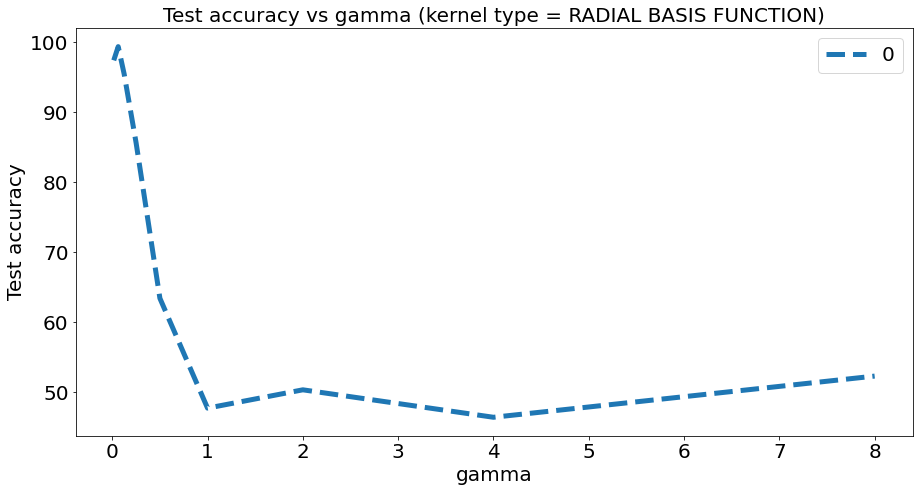

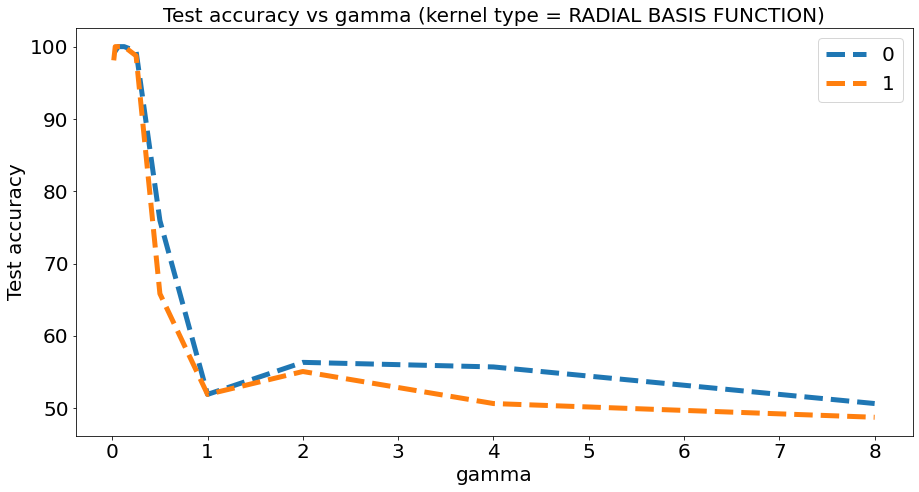

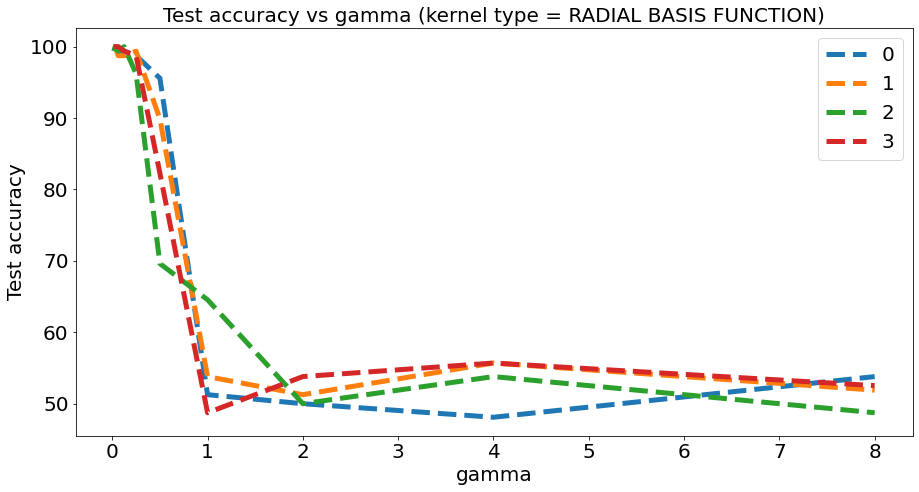

In [29]:
save_fig(plot_rbf, IMAGE_DATA, 0, 1, 75, 1, 'plot8.svg')
save_fig(plot_rbf, IMAGE_DATA, 2, 3, 75, 1, 'plot9.svg')
save_fig(plot_rbf, IMAGE_DATA, 6, 7, 75, 2, 'plot10.svg')
save_fig(plot_rbf, IMAGE_DATA, 6, 7, 75, 4, 'plot11.svg')

Accuracy = 99.359% (155/156) (classification)
Accuracy = 99.359% (155/156) (classification)
Accuracy = 100% (156/156) (classification)
Accuracy = 97.4359% (152/156) (classification)
Accuracy = 94.1176% (144/153) (classification)
Accuracy = 96.732% (148/153) (classification)
Accuracy = 98.0392% (150/153) (classification)
Accuracy = 83.0065% (127/153) (classification)
Accuracy = 99.3464% (152/153) (classification)
Accuracy = 99.3464% (152/153) (classification)
Accuracy = 100% (153/153) (classification)
Accuracy = 90.8497% (139/153) (classification)
Accuracy = 97.3856% (149/153) (classification)
Accuracy = 99.3464% (152/153) (classification)
Accuracy = 100% (153/153) (classification)
Accuracy = 90.8497% (139/153) (classification)
Accuracy = 99.3464% (152/153) (classification)
Accuracy = 100% (153/153) (classification)
Accuracy = 99.3464% (152/153) (classification)
Accuracy = 86.2745% (132/153) (classification)
Accuracy = 99.3464% (152/153) (classification)
Accuracy = 100% (153/153) (class

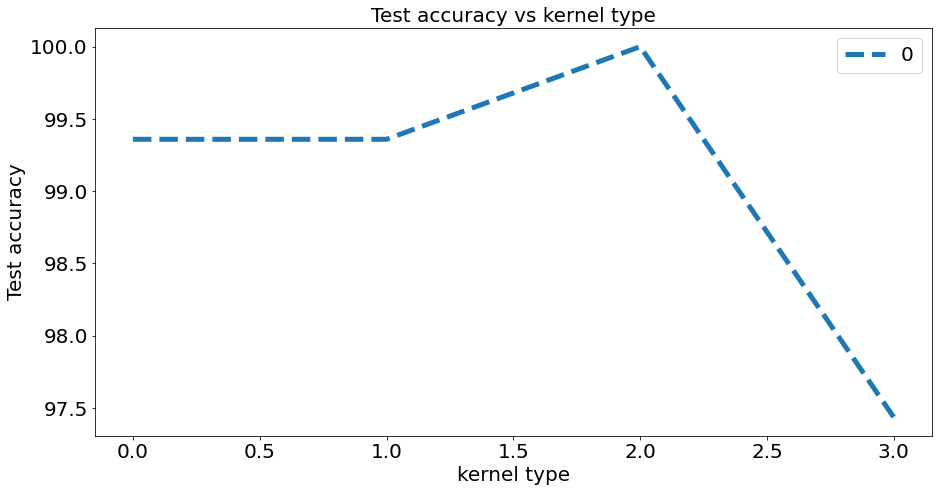

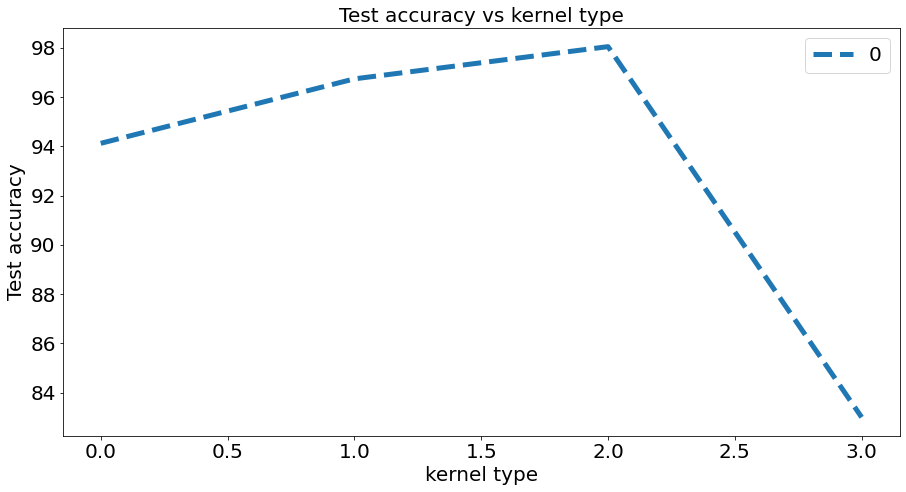

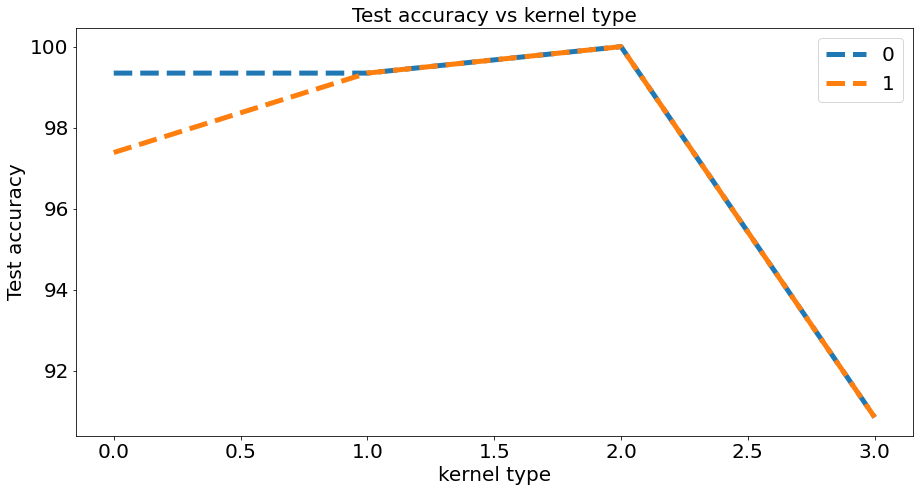

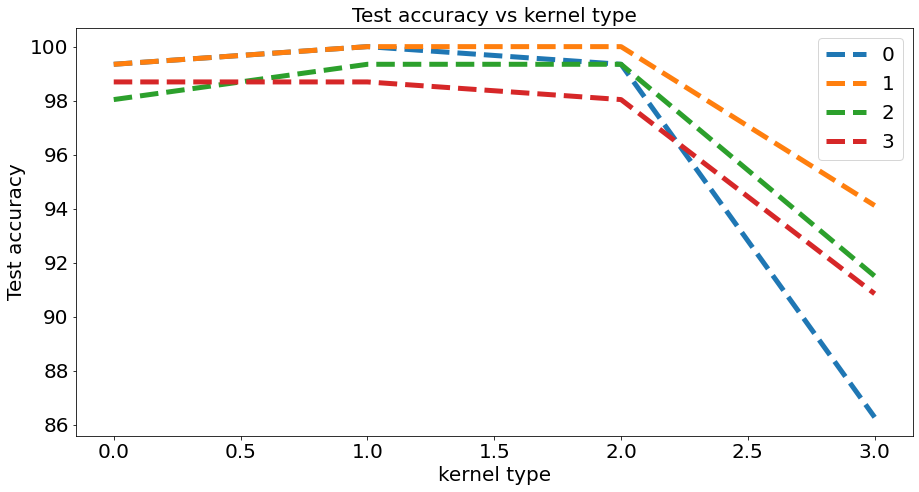

In [30]:
save_fig(plot_kernel, IMAGE_DATA, 0, 1, 75, 1, 'plot12.svg')
save_fig(plot_kernel, IMAGE_DATA, 2, 3, 75, 1, 'plot13.svg')
save_fig(plot_kernel, IMAGE_DATA, 7, 8, 75, 2, 'plot14.svg')
save_fig(plot_kernel, IMAGE_DATA, 7, 8, 75, 4, 'plot15.svg')

Accuracy = 100% (156/156) (classification)
Accuracy = 99.359% (155/156) (classification)
Accuracy = 36.5385% (57/156) (classification)
Mean squared error = 0.00896266 (regression)
Squared correlation coefficient = 0.972603 (regression)
Mean squared error = 0.00680229 (regression)
Squared correlation coefficient = 0.973282 (regression)
Accuracy = 98.6928% (151/153) (classification)
Accuracy = 96.732% (148/153) (classification)
Accuracy = 0% (0/153) (classification)
Mean squared error = 0.0239592 (regression)
Squared correlation coefficient = 0.909842 (regression)
Mean squared error = 0.0242151 (regression)
Squared correlation coefficient = 0.902767 (regression)
Accuracy = 98.6755% (149/151) (classification)
Accuracy = 98.0132% (148/151) (classification)
Accuracy = 0% (0/151) (classification)
Mean squared error = 1.35889 (regression)
Squared correlation coefficient = 0.932983 (regression)
Mean squared error = 1.17259 (regression)
Squared correlation coefficient = 0.942047 (regression)
Ac

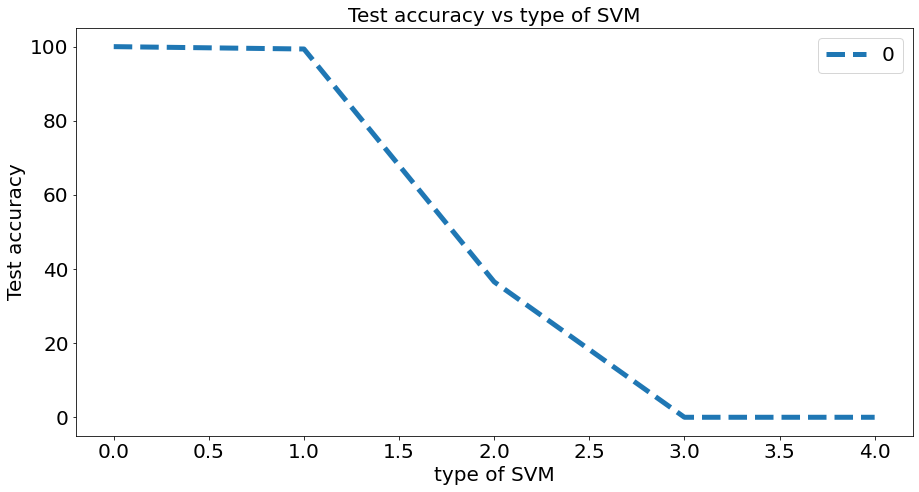

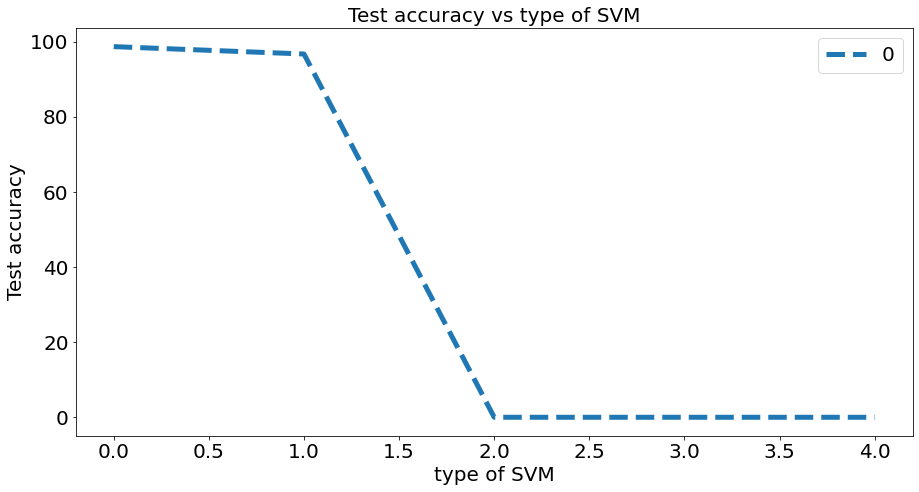

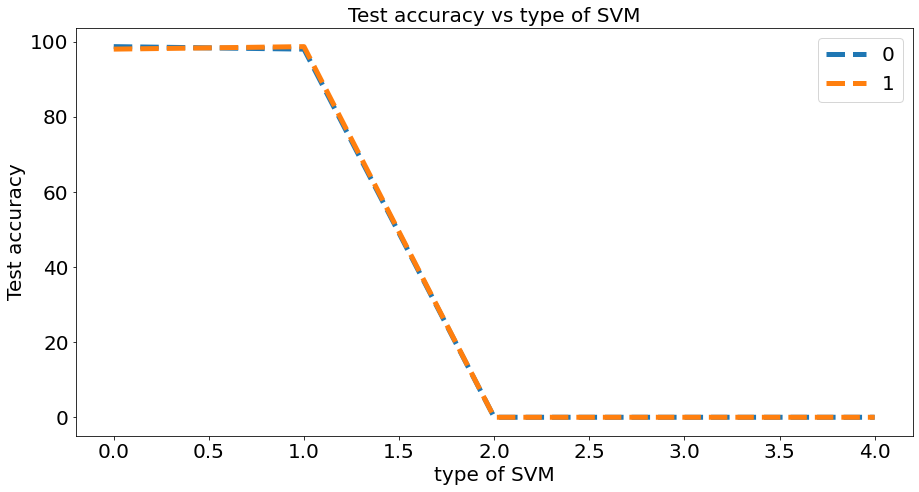

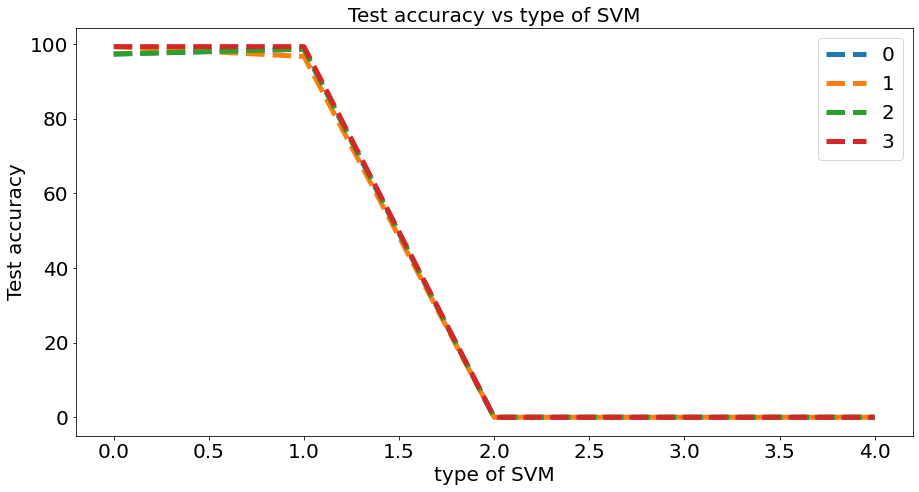

In [31]:
save_fig(plot_svm, IMAGE_DATA, 0, 1, 75, 1, 'plot16.svg')
save_fig(plot_svm, IMAGE_DATA, 2, 3, 75, 1, 'plot17.svg')
save_fig(plot_svm, IMAGE_DATA, 0, 9, 75, 2, 'plot18.svg')
save_fig(plot_svm, IMAGE_DATA, 0, 9, 75, 4, 'plot19.svg')

Accuracy = 99.359% (155/156) (classification)
Accuracy = 98.7179% (154/156) (classification)
Accuracy = 100% (156/156) (classification)
Accuracy = 98.7179% (154/156) (classification)
Accuracy = 99.359% (155/156) (classification)
Accuracy = 100% (156/156) (classification)
Accuracy = 100% (145/145) (classification)
Accuracy = 99.3103% (144/145) (classification)
Accuracy = 100% (145/145) (classification)
Accuracy = 98.6207% (143/145) (classification)
Accuracy = 97.3856% (149/153) (classification)
Accuracy = 96.732% (148/153) (classification)
Accuracy = 95.4248% (146/153) (classification)
Accuracy = 99.3464% (152/153) (classification)
Accuracy = 98.0392% (150/153) (classification)
Accuracy = 99.3464% (152/153) (classification)
Accuracy = 99.3103% (144/145) (classification)
Accuracy = 100% (145/145) (classification)
Accuracy = 100% (145/145) (classification)
Accuracy = 100% (145/145) (classification)
Accuracy = 98.6755% (149/151) (classification)
Accuracy = 98.6755% (149/151) (classificatio

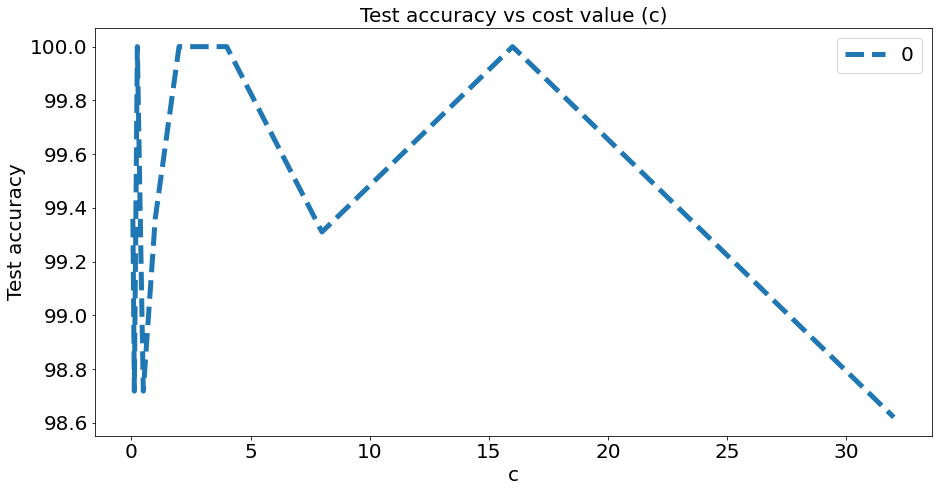

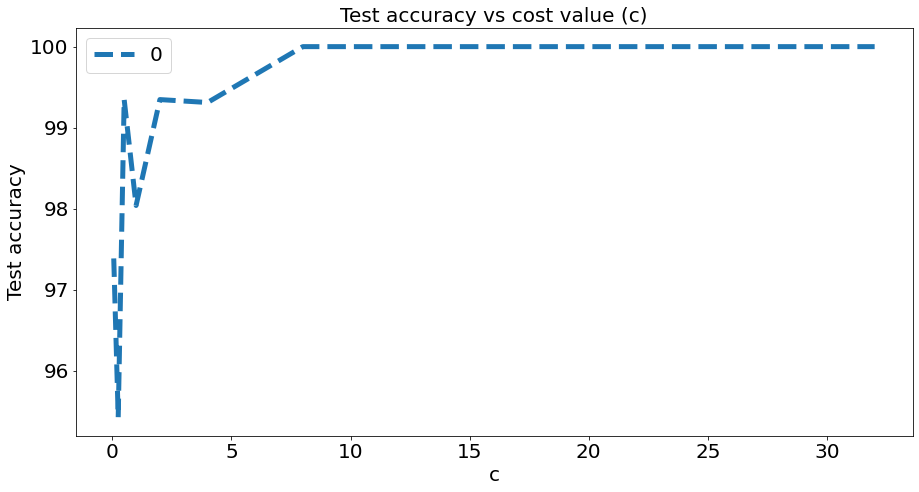

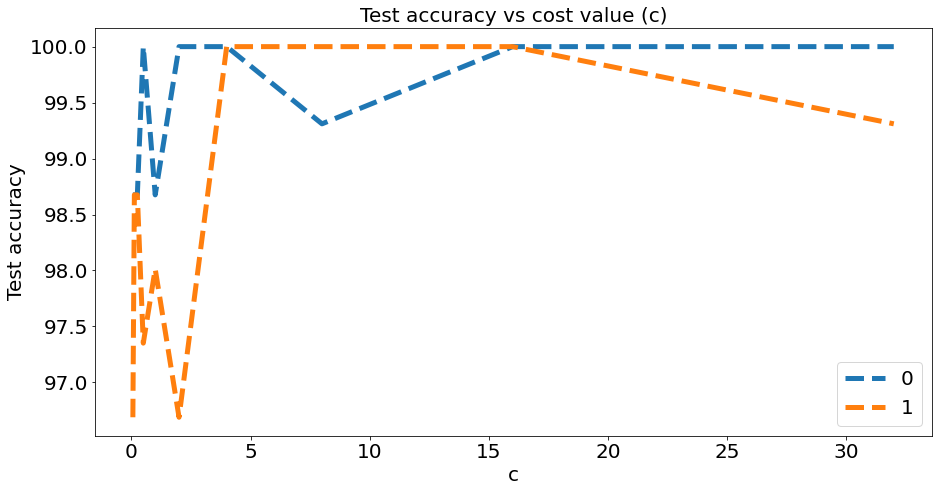

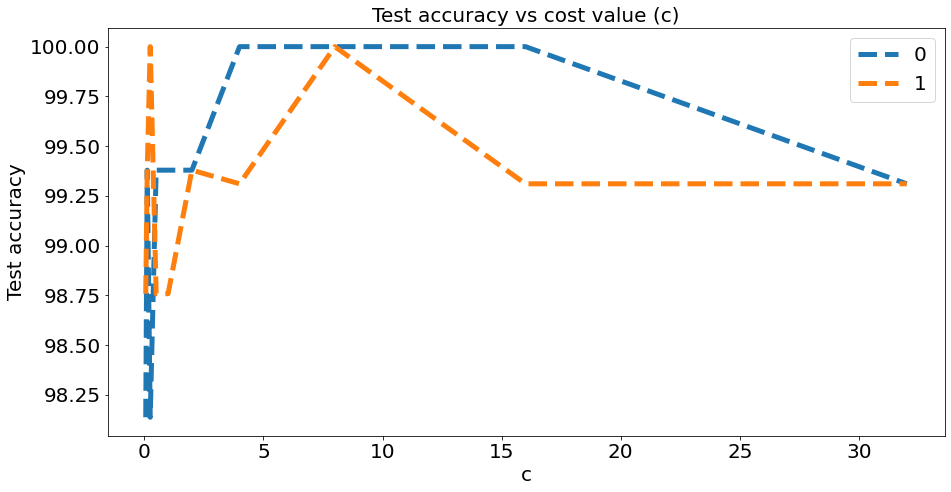

In [32]:
save_fig(plot_best_c, IMAGE_DATA, 0, 1, 75, 1, 'plot20.svg')
save_fig(plot_best_c, IMAGE_DATA, 2, 3, 75, 1, 'plot21.svg')
save_fig(plot_best_c, IMAGE_DATA, 1, 8, 75, 2, 'plot22.svg')
save_fig(plot_best_c, IMAGE_DATA, 2, 7, 75, 2, 'plot23.svg')

###**Conclusions for hyperparameter** (for best accuracy)

Kernel Type  = Radial Basis Function<br>
Degree in kernel function  = 3 (for POLYNOMIAL type)<br>
Cost value = 4<br>
Gamma Value = 0.032 (for RBF)<br>
SVM type = 0 (C-SVC)

In [33]:
test_results(IMAGE_DATA, '-s 0 -c 4 -t 2 -r 1 -d 3 -g 0.032', 0, 1, 75)

Accuracy = 99.359% (155/156) (classification)


99.35897435897436

### **Consideration of 10 features**

In [34]:
img_data1 = IMAGE_DATA.drop(['F11', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20', 'F21', 'F22', 'F23', 'F24', 'F25'], axis = 1)
img_data1

F1        F2        F3  ...        F9       F10  class_label
0     0.159628  3.569244  0.946156  ... -0.048626 -1.542681          7.0
1    -3.757384 -2.659323  0.574455  ...  1.881514 -0.159983          1.0
2     1.299146 -2.735298 -0.370838  ... -1.884790 -1.102868          3.0
3     2.133980 -1.039969  2.982761  ...  1.304166  2.986695          2.0
4    -0.003326  0.901577  1.910635  ...  1.154616  0.804863          5.0
...        ...       ...       ...  ...       ...       ...          ...
2995  2.379232 -4.261587  1.556199  ... -0.635389  1.806960          2.0
2996  1.821868 -1.216249  0.214245  ...  1.307043 -1.555220          6.0
2997  1.565306  1.507884 -0.180076  ...  2.346996 -1.478877          0.0
2998  0.342392 -1.140653 -0.959847  ... -2.099839  1.018491          5.0
2999 -1.108781 -1.079360  1.237192  ...  0.207503  0.564823          3.0

[3000 rows x 11 columns]

Accuracy = 99.359% (155/156) (classification)
Accuracy = 99.359% (155/156) (classification)
Accuracy = 99.359% (155/156) (classification)
Accuracy = 98.7179% (154/156) (classification)
Accuracy = 99.359% (155/156) (classification)
Accuracy = 98.7179% (154/156) (classification)
Accuracy = 99.359% (155/156) (classification)
Accuracy = 98.7179% (154/156) (classification)
Accuracy = 100% (156/156) (classification)
Accuracy = 100% (156/156) (classification)
Accuracy = 56.4103% (88/156) (classification)
Accuracy = 100% (156/156) (classification)
Accuracy = 99.359% (155/156) (classification)
Accuracy = 100% (156/156) (classification)
Accuracy = 100% (156/156) (classification)
Accuracy = 100% (156/156) (classification)
Accuracy = 100% (156/156) (classification)
Accuracy = 100% (156/156) (classification)
Accuracy = 99.359% (155/156) (classification)
Accuracy = 98.7179% (154/156) (classification)
Accuracy = 99.359% (155/156) (classification)
Accuracy = 100% (156/156) (classification)
Accuracy = 

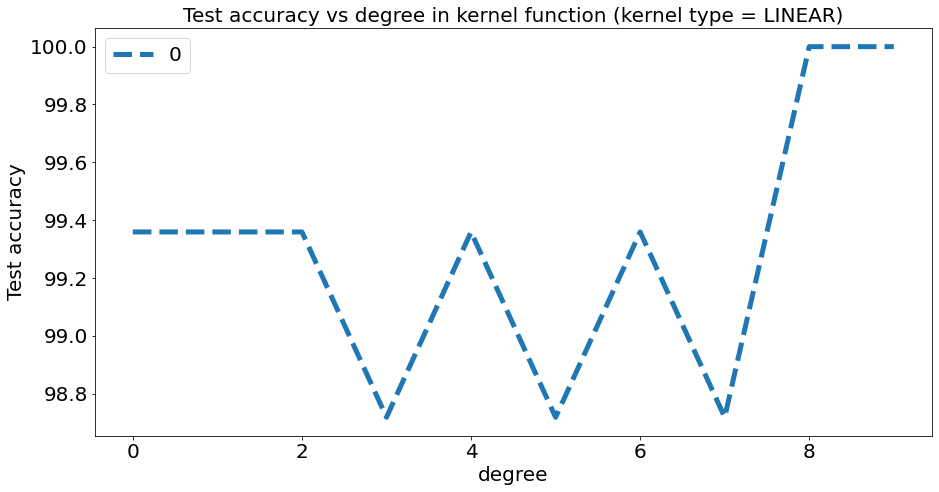

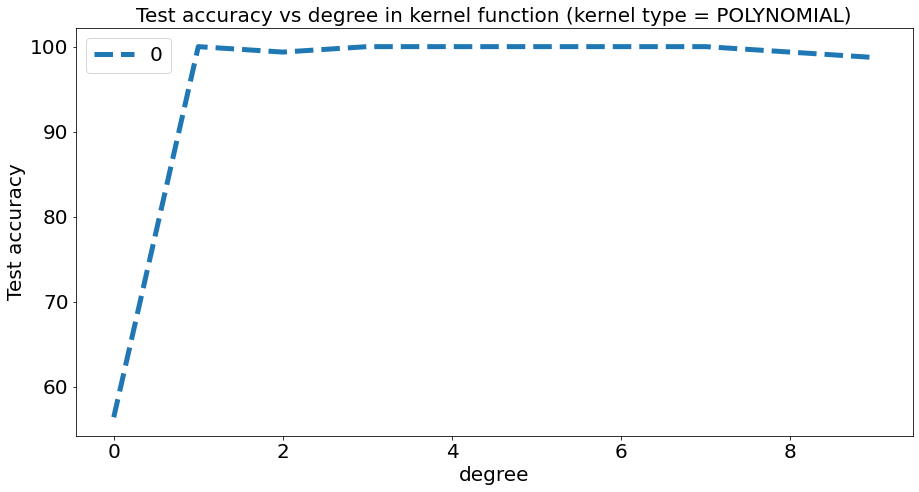

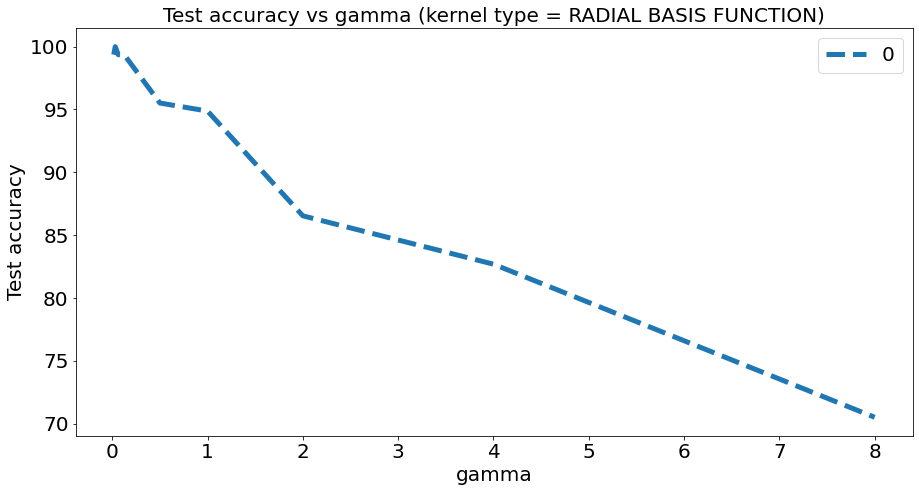

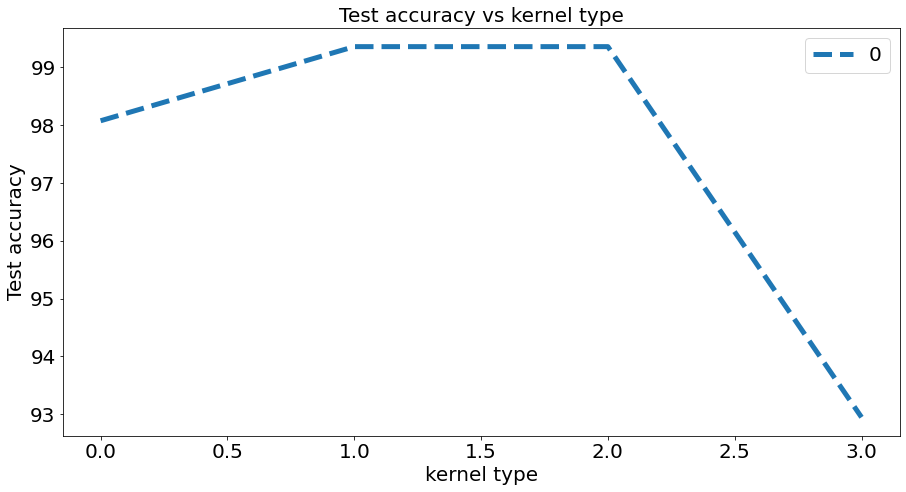

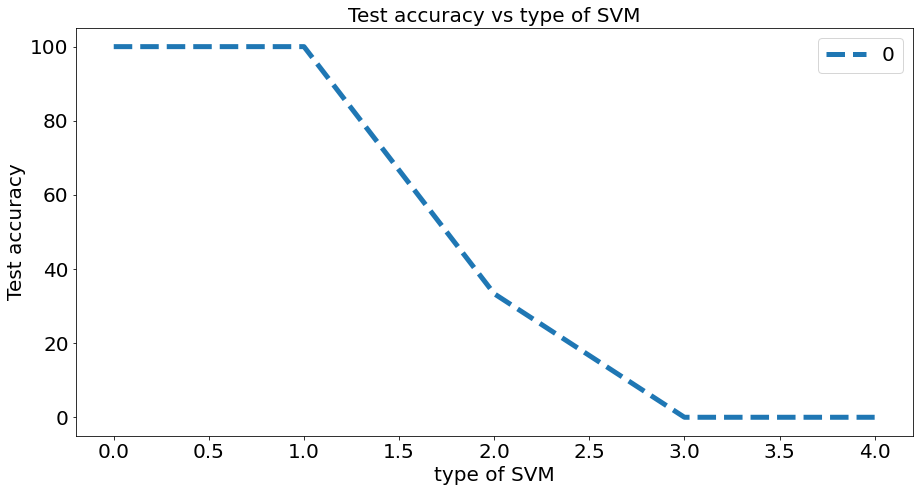

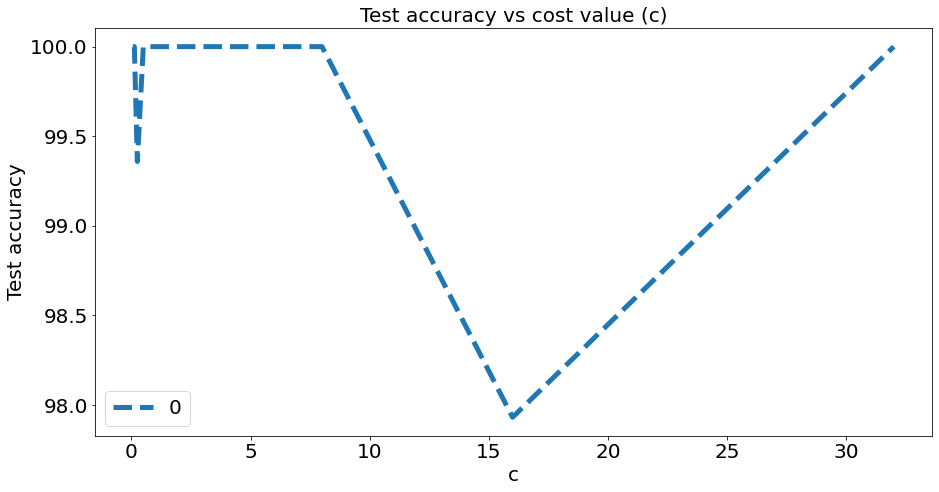

In [35]:
save_fig(plot_lin, img_data1, 0, 1, 75, 1, 'plot24.svg')
save_fig(plot_poly, img_data1, 0, 1, 75, 1, 'plot25.svg')
save_fig(plot_rbf, img_data1, 0, 1, 75, 1, 'plot26.svg')
save_fig(plot_kernel, img_data1, 0, 1, 75, 1, 'plot27.svg')
save_fig(plot_svm, img_data1, 0, 1, 75, 1, 'plot28.svg')
save_fig(plot_best_c, img_data1, 0, 1, 75, 1, 'plot29.svg')

Accuracy = 93.4641% (143/153) (classification)
Accuracy = 97.3856% (149/153) (classification)
Accuracy = 90.1961% (138/153) (classification)
Accuracy = 94.7712% (145/153) (classification)
Accuracy = 98.0392% (150/153) (classification)
Accuracy = 96.0784% (147/153) (classification)
Accuracy = 95.4248% (146/153) (classification)
Accuracy = 96.0784% (147/153) (classification)
Accuracy = 90.1961% (138/153) (classification)
Accuracy = 94.7712% (145/153) (classification)
Accuracy = 47.0588% (72/153) (classification)
Accuracy = 94.1176% (144/153) (classification)
Accuracy = 95.4248% (146/153) (classification)
Accuracy = 94.1176% (144/153) (classification)
Accuracy = 92.8105% (142/153) (classification)
Accuracy = 95.4248% (146/153) (classification)
Accuracy = 94.7712% (145/153) (classification)
Accuracy = 94.7712% (145/153) (classification)
Accuracy = 94.1176% (144/153) (classification)
Accuracy = 89.5425% (137/153) (classification)
Accuracy = 96.732% (148/153) (classification)
Accuracy = 96.0

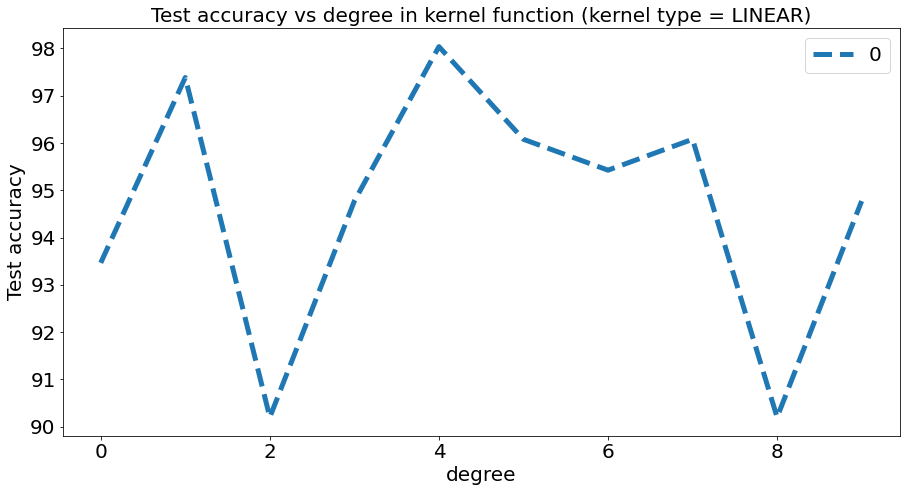

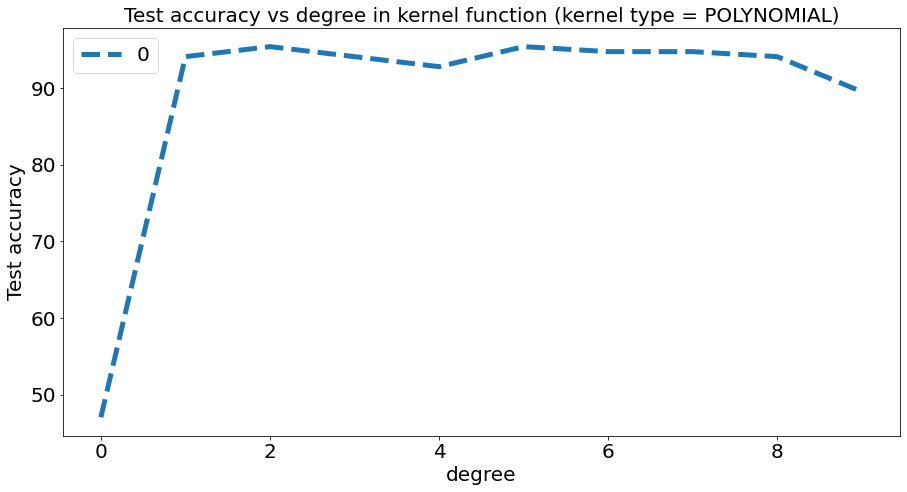

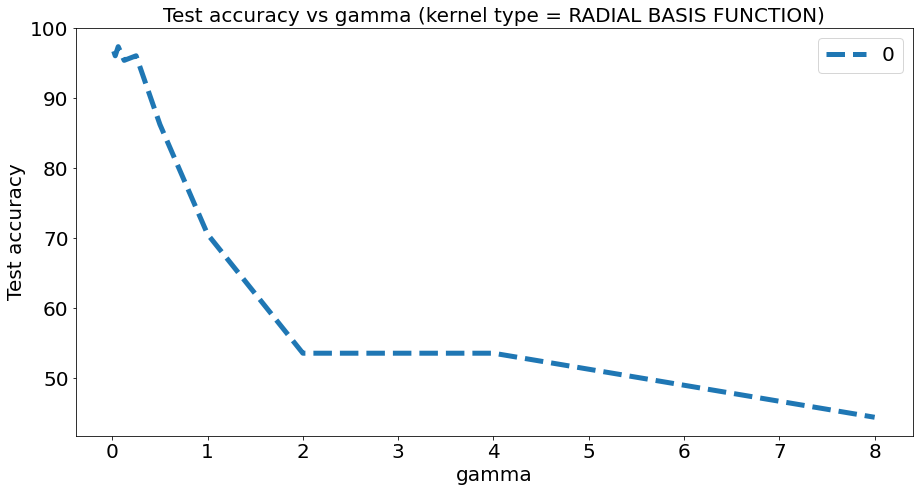

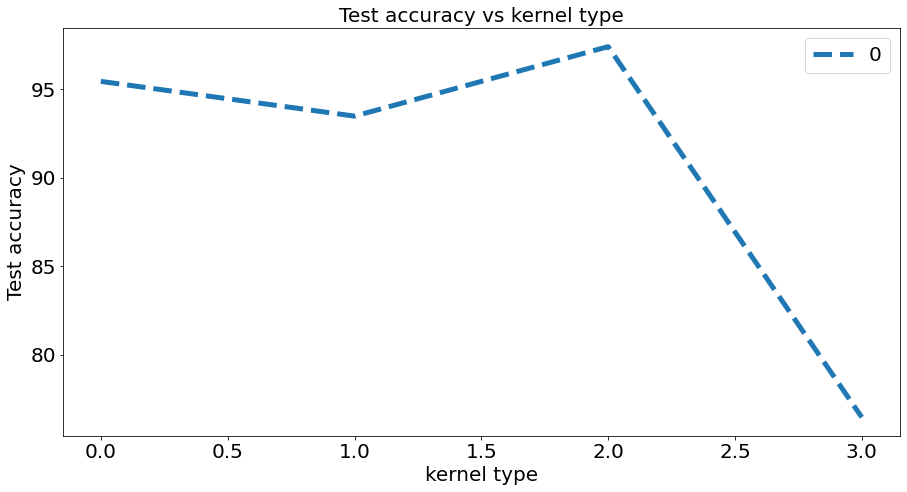

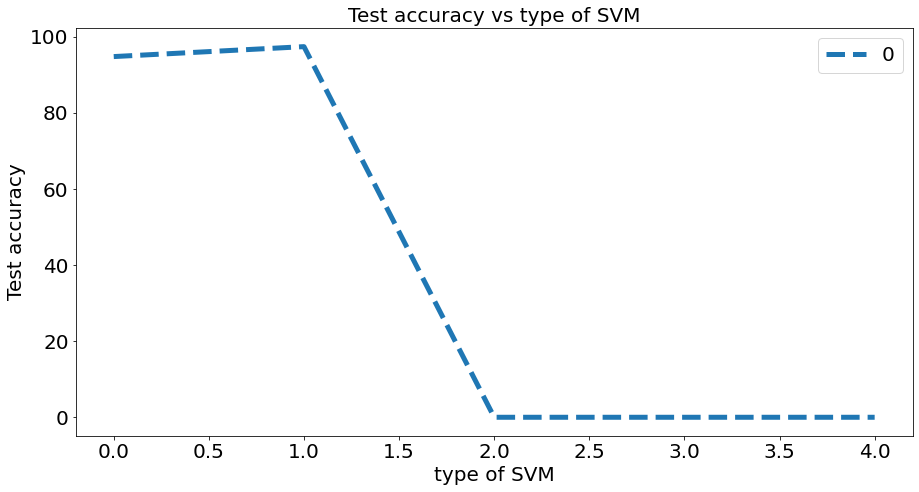

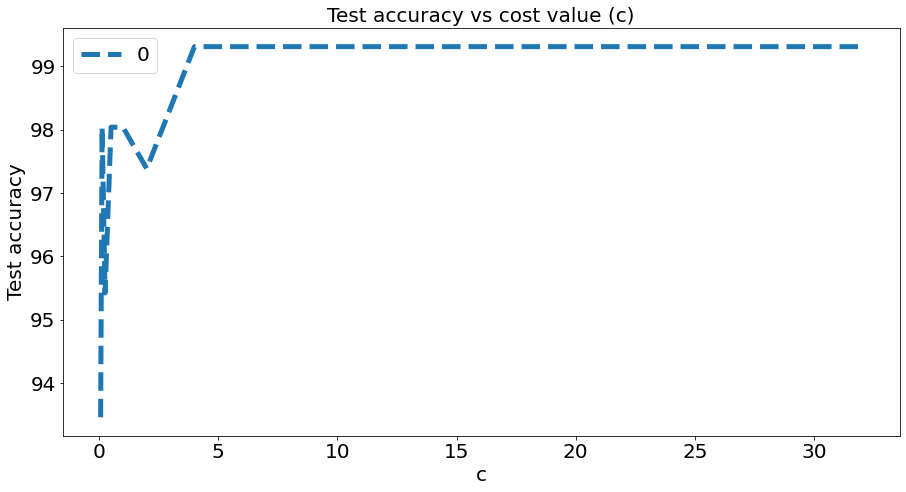

In [36]:
save_fig(plot_lin, img_data1, 2, 3, 75, 1, 'plot30.svg')
save_fig(plot_poly, img_data1, 2, 3, 75, 1, 'plot31.svg')
save_fig(plot_rbf, img_data1, 2, 3, 75, 1, 'plot32.svg')
save_fig(plot_kernel, img_data1, 2, 3, 75, 1, 'plot33.svg')
save_fig(plot_svm, img_data1, 2, 3, 75, 1, 'plot34.svg')
save_fig(plot_best_c, img_data1, 2, 3, 75, 1, 'plot35.svg')

In [37]:
img_data2 = IMAGE_DATA.drop(['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F21', 'F22', 'F23', 'F24', 'F25'], axis = 1)
img_data2

F11       F12       F13  ...       F19       F20  class_label
0     0.638329  0.433765  2.228255  ...  0.303223  0.137926          7.0
1    -0.956245 -0.809724 -0.423412  ... -0.424678 -0.014438          1.0
2    -0.277414  1.599624  0.875395  ...  1.368997 -0.745012          3.0
3     0.136494  0.575337 -2.338978  ... -0.008174 -0.559950          2.0
4    -0.630059  1.240954 -0.202304  ...  0.734458 -0.842683          5.0
...        ...       ...       ...  ...       ...       ...          ...
2995 -0.856515  1.192357  1.025365  ...  0.848278  0.052298          2.0
2996 -0.501167 -0.940197 -1.173121  ... -0.544630  0.312495          6.0
2997 -1.572103 -1.453141  1.817373  ...  1.079164  0.529654          0.0
2998 -0.354647 -0.100109 -0.200731  ... -0.868468  0.965434          5.0
2999  0.572016  0.504234  0.252221  ... -0.040038 -0.594674          3.0

[3000 rows x 11 columns]

Accuracy = 85.2564% (133/156) (classification)
Accuracy = 89.1026% (139/156) (classification)
Accuracy = 84.6154% (132/156) (classification)
Accuracy = 86.5385% (135/156) (classification)
Accuracy = 85.8974% (134/156) (classification)
Accuracy = 89.1026% (139/156) (classification)
Accuracy = 87.1795% (136/156) (classification)
Accuracy = 86.5385% (135/156) (classification)
Accuracy = 87.8205% (137/156) (classification)
Accuracy = 85.8974% (134/156) (classification)
Accuracy = 53.8462% (84/156) (classification)
Accuracy = 89.1026% (139/156) (classification)
Accuracy = 97.4359% (152/156) (classification)
Accuracy = 97.4359% (152/156) (classification)
Accuracy = 97.4359% (152/156) (classification)
Accuracy = 91.0256% (142/156) (classification)
Accuracy = 92.3077% (144/156) (classification)
Accuracy = 97.4359% (152/156) (classification)
Accuracy = 97.4359% (152/156) (classification)
Accuracy = 94.8718% (148/156) (classification)
Accuracy = 94.8718% (148/156) (classification)
Accuracy = 97.

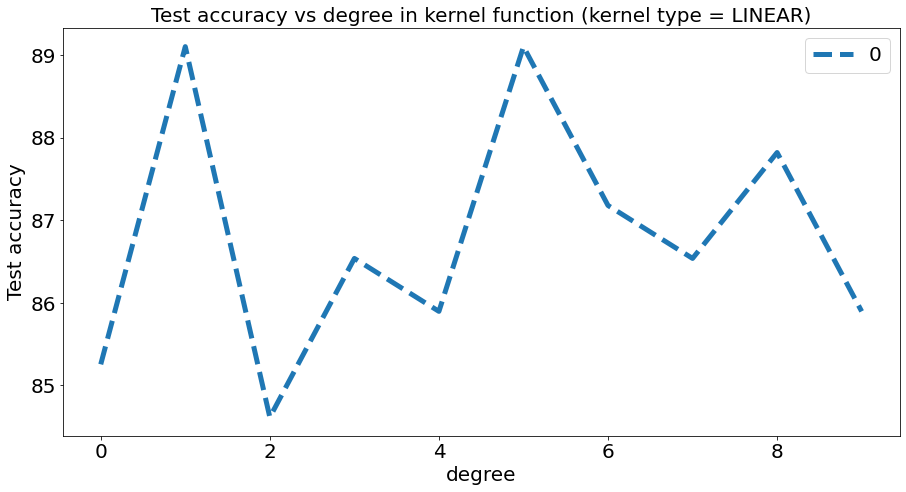

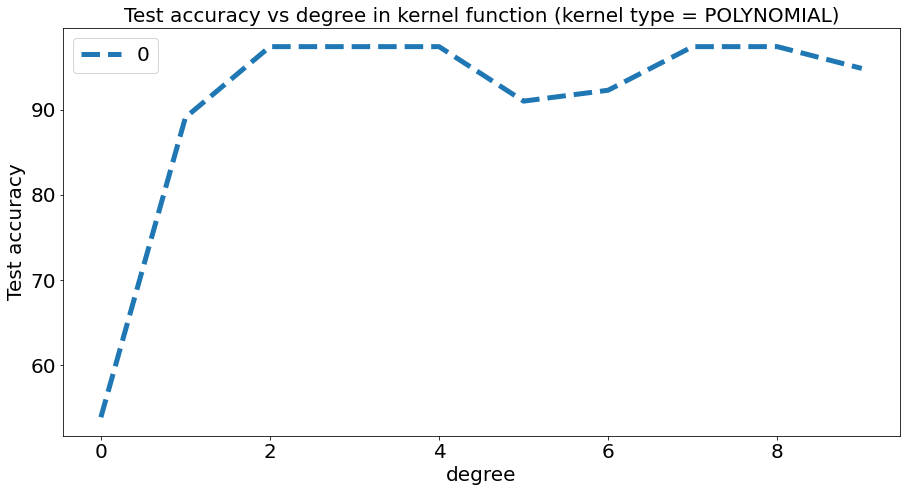

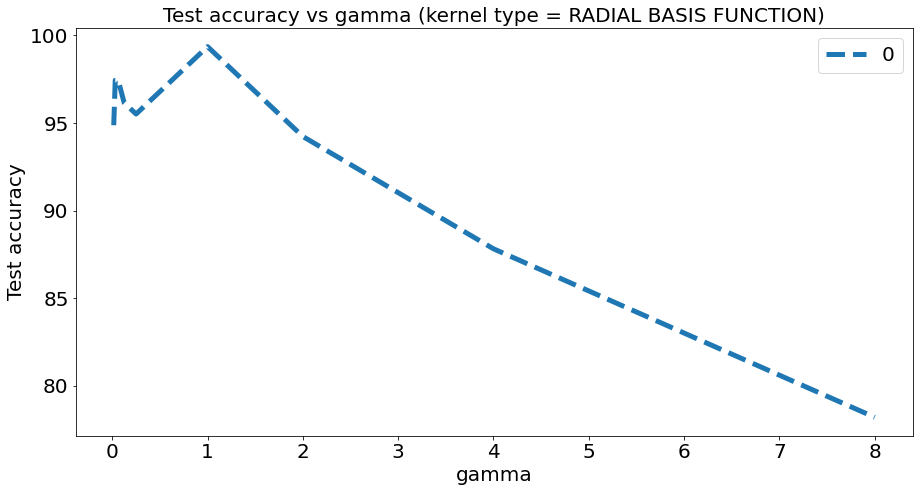

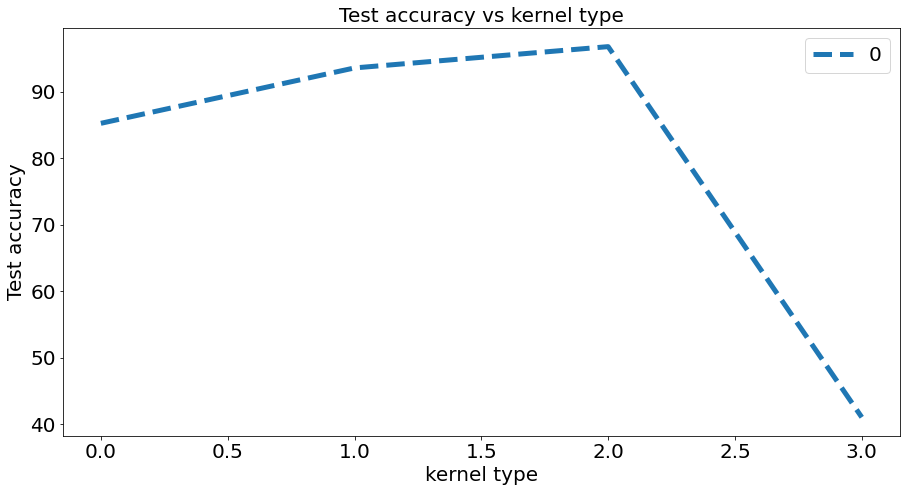

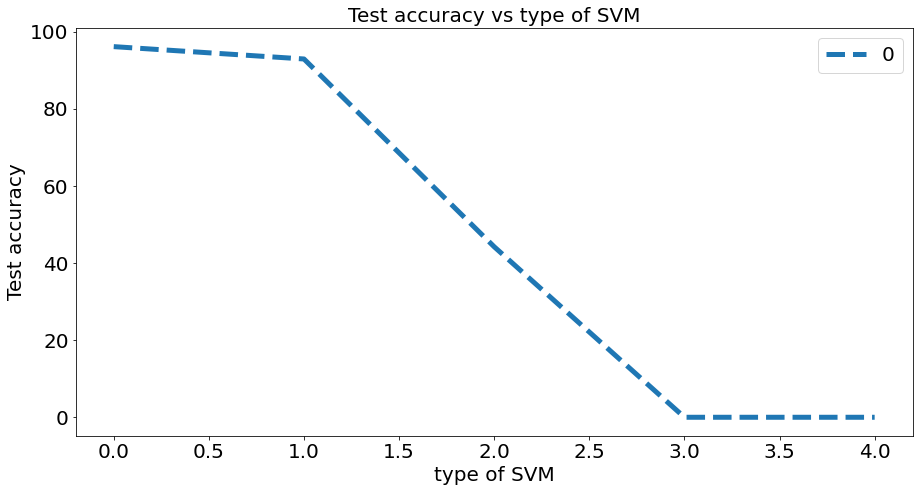

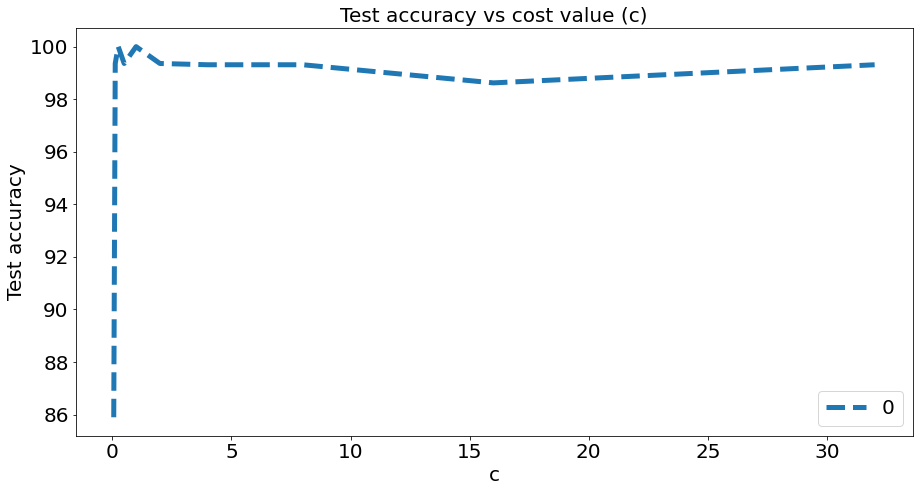

In [38]:
save_fig(plot_lin, img_data2, 0, 1, 75, 1, 'plot36.svg')
save_fig(plot_poly, img_data2, 0, 1, 75, 1, 'plot37.svg')
save_fig(plot_rbf, img_data2, 0, 1, 75, 1, 'plot38.svg')
save_fig(plot_kernel, img_data2, 0, 1, 75, 1, 'plot39.svg')
save_fig(plot_svm, img_data2, 0, 1, 75, 1, 'plot40.svg')
save_fig(plot_best_c, img_data2, 0, 1, 75, 1, 'plot41.svg')

Accuracy = 67.9739% (104/153) (classification)
Accuracy = 71.2418% (109/153) (classification)
Accuracy = 63.3987% (97/153) (classification)
Accuracy = 65.3595% (100/153) (classification)
Accuracy = 66.0131% (101/153) (classification)
Accuracy = 71.8954% (110/153) (classification)
Accuracy = 62.0915% (95/153) (classification)
Accuracy = 67.9739% (104/153) (classification)
Accuracy = 64.0523% (98/153) (classification)
Accuracy = 65.3595% (100/153) (classification)
Accuracy = 47.7124% (73/153) (classification)
Accuracy = 67.9739% (104/153) (classification)
Accuracy = 75.1634% (115/153) (classification)
Accuracy = 77.7778% (119/153) (classification)
Accuracy = 79.7386% (122/153) (classification)
Accuracy = 77.7778% (119/153) (classification)
Accuracy = 72.549% (111/153) (classification)
Accuracy = 75.1634% (115/153) (classification)
Accuracy = 75.1634% (115/153) (classification)
Accuracy = 72.549% (111/153) (classification)
Accuracy = 81.0458% (124/153) (classification)
Accuracy = 78.4314%

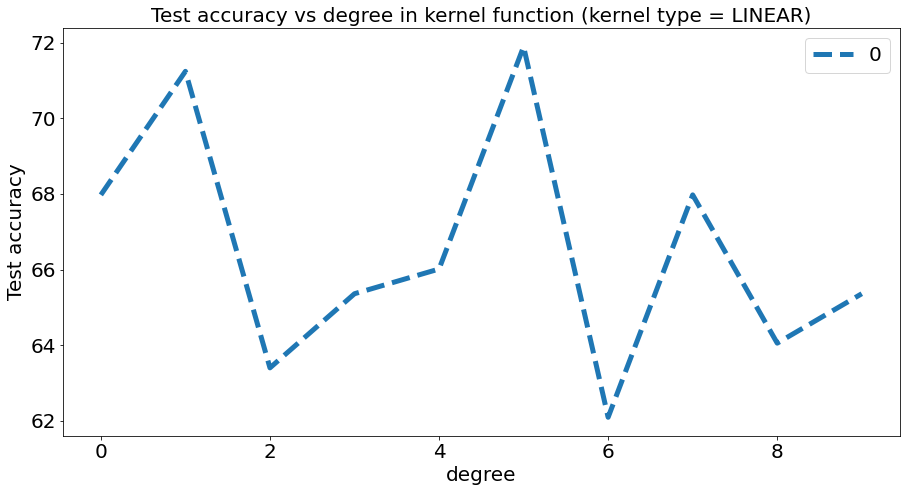

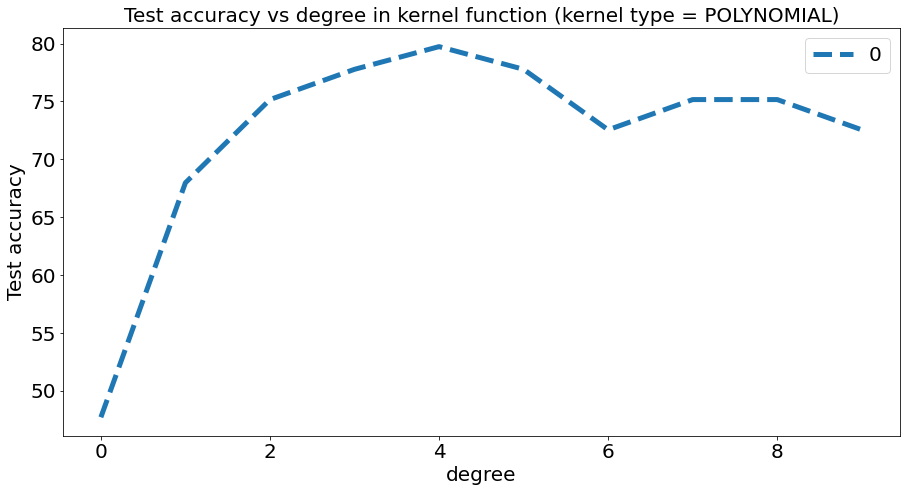

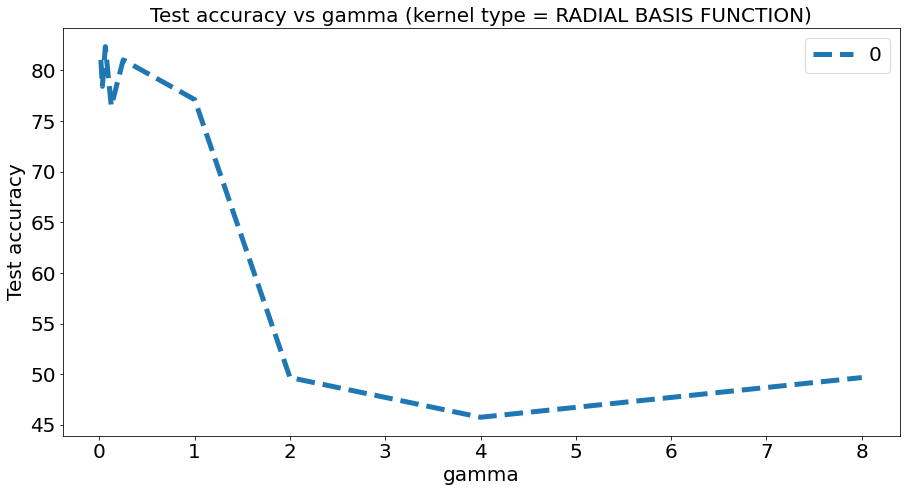

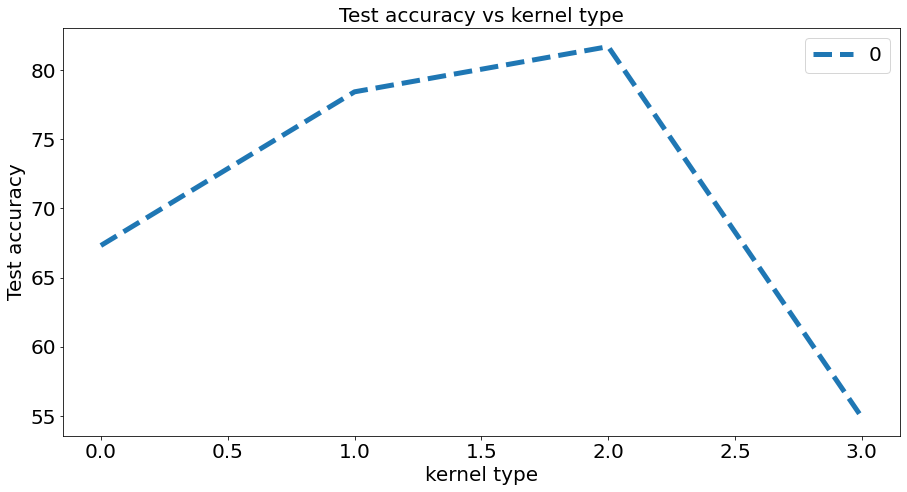

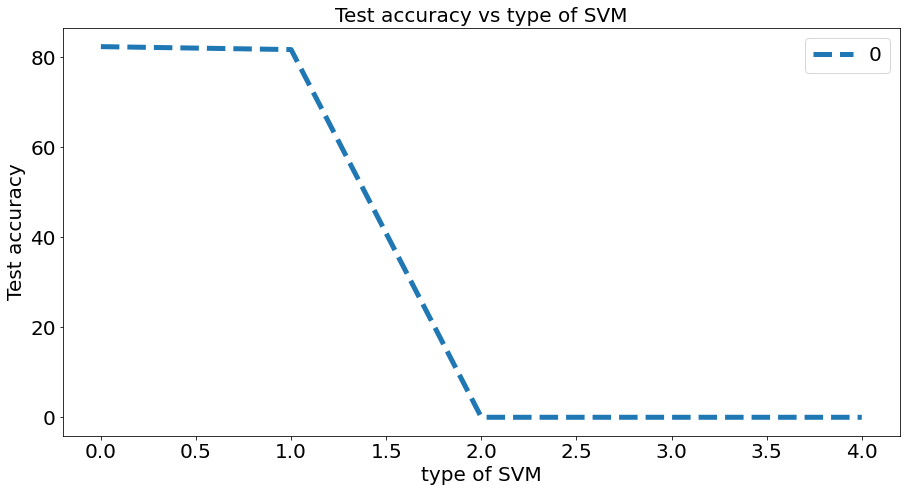

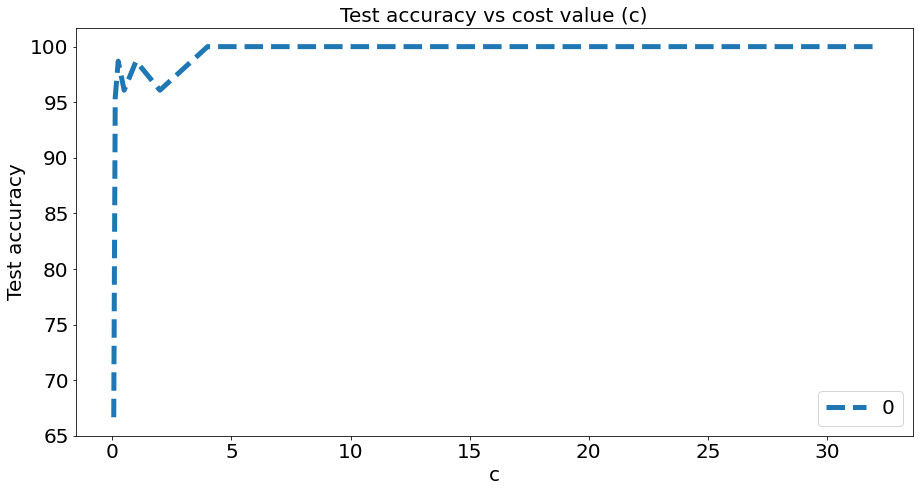

In [39]:
save_fig(plot_lin, img_data2, 2, 3, 75, 1, 'plot42.svg')
save_fig(plot_poly, img_data2, 2, 3, 75, 1, 'plot43.svg')
save_fig(plot_rbf, img_data2, 2, 3, 75, 1, 'plot44.svg')
save_fig(plot_kernel, img_data2, 2, 3, 75, 1, 'plot45.svg')
save_fig(plot_svm, img_data2, 2, 3, 75, 1, 'plot46.svg')
save_fig(plot_best_c, img_data2, 2, 3, 75, 1, 'plot47.svg')

###**Sci-kit learn Binary Classification**

In [40]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [41]:
def test_sklearn(kt = 'rbf', c_value = 4, gamma_value = 0.032, deg_value = 3, data = IMAGE_DATA, label1 = 0, label2 = 1, percent_train = 75):
  t1, t2, t3, t4 = partition(data, percent_train)
  classifier = SVC(kernel = kt, C = c_value, gamma = gamma_value, degree = deg_value, decision_function_shape = 'ovr', )
  classifier.fit(t1, t3)
  Y_pred = classifier.predict(t2)
  #print(classification_report(t4, Y_pred))
  return accuracy_score(t4, Y_pred)

In [42]:
test_sklearn('linear', 4, 0.032, 3, IMAGE_DATA, 0, 1, 75)

0.8893333333333333

### **Hyperparameter tuning for Sci-kit learn**

In [43]:
def plot_polynomial(data, label1, label2, percent, N):
  fig, ax = plt.subplots()
  fig.set_size_inches(15, 7.5)
  plt.title("Test accuracy vs degree in kernel function (kernel type = POLYNOMIAL)", fontsize=20)
  plt.xlabel("degree")
  plt.ylabel("Test accuracy")
  ax. xaxis. label. set_size(20)
  ax. yaxis. label. set_size(20)
  plt.xticks(fontsize=20)
  plt.yticks(fontsize=20)
  for i in range(0, N):
    ACC0 = test_sklearn('poly', 4, 0.032, 0, data, label1, label2, percent)
    ACC1 = test_sklearn('poly', 4, 0.032, 1, data, label1, label2, percent)
    ACC2 = test_sklearn('poly', 4, 0.032, 2, data, label1, label2, percent)
    ACC3 = test_sklearn('poly', 4, 0.032, 3, data, label1, label2, percent)
    ACC4 = test_sklearn('poly', 4, 0.032, 4, data, label1, label2, percent)
    ACC5 = test_sklearn('poly', 4, 0.032, 5, data, label1, label2, percent)
    ACC6 = test_sklearn('poly', 4, 0.032, 6, data, label1, label2, percent)
    ACC7 = test_sklearn('poly', 4, 0.032, 7, data, label1, label2, percent)
    ACC8 = test_sklearn('poly', 4, 0.032, 8, data, label1, label2, percent)
    ACC9 = test_sklearn('poly', 4, 0.032, 9, data, label1, label2, percent)
    xpoints = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    ypoints = [ACC0, ACC1, ACC2, ACC3, ACC4, ACC5, ACC6, ACC7, ACC8, ACC9]
    
    plt.plot(xpoints, ypoints, linestyle='--', linewidth=5, label=i)

  plt.legend(fontsize=20)
  return plt

In [44]:
def plot_rbfs(data, label1, label2, percent, N):
  fig, ax = plt.subplots()
  fig.set_size_inches(15, 7.5)
  plt.title("Test accuracy vs gamma", fontsize=20)
  plt.xlabel("gamma")
  plt.ylabel("Test accuracy")
  ax. xaxis. label. set_size(20)
  ax. yaxis. label. set_size(20)
  plt.xticks(fontsize=20)
  plt.yticks(fontsize=20)
  for i in range(0, N):
    ACC0 = test_sklearn('rbf', 4, 0.016, 3, data, label1, label2, percent)
    ACC1 = test_sklearn('rbf', 4, 0.03125, 3, data, label1, label2, percent)
    ACC2 = test_sklearn('rbf', 4, 0.0625, 3, data, label1, label2, percent)
    ACC3 = test_sklearn('rbf', 4, 0.125, 3, data, label1, label2, percent)
    ACC4 = test_sklearn('rbf', 4, 0.25, 3, data, label1, label2, percent)
    ACC5 = test_sklearn('rbf', 4, 0.5, 3, data, label1, label2, percent)
    ACC6 = test_sklearn('rbf', 4, 1, 3, data, label1, label2, percent)
    ACC7 = test_sklearn('rbf', 4, 2, 3, data, label1, label2, percent)
    ACC8 = test_sklearn('rbf', 4, 4, 3, data, label1, label2, percent)
    ACC9 = test_sklearn('rbf', 4, 8, 3, data, label1, label2, percent)
    xpoints = [0.016, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8]
    ypoints = [ACC0, ACC1, ACC2, ACC3, ACC4, ACC5, ACC6, ACC7, ACC8, ACC9]
    
    plt.plot(xpoints, ypoints, linestyle='--', linewidth=5, label=i)

  plt.legend(fontsize=20)
  return plt

In [45]:
def plot_kt(data, label1, label2, percent, N):
  fig, ax = plt.subplots()
  fig.set_size_inches(15, 7.5)
  plt.title("Test accuracy vs kernel type", fontsize=20)
  plt.xlabel("Kernel type")
  plt.ylabel("Test accuracy")
  ax. xaxis. label. set_size(20)
  ax. yaxis. label. set_size(20)
  plt.xticks(fontsize=20)
  plt.yticks(fontsize=20)
  for i in range(0, N):
    ACC0 = test_sklearn('linear', 4, 0.032, 3, data, label1, label2, percent)
    ACC1 = test_sklearn('poly', 4, 0.032, 3, data, label1, label2, percent)
    ACC2 = test_sklearn('rbf', 4, 0.032, 3, data, label1, label2, percent)
    ACC3 = test_sklearn('sigmoid', 4, 0.032, 3, data, label1, label2, percent)
    xpoints = [0, 1, 2, 3]
    ypoints = [ACC0, ACC1, ACC2, ACC3]
    
    plt.plot(xpoints, ypoints, linestyle='--', linewidth=5, label=i)

  plt.legend(fontsize=20)
  return plt

In [46]:
def plot_c(data, label1, label2, percent, N):
  fig, ax = plt.subplots()
  fig.set_size_inches(15, 7.5)
  plt.title("Test accuracy vs cost value (c)", fontsize=20)
  plt.xlabel("c")
  plt.ylabel("Test accuracy")
  ax. xaxis. label. set_size(20)
  ax. yaxis. label. set_size(20)
  plt.xticks(fontsize=20)
  plt.yticks(fontsize=20)
  for i in range(0, N):
    ACC0 = test_sklearn('rbf', 0.25, 0.03125, 3, data, label1, label2, percent)
    ACC1 = test_sklearn('rbf', 0.5, 0.03125, 3, data, label1, label2, percent)
    ACC2 = test_sklearn('rbf', 1, 0.03125, 3, data, label1, label2, percent)
    ACC3 = test_sklearn('rbf', 2, 0.03125, 3, data, label1, label2, percent)
    ACC4 = test_sklearn('rbf', 4, 0.03125, 3, data, label1, label2, percent)
    ACC5 = test_sklearn('rbf', 8, 0.03125, 3, data, label1, label2, percent)
    ACC6 = test_sklearn('rbf', 16, 0.03125, 3, data, label1, label2, percent)
    ACC7 = test_sklearn('rbf', 32, 0.03125, 3, data, label1, label2, percent)
    ACC8 = test_sklearn('rbf', 64, 0.03125, 3, data, label1, label2, percent)
    ACC9 = test_sklearn('rbf', 128, 0.03125, 3, data, label1, label2, percent)
    xpoints = [0.25, 0.5, 1, 2, 4, 8, 16, 32, 64, 128]
    ypoints = [ACC0, ACC1, ACC2, ACC3, ACC4, ACC5, ACC6, ACC7, ACC8, ACC9]
    
    plt.plot(xpoints, ypoints, linestyle='--', linewidth=5, label=i)

  plt.legend(fontsize=20)
  return plt

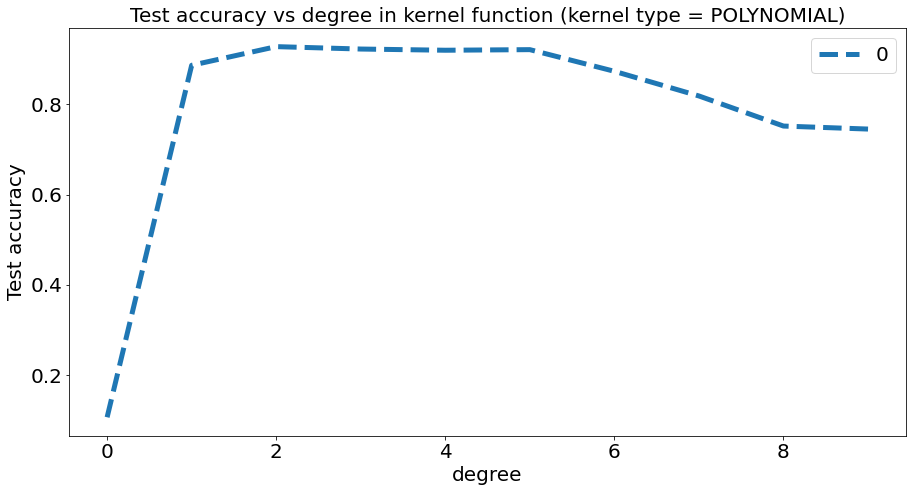

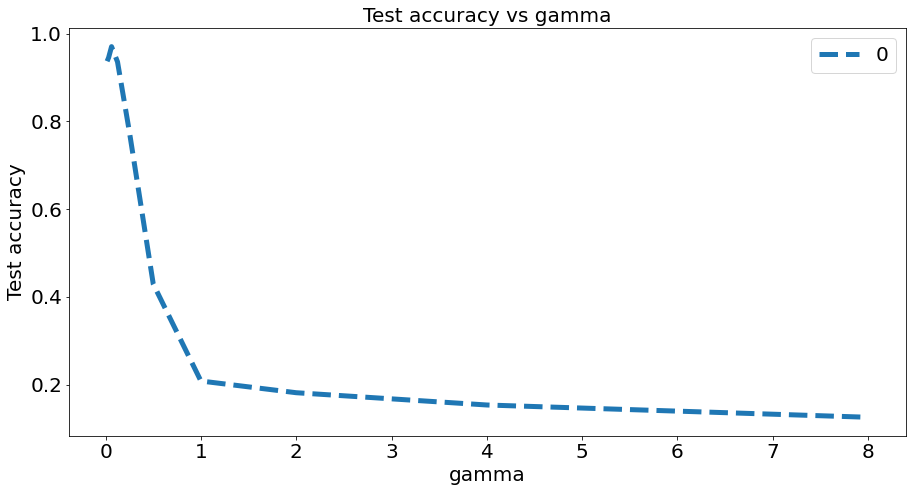

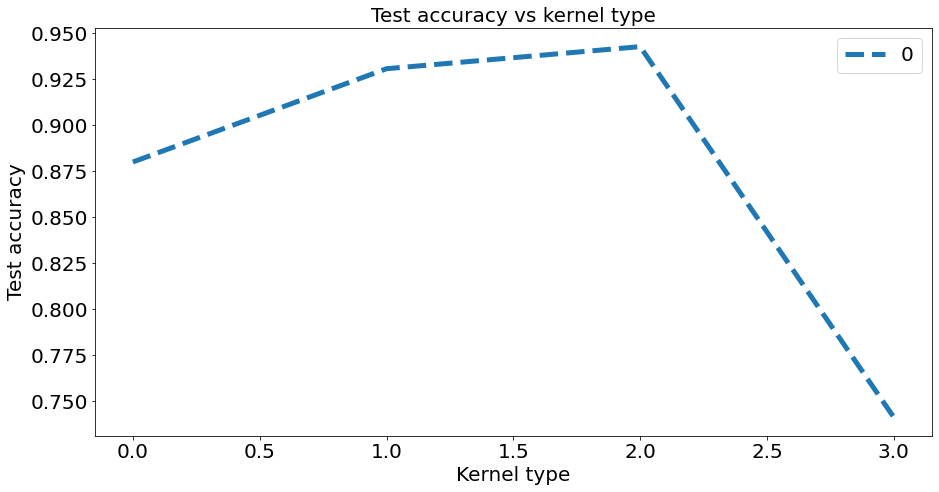

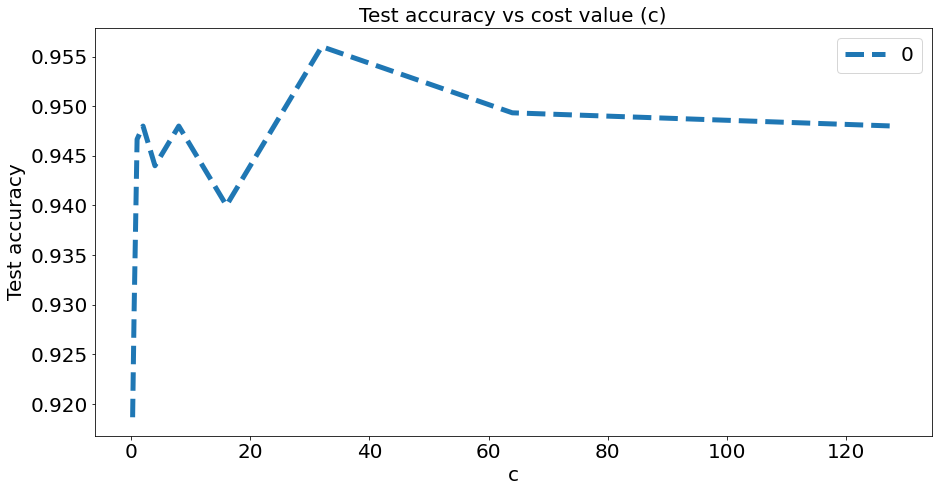

In [47]:
save_fig(plot_polynomial, IMAGE_DATA, 0, 1, 75, 1, 'plot48.svg')
save_fig(plot_rbfs, IMAGE_DATA, 0, 1, 75, 1, 'plot49.svg')
save_fig(plot_kt, IMAGE_DATA, 0, 1, 75, 1, 'plot50.svg')
save_fig(plot_c, IMAGE_DATA, 0, 1, 75, 1, 'plot51.svg')

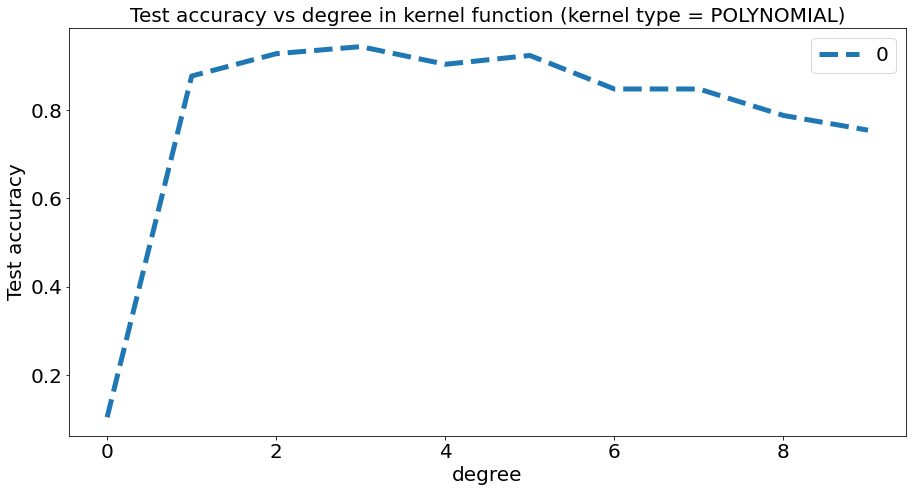

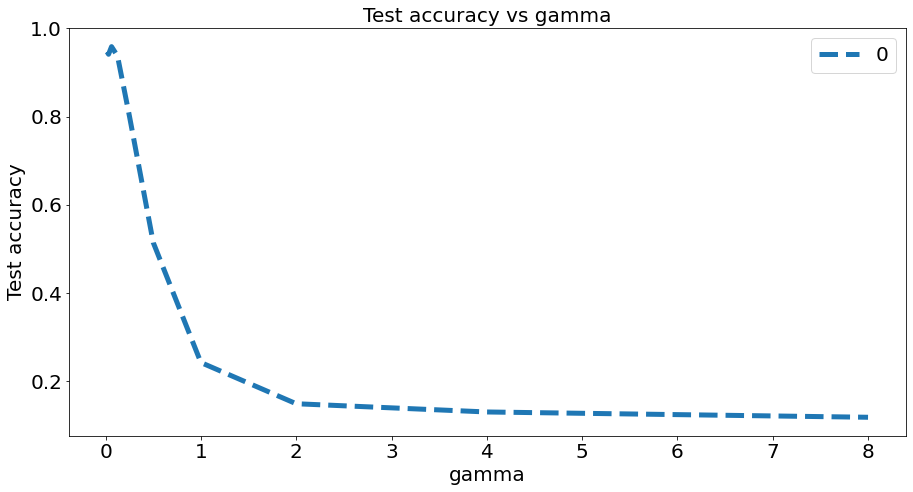

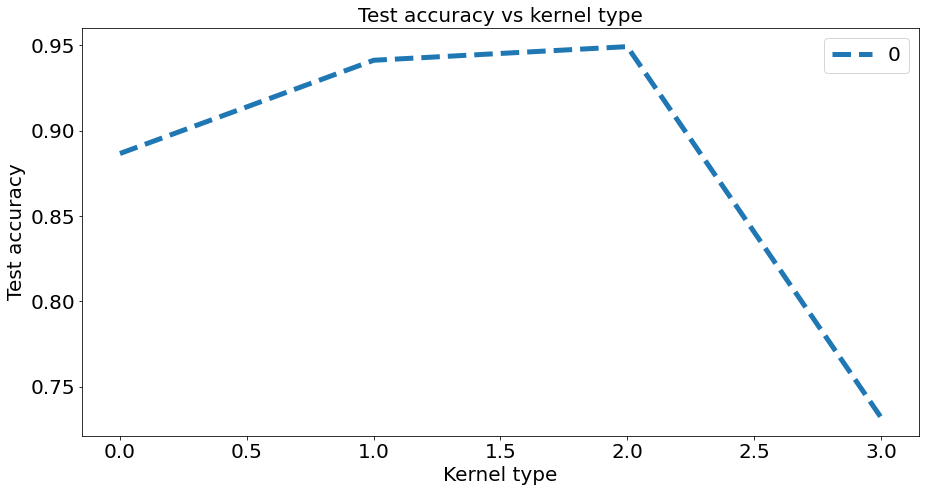

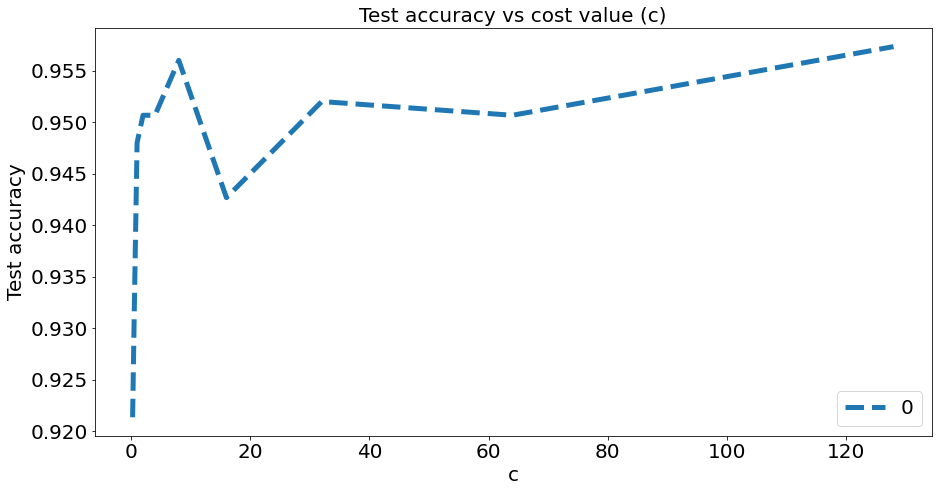

In [48]:
save_fig(plot_polynomial, IMAGE_DATA, 2, 3, 75, 1, 'plot52.svg')
save_fig(plot_rbfs, IMAGE_DATA, 2, 3, 75, 1, 'plot53.svg')
save_fig(plot_kt, IMAGE_DATA, 2, 3, 75, 1, 'plot54.svg')
save_fig(plot_c, IMAGE_DATA, 2, 3, 75, 1, 'plot55.svg')

###**Conclusions for hyperparameter**

Kernel Type  = Radial Basis Function<br>
Degree in kernel function  = 3 (for POLYNOMIAL type)<br>
Cost value = 4<br>
Gamma Value = 0.032 (for RBF)<br>


In [49]:
test_sklearn('rbf', 4, 0.032, 3, IMAGE_DATA, 0, 1, 75)

0.9533333333333334

### **Consideration of 10 features**

In [50]:
img_data1 = IMAGE_DATA.drop(['F11', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20', 'F21', 'F22', 'F23', 'F24', 'F25'], axis = 1)
img_data1

F1        F2        F3  ...        F9       F10  class_label
0     0.159628  3.569244  0.946156  ... -0.048626 -1.542681          7.0
1    -3.757384 -2.659323  0.574455  ...  1.881514 -0.159983          1.0
2     1.299146 -2.735298 -0.370838  ... -1.884790 -1.102868          3.0
3     2.133980 -1.039969  2.982761  ...  1.304166  2.986695          2.0
4    -0.003326  0.901577  1.910635  ...  1.154616  0.804863          5.0
...        ...       ...       ...  ...       ...       ...          ...
2995  2.379232 -4.261587  1.556199  ... -0.635389  1.806960          2.0
2996  1.821868 -1.216249  0.214245  ...  1.307043 -1.555220          6.0
2997  1.565306  1.507884 -0.180076  ...  2.346996 -1.478877          0.0
2998  0.342392 -1.140653 -0.959847  ... -2.099839  1.018491          5.0
2999 -1.108781 -1.079360  1.237192  ...  0.207503  0.564823          3.0

[3000 rows x 11 columns]

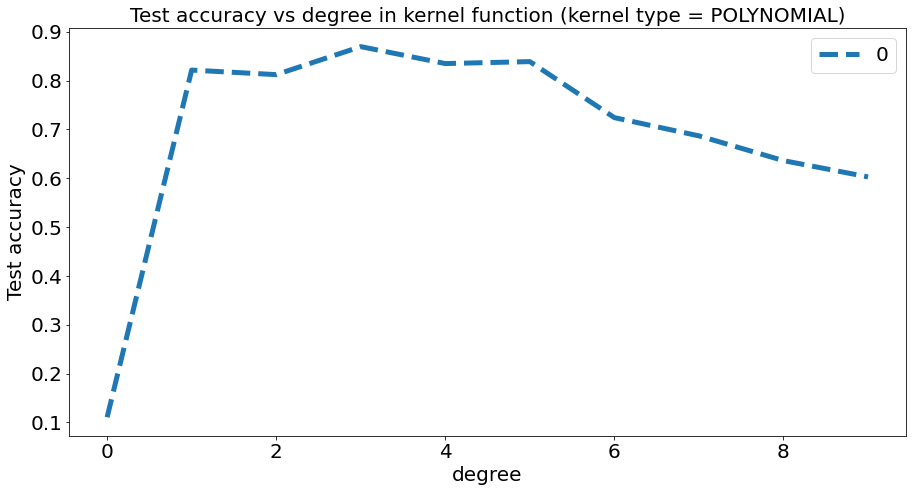

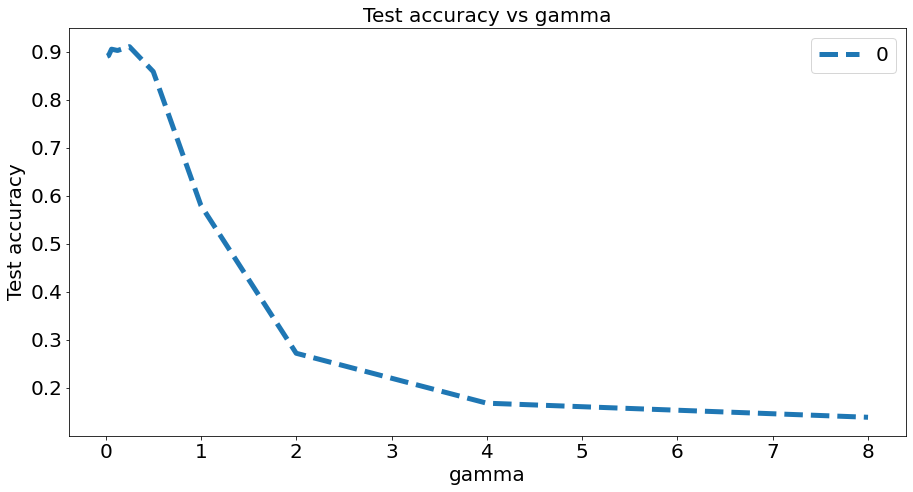

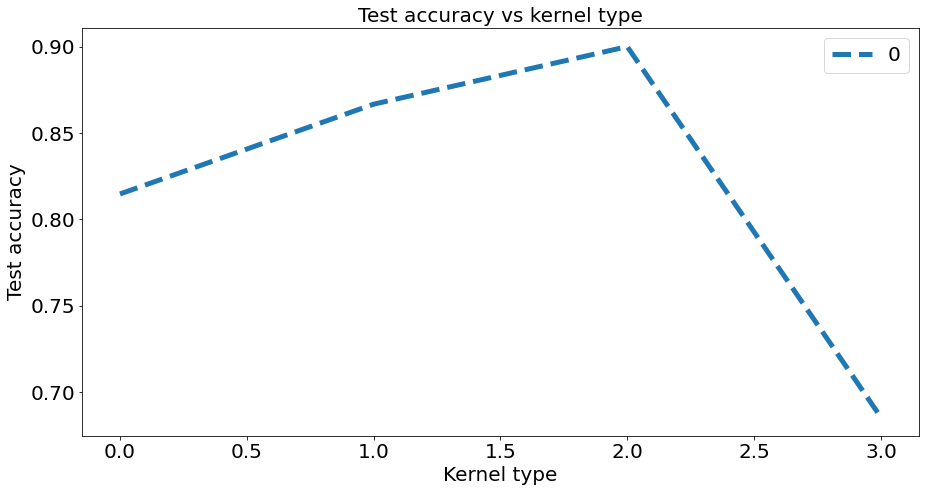

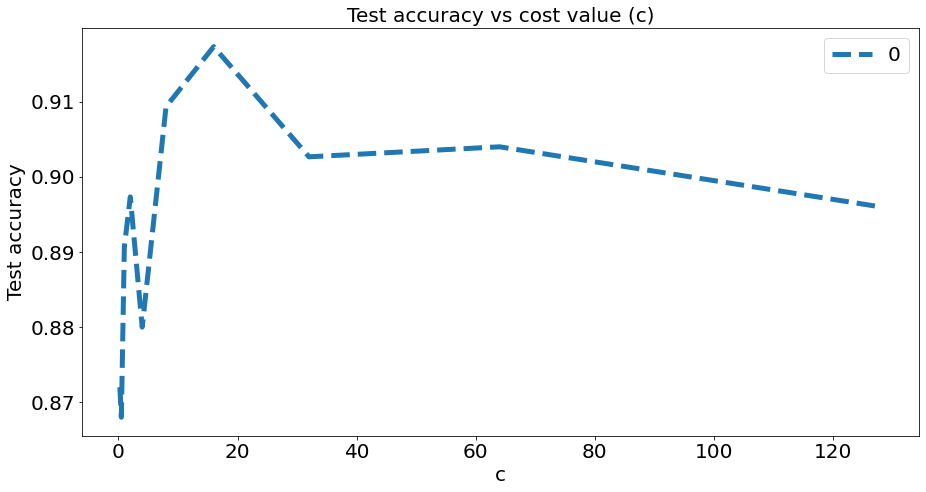

In [51]:
save_fig(plot_polynomial, img_data1, 0, 1, 75, 1, 'plot56.svg')
save_fig(plot_rbfs, img_data1, 0, 1, 75, 1, 'plot57.svg')
save_fig(plot_kt, img_data1, 0, 1, 75, 1, 'plot58.svg')
save_fig(plot_c, img_data1, 0, 1, 75, 1, 'plot59.svg')

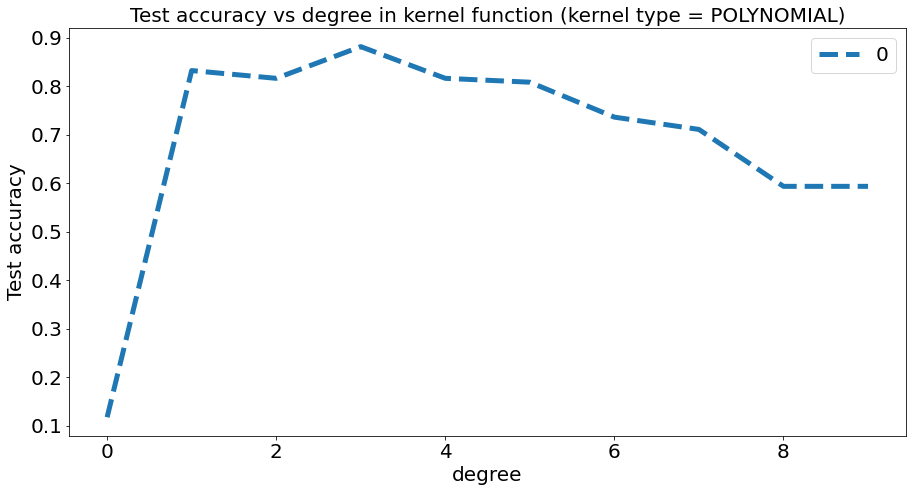

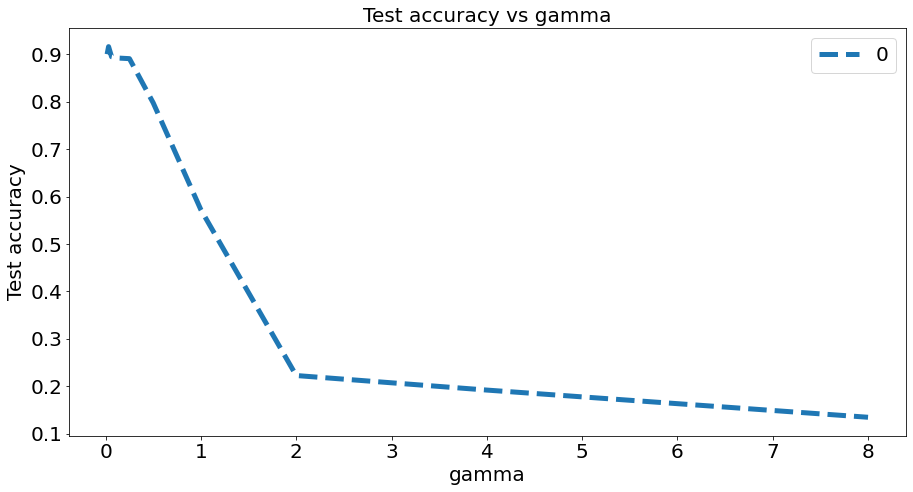

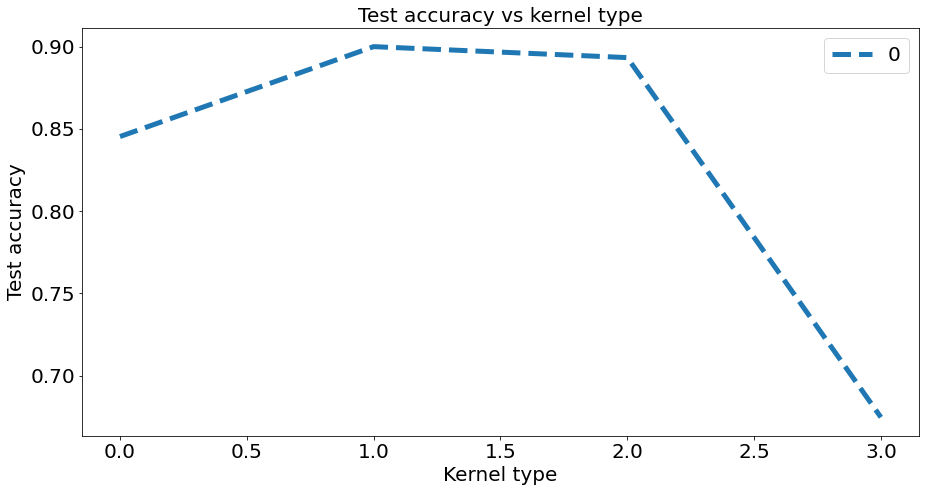

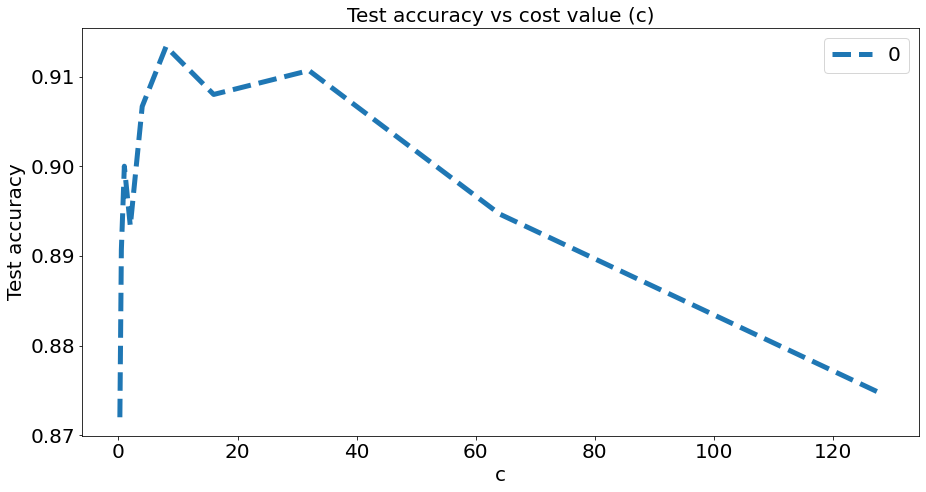

In [52]:
save_fig(plot_polynomial, img_data1, 2, 3, 75, 1, 'plot60.svg')
save_fig(plot_rbfs, img_data1, 2, 3, 75, 1, 'plot61.svg')
save_fig(plot_kt, img_data1, 2, 3, 75, 1, 'plot62.svg')
save_fig(plot_c, img_data1, 2, 3, 75, 1, 'plot63.svg')

In [53]:
img_data2 = IMAGE_DATA.drop(['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F21', 'F22', 'F23', 'F24', 'F25'], axis = 1)
img_data2

F11       F12       F13  ...       F19       F20  class_label
0     0.638329  0.433765  2.228255  ...  0.303223  0.137926          7.0
1    -0.956245 -0.809724 -0.423412  ... -0.424678 -0.014438          1.0
2    -0.277414  1.599624  0.875395  ...  1.368997 -0.745012          3.0
3     0.136494  0.575337 -2.338978  ... -0.008174 -0.559950          2.0
4    -0.630059  1.240954 -0.202304  ...  0.734458 -0.842683          5.0
...        ...       ...       ...  ...       ...       ...          ...
2995 -0.856515  1.192357  1.025365  ...  0.848278  0.052298          2.0
2996 -0.501167 -0.940197 -1.173121  ... -0.544630  0.312495          6.0
2997 -1.572103 -1.453141  1.817373  ...  1.079164  0.529654          0.0
2998 -0.354647 -0.100109 -0.200731  ... -0.868468  0.965434          5.0
2999  0.572016  0.504234  0.252221  ... -0.040038 -0.594674          3.0

[3000 rows x 11 columns]

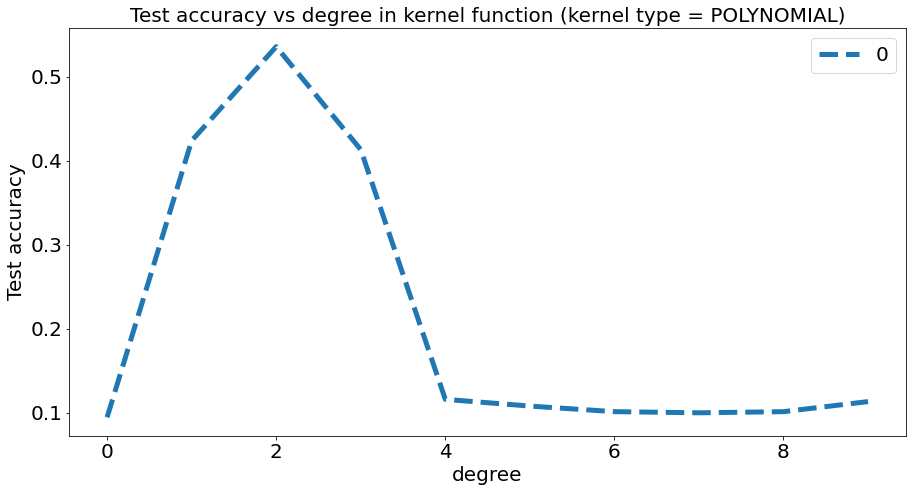

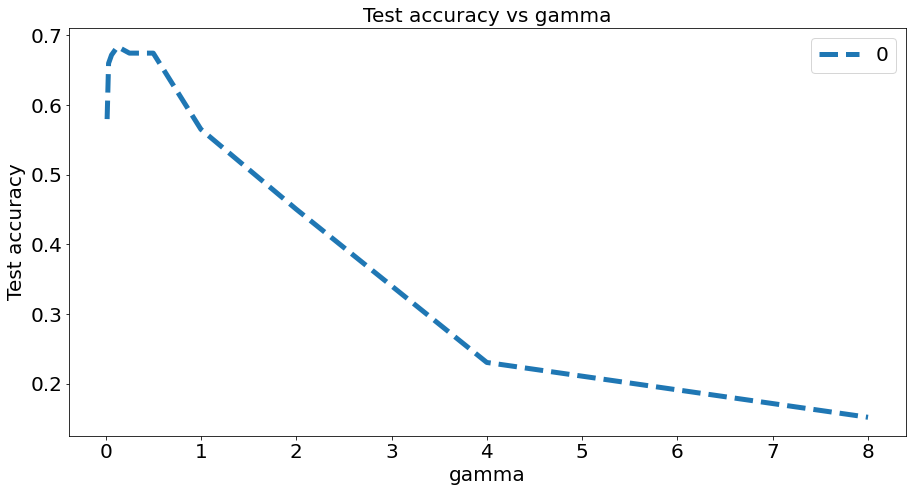

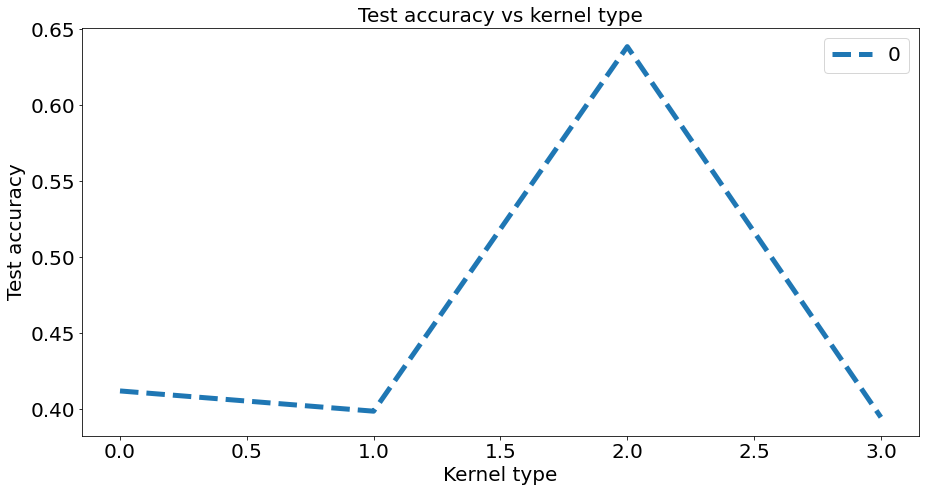

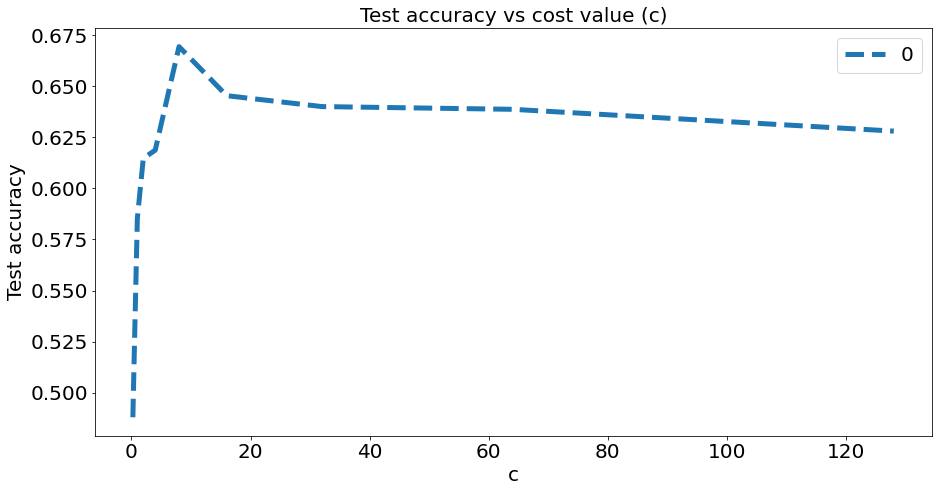

In [54]:
save_fig(plot_polynomial, img_data2, 0, 1, 75, 1, 'plot64.svg')
save_fig(plot_rbfs, img_data2, 0, 1, 75, 1, 'plot65.svg')
save_fig(plot_kt, img_data2, 0, 1, 75, 1, 'plot66.svg')
save_fig(plot_c, img_data2, 0, 1, 75, 1, 'plot67.svg')

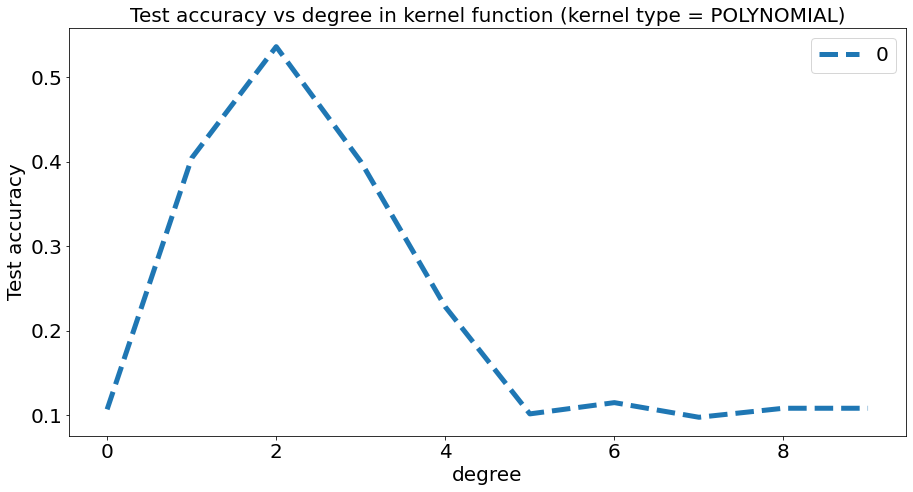

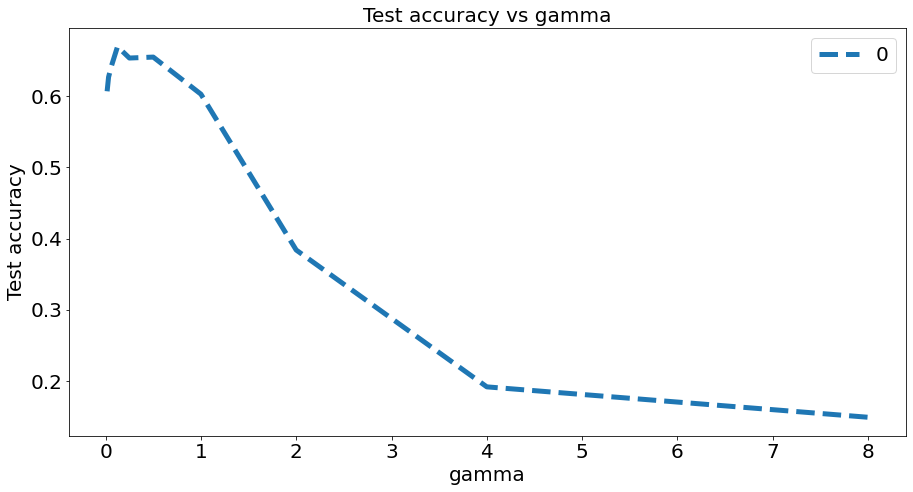

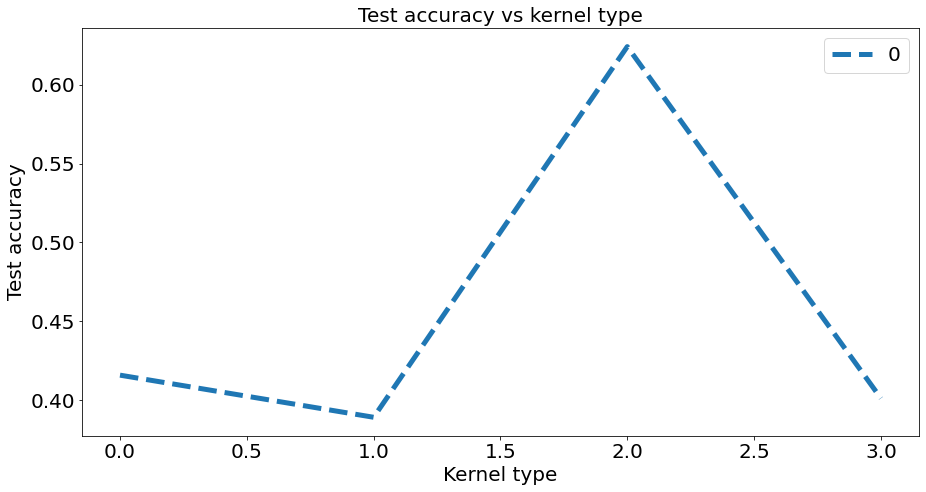

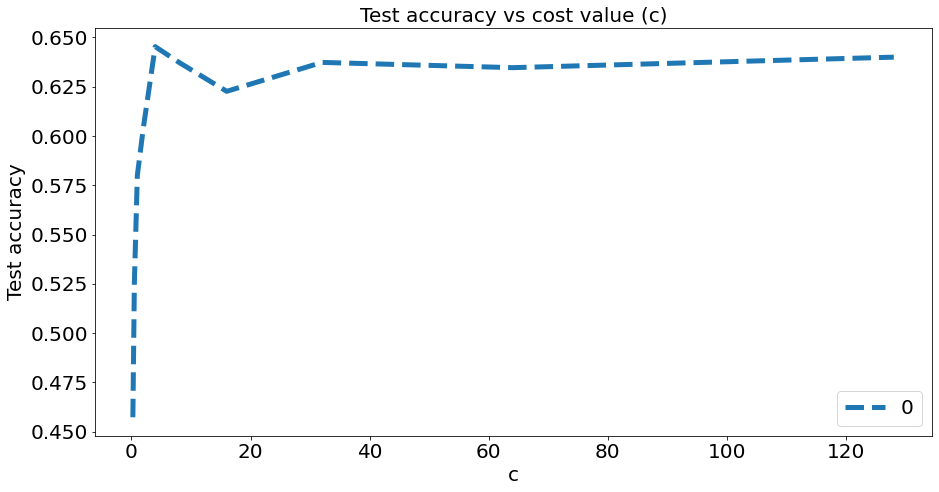

In [55]:
save_fig(plot_polynomial, img_data2, 2, 3, 75, 1, 'plot68.svg')
save_fig(plot_rbfs, img_data2, 2, 3, 75, 1, 'plot69.svg')
save_fig(plot_kt, img_data2, 2, 3, 75, 1, 'plot70.svg')
save_fig(plot_c, img_data2, 2, 3, 75, 1, 'plot71.svg')

### **LIBSVM Multiclass classification**

In [56]:
def test_result(data, parameter_string = None, percent_train = 80):
  t1, t2, t3, t4 = partition(data, percent_train)
  prob = svm_problem(t3,t1)
  param = svm_parameter(parameter_string)
  model = svm_train(prob, param)
  p_label, p_acc, p_val = svm_predict(t4, t2, model)
  ACC, MSE, SCC = evaluations(t4, p_label)
  return ACC

In [57]:
def plot_polydeg(data, percent, N):
  fig, ax = plt.subplots()
  fig.set_size_inches(15, 7.5)
  plt.title("Test accuracy vs degree in kernel function (kernel type = POLYNOMIAL)", fontsize=20)
  plt.xlabel("degree")
  plt.ylabel("Test accuracy")
  ax. xaxis. label. set_size(20)
  ax. yaxis. label. set_size(20)
  plt.xticks(fontsize=20)
  plt.yticks(fontsize=20)
  for i in range(0, N):
    ACC0 = test_result(data, '-s 0 -c 10 -t 1 -r 1 -d 0', percent)
    ACC1 = test_result(data, '-s 0 -c 10 -t 1 -r 1 -d 1', percent)
    ACC2 = test_result(data, '-s 0 -c 10 -t 1 -r 1 -d 2', percent)
    ACC3 = test_result(data, '-s 0 -c 10 -t 1 -r 1 -d 3', percent)
    ACC4 = test_result(data, '-s 0 -c 10 -t 1 -r 1 -d 4', percent)
    ACC5 = test_result(data, '-s 0 -c 10 -t 1 -r 1 -d 5', percent)
    ACC6 = test_result(data, '-s 0 -c 10 -t 1 -r 1 -d 6', percent)
    ACC7 = test_result(data, '-s 0 -c 10 -t 1 -r 1 -d 7', percent)
    ACC8 = test_result(data, '-s 0 -c 10 -t 1 -r 1 -d 8', percent)
    ACC9 = test_result(data, '-s 0 -c 10 -t 1 -r 1 -d 9', percent)
    
    xpoints = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    ypoints = [ACC0, ACC1, ACC2, ACC3, ACC4, ACC5, ACC6, ACC7, ACC8, ACC9]
    
    plt.plot(xpoints, ypoints, linestyle='--', linewidth=5, label=i)

  plt.legend(fontsize=20)
  return plt

In [58]:
def plot_polygamma(data, percent, N):
  fig, ax = plt.subplots()
  fig.set_size_inches(15, 7.5)
  plt.title("Test accuracy vs gamma (kernel type = POLYNOMIAL)", fontsize=20)
  plt.xlabel("gamma")
  plt.ylabel("Test accuracy")
  ax. xaxis. label. set_size(20)
  ax. yaxis. label. set_size(20)
  plt.xticks(fontsize=20)
  plt.yticks(fontsize=20)
  for i in range(0, N):
    ACC0 = test_result(data, '-s 0 -c 10 -t 1 -r 1 -d 3 -g 0.016', percent)
    ACC1 = test_result(data, '-s 0 -c 10 -t 1 -r 1 -d 3 -g 0.03125', percent)
    ACC2 = test_result(data, '-s 0 -c 10 -t 1 -r 1 -d 3 -g 0.0625', percent)
    ACC3 = test_result(data, '-s 0 -c 10 -t 1 -r 1 -d 3 -g 0.125', percent)
    ACC4 = test_result(data, '-s 0 -c 10 -t 1 -r 1 -d 3 -g 0.25', percent)
    ACC5 = test_result(data, '-s 0 -c 10 -t 1 -r 1 -d 3 -g 0.5', percent)
    ACC6 = test_result(data, '-s 0 -c 10 -t 1 -r 1 -d 3 -g 1', percent)
    ACC7 = test_result(data, '-s 0 -c 10 -t 1 -r 1 -d 3 -g 2', percent)
    ACC8 = test_result(data, '-s 0 -c 10 -t 1 -r 1 -d 3 -g 4', percent)
    ACC9 = test_result(data, '-s 0 -c 10 -t 1 -r 1 -d 3 -g 8', percent)
    
    xpoints = [0.016, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8]
    ypoints = [ACC0, ACC1, ACC2, ACC3, ACC4, ACC5, ACC6, ACC7, ACC8, ACC9]
    
    plt.plot(xpoints, ypoints, linestyle='--', linewidth=5, label=i)

  plt.legend(fontsize=20)
  return plt

In [59]:
def plot_rbfgamma(data, percent, N):
  fig, ax = plt.subplots()
  fig.set_size_inches(15, 7.5)
  plt.title("Test accuracy vs gamma (kernel type = RBF)", fontsize=20)
  plt.xlabel("gamma")
  plt.ylabel("Test accuracy")
  ax. xaxis. label. set_size(20)
  ax. yaxis. label. set_size(20)
  plt.xticks(fontsize=20)
  plt.yticks(fontsize=20)
  for i in range(0, N):
    ACC0 = test_result(data, '-s 0 -c 10 -t 2 -r 1 -d 3 -g 0.016', percent)
    ACC1 = test_result(data, '-s 0 -c 10 -t 2 -r 1 -d 3 -g 0.03125', percent)
    ACC2 = test_result(data, '-s 0 -c 10 -t 2 -r 1 -d 3 -g 0.0625', percent)
    ACC3 = test_result(data, '-s 0 -c 10 -t 2 -r 1 -d 3 -g 0.125', percent)
    ACC4 = test_result(data, '-s 0 -c 10 -t 2 -r 1 -d 3 -g 0.25', percent)
    ACC5 = test_result(data, '-s 0 -c 10 -t 2 -r 1 -d 3 -g 0.5', percent)
    ACC6 = test_result(data, '-s 0 -c 10 -t 2 -r 1 -d 3 -g 1', percent)
    ACC7 = test_result(data, '-s 0 -c 10 -t 2 -r 1 -d 3 -g 2', percent)
    ACC8 = test_result(data, '-s 0 -c 10 -t 2 -r 1 -d 3 -g 4', percent)
    ACC9 = test_result(data, '-s 0 -c 10 -t 2 -r 1 -d 3 -g 8', percent)
    
    xpoints = [0.016, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8]
    ypoints = [ACC0, ACC1, ACC2, ACC3, ACC4, ACC5, ACC6, ACC7, ACC8, ACC9]
    
    plt.plot(xpoints, ypoints, linestyle='--', linewidth=5, label=i)

  plt.legend(fontsize=20)
  return plt

In [60]:
def plot_ktype(data, percent, N):
  fig, ax = plt.subplots()
  fig.set_size_inches(15, 7.5)
  plt.title("Test accuracy vs kernel type", fontsize=20)
  plt.xlabel("kernel type")
  plt.ylabel("Test accuracy")
  ax. xaxis. label. set_size(20)
  ax. yaxis. label. set_size(20)
  plt.xticks(fontsize=20)
  plt.yticks(fontsize=20)
  for i in range(0, N):
    ACC0 = test_result(data, '-s 0 -c 10 -t 0 -r 1 -d 3 -g 0.03125', percent)
    ACC1 = test_result(data, '-s 0 -c 10 -t 1 -r 1 -d 3 -g 0.03125', percent)
    ACC2 = test_result(data, '-s 0 -c 10 -t 2 -r 1 -d 3 -g 0.03125', percent)
    ACC3 = test_result(data, '-s 0 -c 10 -t 3 -r 1 -d 3 -g 0.03125', percent)
    
    xpoints = [0, 1, 2, 3]
    ypoints = [ACC0, ACC1, ACC2, ACC3]
    
    plt.plot(xpoints, ypoints, linestyle='--', linewidth=5, label=i)

  plt.legend(fontsize=20)
  return plt

In [61]:
def plot_cval(data, percent, N):
  fig, ax = plt.subplots()
  fig.set_size_inches(15, 7.5)
  plt.title("Test accuracy vs cost value (c)", fontsize=20)
  plt.xlabel("c")
  plt.ylabel("Test accuracy")
  ax. xaxis. label. set_size(20)
  ax. yaxis. label. set_size(20)
  plt.xticks(fontsize=20)
  plt.yticks(fontsize=20)
  for i in range(0, N):
    ACC0 = test_result(data, '-s 0 -c 0.25 -t 2 -r 1 -d 3 -g 0.03125', percent)
    ACC1 = test_result(data, '-s 0 -c 0.5 -t 2 -r 1 -d 3 -g 0.03125', percent)
    ACC2 = test_result(data, '-s 0 -c 1 -t 2 -r 1 -d 3 -g 0.03125', percent)
    ACC3 = test_result(data, '-s 0 -c 2 -t 2 -r 1 -d 3 -g 0.03125', percent)
    ACC4 = test_result(data, '-s 0 -c 4 -t 2 -r 1 -d 3 -g 0.03125', percent)
    ACC5 = test_result(data, '-s 0 -c 8 -t 2 -r 1 -d 3 -g 0.03125', percent)
    ACC6 = test_result(data, '-s 0 -c 16 -t 2 -r 1 -d 3 -g 0.03125', percent)
    ACC7 = test_result(data, '-s 0 -c 32 -t 2 -r 1 -d 3 -g 0.03125', percent)
    ACC8 = test_result(data, '-s 0 -c 64 -t 2 -r 1 -d 3 -g 0.03125', percent)
    ACC9 = test_result(data, '-s 0 -c 128 -t 2 -r 1 -d 3 -g 0.03125', percent)
    
    xpoints = [0.25, 0.5, 1, 2, 4, 8, 16, 32, 64, 128]
    ypoints = [ACC0, ACC1, ACC2, ACC3, ACC4, ACC5, ACC6, ACC7, ACC8, ACC9]
    
    plt.plot(xpoints, ypoints, linestyle='--', linewidth=5, label=i)

  plt.legend(fontsize=20)
  return plt

In [62]:
def save_plots(function, data, percent, N, image_name):
  plt = function(data, percent, N)
  image_format = 'svg' # e.g .png, .svg, etc.
  plt.savefig(image_name, format=image_format, bbox_inches='tight', dpi=1200)
  #files.download(image_name)


Accuracy = 10.4% (78/750) (classification)
Accuracy = 87.2% (654/750) (classification)
Accuracy = 93.6% (702/750) (classification)
Accuracy = 94.4% (708/750) (classification)
Accuracy = 95.4667% (716/750) (classification)
Accuracy = 94.9333% (712/750) (classification)
Accuracy = 94.6667% (710/750) (classification)
Accuracy = 94.8% (711/750) (classification)
Accuracy = 94.4% (708/750) (classification)
Accuracy = 93.8667% (704/750) (classification)
Accuracy = 9.86667% (74/750) (classification)
Accuracy = 90.2667% (677/750) (classification)
Accuracy = 92.2667% (692/750) (classification)
Accuracy = 95.0667% (713/750) (classification)
Accuracy = 96% (720/750) (classification)
Accuracy = 94.9333% (712/750) (classification)
Accuracy = 94.1333% (706/750) (classification)
Accuracy = 94.1333% (706/750) (classification)
Accuracy = 94.1333% (706/750) (classification)
Accuracy = 93.6% (702/750) (classification)
Accuracy = 9.46667% (71/750) (classification)
Accuracy = 87.8667% (659/750) (classificat

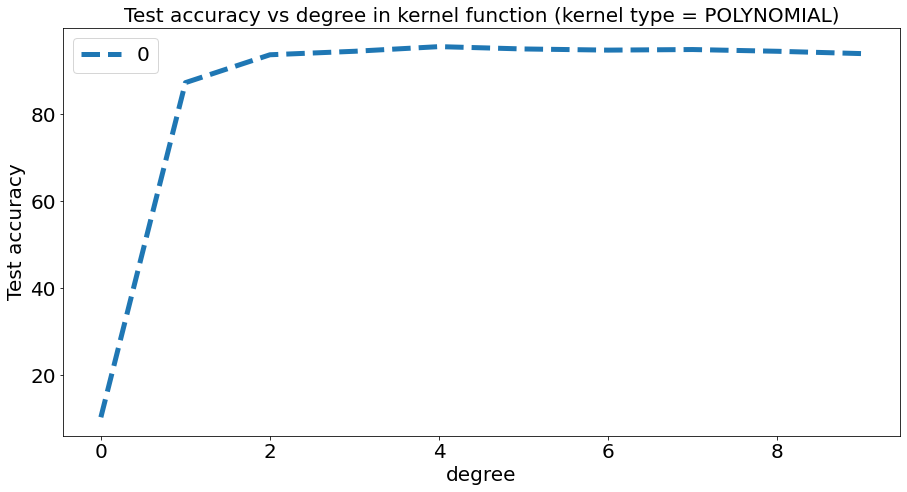

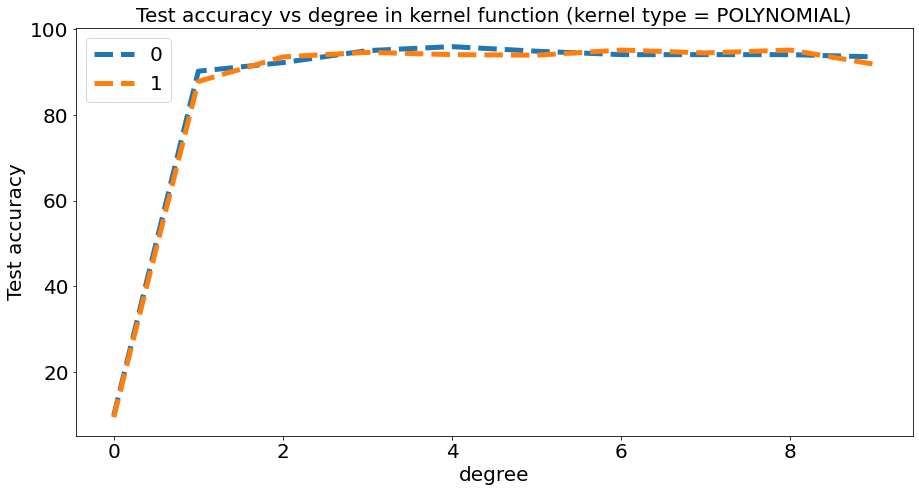

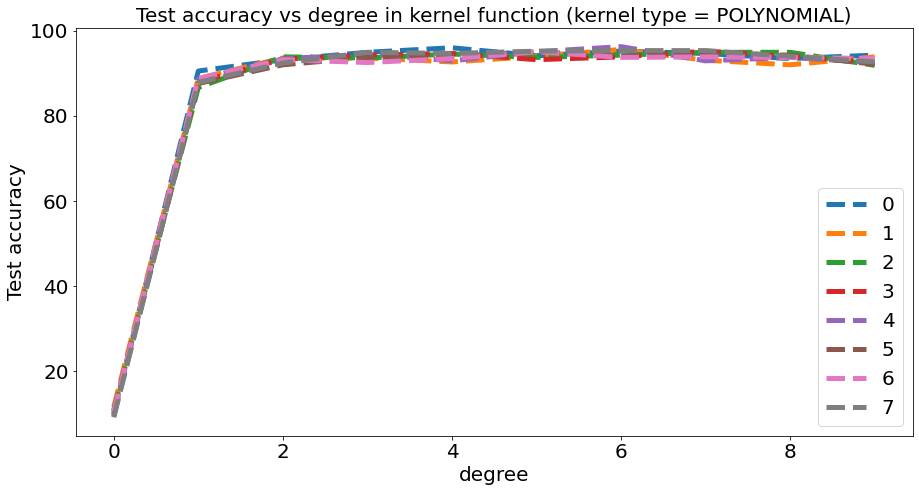

In [63]:
save_plots(plot_polydeg, IMAGE_DATA, 75, 1, 'plot1.svg')
save_plots(plot_polydeg, IMAGE_DATA, 75, 2, 'plot2.svg')
save_plots(plot_polydeg, IMAGE_DATA, 75, 8, 'plot3.svg')

Accuracy = 92.9333% (697/750) (classification)
Accuracy = 93.6% (702/750) (classification)
Accuracy = 93.8667% (704/750) (classification)
Accuracy = 94.5333% (709/750) (classification)
Accuracy = 94.1333% (706/750) (classification)
Accuracy = 94.4% (708/750) (classification)
Accuracy = 95.0667% (713/750) (classification)
Accuracy = 94.1333% (706/750) (classification)
Accuracy = 94% (705/750) (classification)
Accuracy = 94.6667% (710/750) (classification)
Accuracy = 93.8667% (704/750) (classification)
Accuracy = 95.7333% (718/750) (classification)
Accuracy = 95.8667% (719/750) (classification)
Accuracy = 93.7333% (703/750) (classification)
Accuracy = 95.6% (717/750) (classification)
Accuracy = 96.1333% (721/750) (classification)
Accuracy = 94.9333% (712/750) (classification)
Accuracy = 94.2667% (707/750) (classification)
Accuracy = 91.8667% (689/750) (classification)
Accuracy = 95.0667% (713/750) (classification)
Accuracy = 94.5333% (709/750) (classification)
Accuracy = 94.1333% (706/75

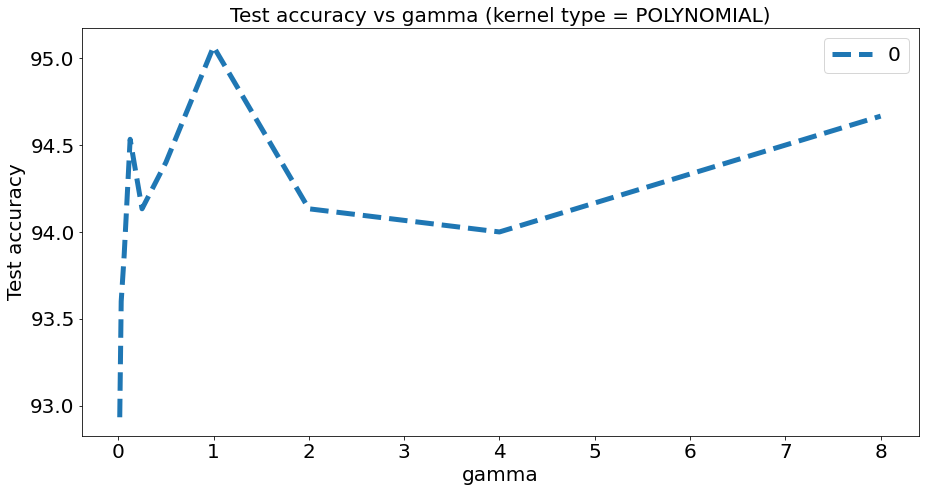

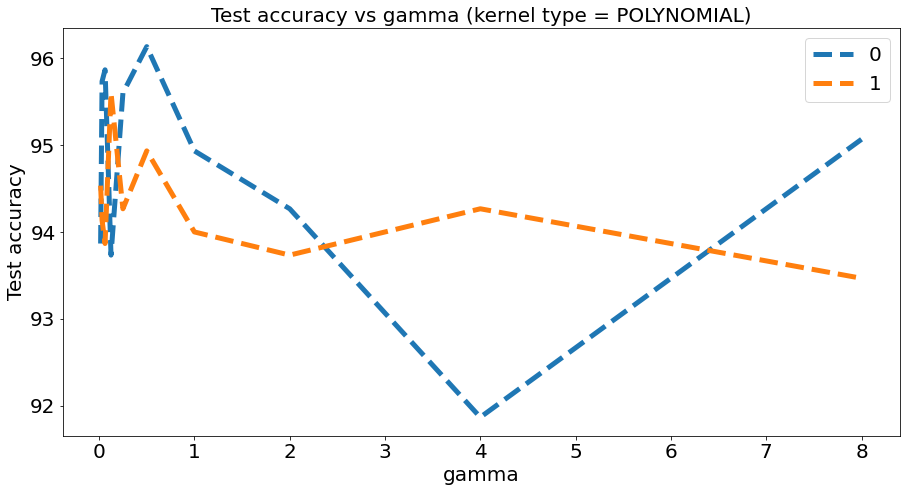

In [64]:
save_plots(plot_polygamma, IMAGE_DATA, 75, 1, 'plot4.svg')
save_plots(plot_polygamma, IMAGE_DATA, 75, 2, 'plot5.svg')

Accuracy = 96% (720/750) (classification)
Accuracy = 95.7333% (718/750) (classification)
Accuracy = 97.2% (729/750) (classification)
Accuracy = 92.8% (696/750) (classification)
Accuracy = 82.5333% (619/750) (classification)
Accuracy = 39.0667% (293/750) (classification)
Accuracy = 21.4667% (161/750) (classification)
Accuracy = 18% (135/750) (classification)
Accuracy = 15.7333% (118/750) (classification)
Accuracy = 12% (90/750) (classification)
Accuracy = 94.4% (708/750) (classification)
Accuracy = 95.3333% (715/750) (classification)
Accuracy = 95.2% (714/750) (classification)
Accuracy = 94.1333% (706/750) (classification)
Accuracy = 79.2% (594/750) (classification)
Accuracy = 42.8% (321/750) (classification)
Accuracy = 18.8% (141/750) (classification)
Accuracy = 16.8% (126/750) (classification)
Accuracy = 14.2667% (107/750) (classification)
Accuracy = 10.2667% (77/750) (classification)
Accuracy = 95.0667% (713/750) (classification)
Accuracy = 95.0667% (713/750) (classification)
Accurac

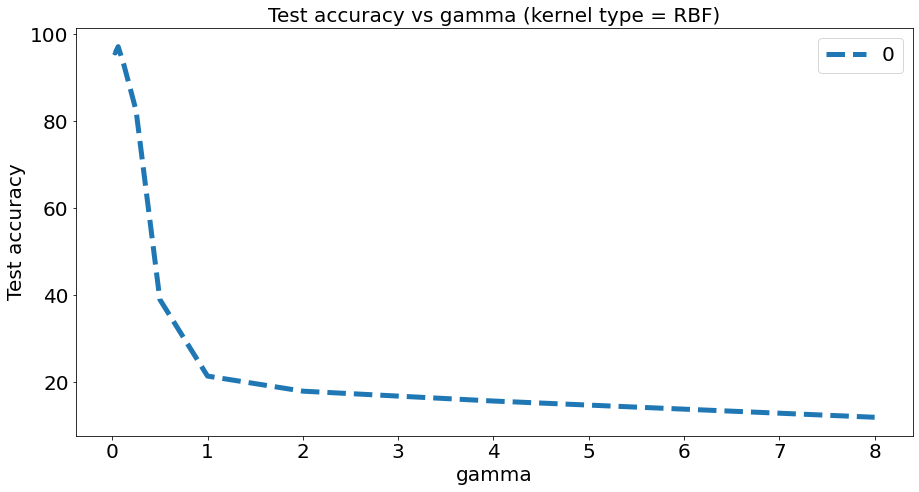

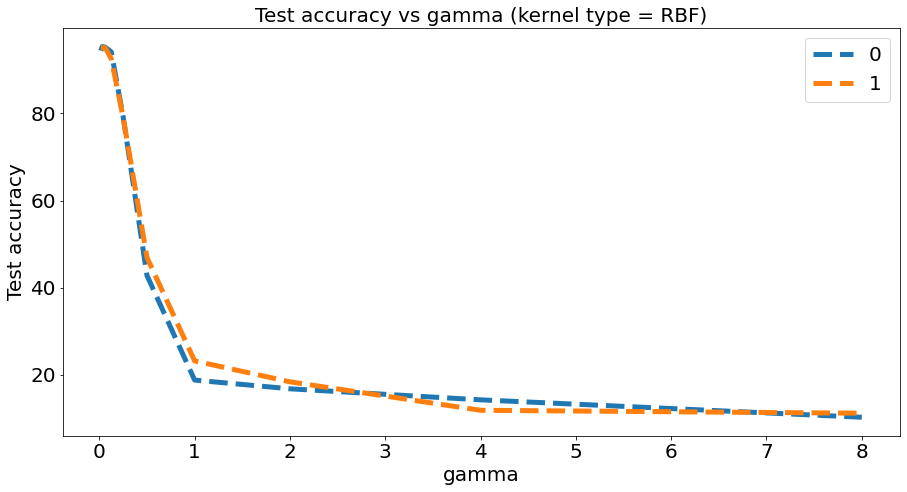

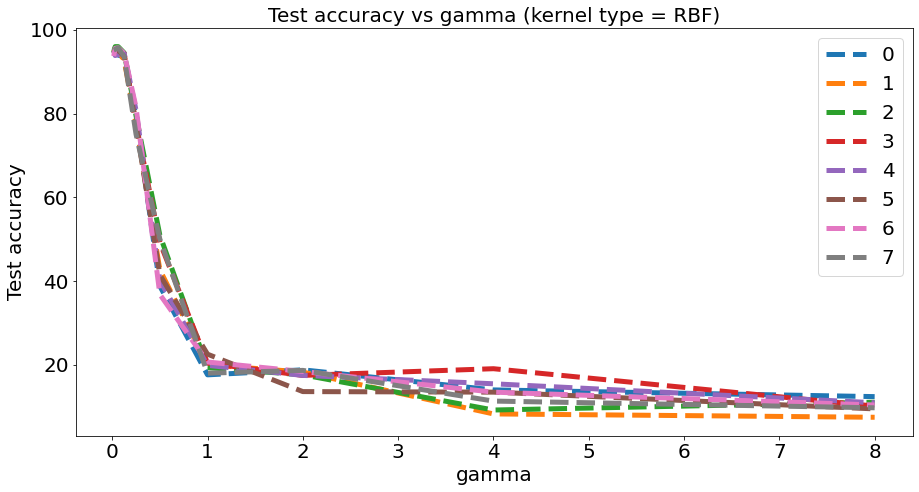

In [65]:
save_plots(plot_rbfgamma, IMAGE_DATA, 75, 1, 'plot6.svg')
save_plots(plot_rbfgamma, IMAGE_DATA, 75, 2, 'plot7.svg')
save_plots(plot_rbfgamma, IMAGE_DATA, 75, 8, 'plot8.svg')

Accuracy = 87.8667% (659/750) (classification)
Accuracy = 93.3333% (700/750) (classification)
Accuracy = 95.0667% (713/750) (classification)
Accuracy = 58.5333% (439/750) (classification)
Accuracy = 85.8667% (644/750) (classification)
Accuracy = 94.1333% (706/750) (classification)
Accuracy = 94.5333% (709/750) (classification)
Accuracy = 58.1333% (436/750) (classification)
Accuracy = 86.2667% (647/750) (classification)
Accuracy = 95.4667% (716/750) (classification)
Accuracy = 96% (720/750) (classification)
Accuracy = 58.1333% (436/750) (classification)
Accuracy = 88.4% (663/750) (classification)
Accuracy = 94% (705/750) (classification)
Accuracy = 95.6% (717/750) (classification)
Accuracy = 56.1333% (421/750) (classification)
Accuracy = 89.3333% (670/750) (classification)
Accuracy = 95.0667% (713/750) (classification)
Accuracy = 95.7333% (718/750) (classification)
Accuracy = 56.9333% (427/750) (classification)
Accuracy = 86.5333% (649/750) (classification)
Accuracy = 94.6667% (710/750)

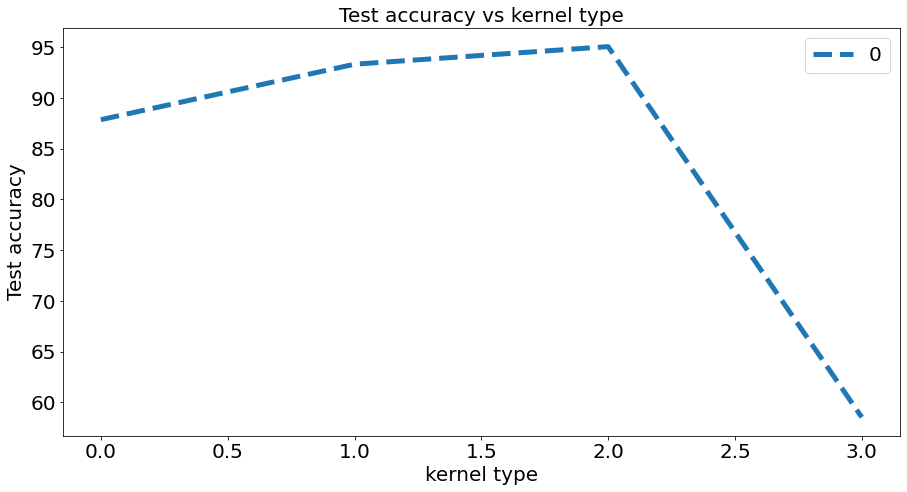

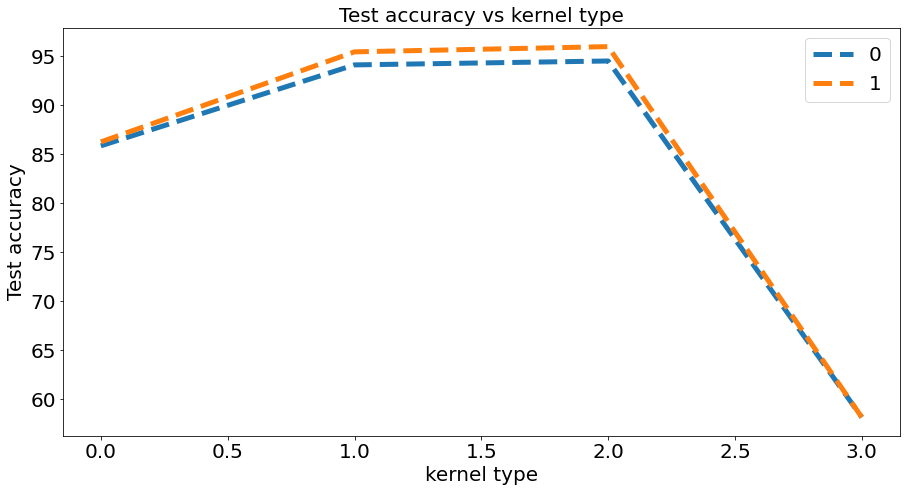

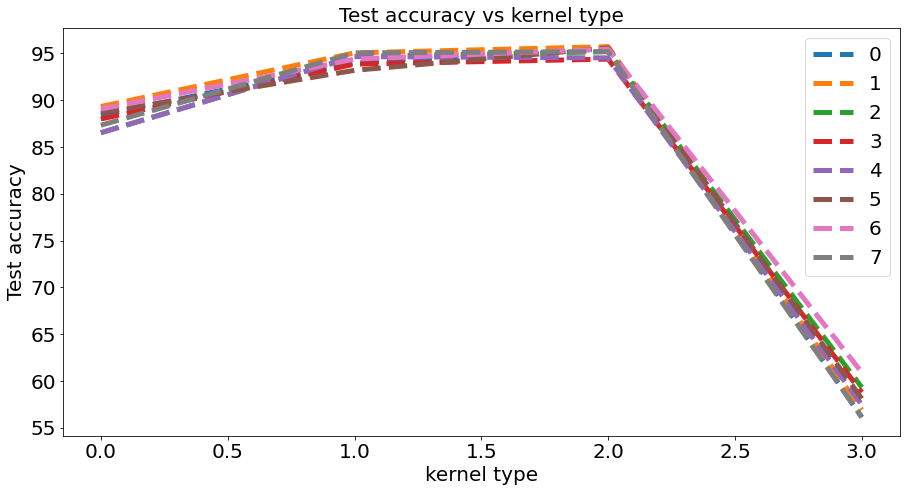

In [66]:
save_plots(plot_ktype, IMAGE_DATA, 75, 1, 'plot9.svg')
save_plots(plot_ktype, IMAGE_DATA, 75, 2, 'plot10.svg')
save_plots(plot_ktype, IMAGE_DATA, 75, 8, 'plot11.svg')

Accuracy = 93.2% (699/750) (classification)
Accuracy = 92.6667% (695/750) (classification)
Accuracy = 94.4% (708/750) (classification)
Accuracy = 96.1333% (721/750) (classification)
Accuracy = 95.8667% (719/750) (classification)
Accuracy = 94.4% (708/750) (classification)
Accuracy = 94.5333% (709/750) (classification)
Accuracy = 95.3333% (715/750) (classification)
Accuracy = 94.5333% (709/750) (classification)
Accuracy = 95.0667% (713/750) (classification)
Accuracy = 90.5333% (679/750) (classification)
Accuracy = 94.1333% (706/750) (classification)
Accuracy = 94.6667% (710/750) (classification)
Accuracy = 95.2% (714/750) (classification)
Accuracy = 96.4% (723/750) (classification)
Accuracy = 95.3333% (715/750) (classification)
Accuracy = 96.5333% (724/750) (classification)
Accuracy = 94.9333% (712/750) (classification)
Accuracy = 96.6667% (725/750) (classification)
Accuracy = 95.3333% (715/750) (classification)
Accuracy = 91.2% (684/750) (classification)
Accuracy = 92.6667% (695/750) (

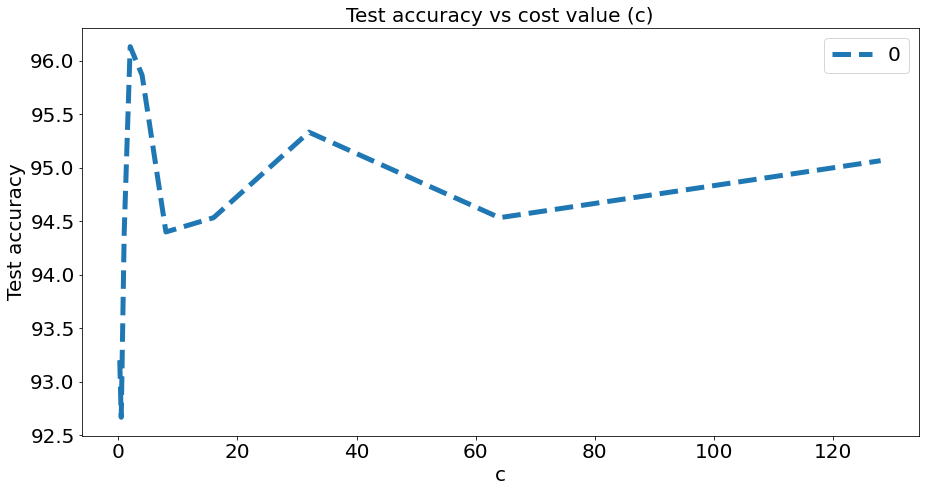

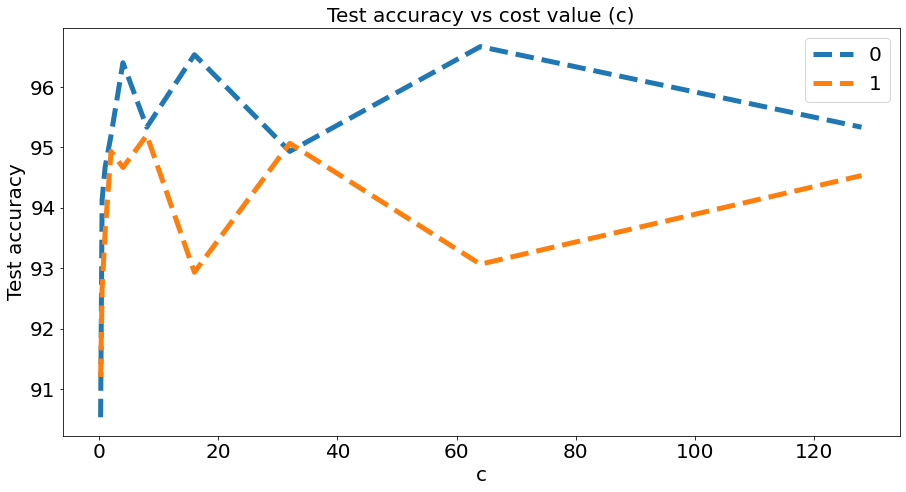

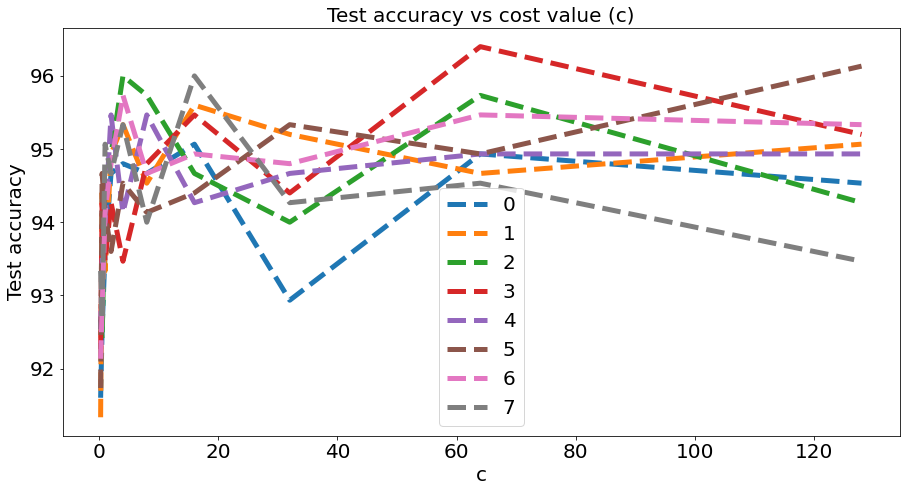

In [67]:
save_plots(plot_cval, IMAGE_DATA, 75, 1, 'plot12.svg')
save_plots(plot_cval, IMAGE_DATA, 75, 2, 'plot13.svg')
save_plots(plot_cval, IMAGE_DATA, 75, 8, 'plot14.svg')

###**Conclusions for hyperparameter**

<center>-s 0 -c 4 -t 2 -r 1 -d 4 -g 0.032</center>
1)	Kernel Type = Radial Basis Function<br>
2)	Degree in kernel function = 4, Gamma value = 0.5 (for POLYNOMIAL type)<br>
3)	Cost value = 4<br>
4)	Gamma Value = 0.032 (for RBF) <br>


In [68]:
test_result(IMAGE_DATA, '-s 0 -c 4 -t 2 -r 1 -d 4 -g 0.032', 75)

Accuracy = 94.9333% (712/750) (classification)


94.93333333333334

### **Consideration of 10 features**

In [69]:
img_data1 = IMAGE_DATA.drop(['F11', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20', 'F21', 'F22', 'F23', 'F24', 'F25'], axis = 1)
img_data1

F1        F2        F3  ...        F9       F10  class_label
0     0.159628  3.569244  0.946156  ... -0.048626 -1.542681          7.0
1    -3.757384 -2.659323  0.574455  ...  1.881514 -0.159983          1.0
2     1.299146 -2.735298 -0.370838  ... -1.884790 -1.102868          3.0
3     2.133980 -1.039969  2.982761  ...  1.304166  2.986695          2.0
4    -0.003326  0.901577  1.910635  ...  1.154616  0.804863          5.0
...        ...       ...       ...  ...       ...       ...          ...
2995  2.379232 -4.261587  1.556199  ... -0.635389  1.806960          2.0
2996  1.821868 -1.216249  0.214245  ...  1.307043 -1.555220          6.0
2997  1.565306  1.507884 -0.180076  ...  2.346996 -1.478877          0.0
2998  0.342392 -1.140653 -0.959847  ... -2.099839  1.018491          5.0
2999 -1.108781 -1.079360  1.237192  ...  0.207503  0.564823          3.0

[3000 rows x 11 columns]

Accuracy = 10.1333% (76/750) (classification)
Accuracy = 85.0667% (638/750) (classification)
Accuracy = 88.9333% (667/750) (classification)
Accuracy = 87.0667% (653/750) (classification)
Accuracy = 87.8667% (659/750) (classification)
Accuracy = 86.1333% (646/750) (classification)
Accuracy = 86.8% (651/750) (classification)
Accuracy = 84.2667% (632/750) (classification)
Accuracy = 83.3333% (625/750) (classification)
Accuracy = 83.6% (627/750) (classification)
Accuracy = 90% (675/750) (classification)
Accuracy = 88.4% (663/750) (classification)
Accuracy = 88.4% (663/750) (classification)
Accuracy = 88.6667% (665/750) (classification)
Accuracy = 88% (660/750) (classification)
Accuracy = 86.9333% (652/750) (classification)
Accuracy = 84.8% (636/750) (classification)
Accuracy = 84.4% (633/750) (classification)
Accuracy = 85.4667% (641/750) (classification)
Accuracy = 83.7333% (628/750) (classification)
Accuracy = 88.2667% (662/750) (classification)
Accuracy = 90.1333% (676/750) (classificat

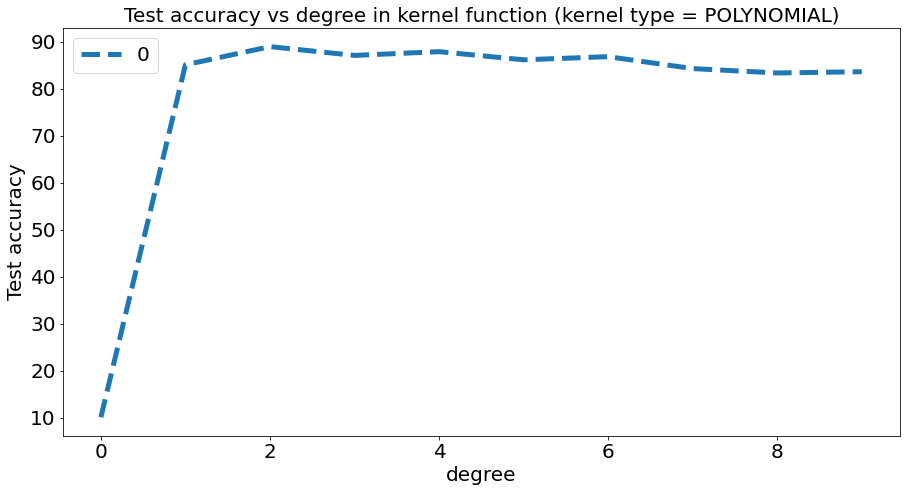

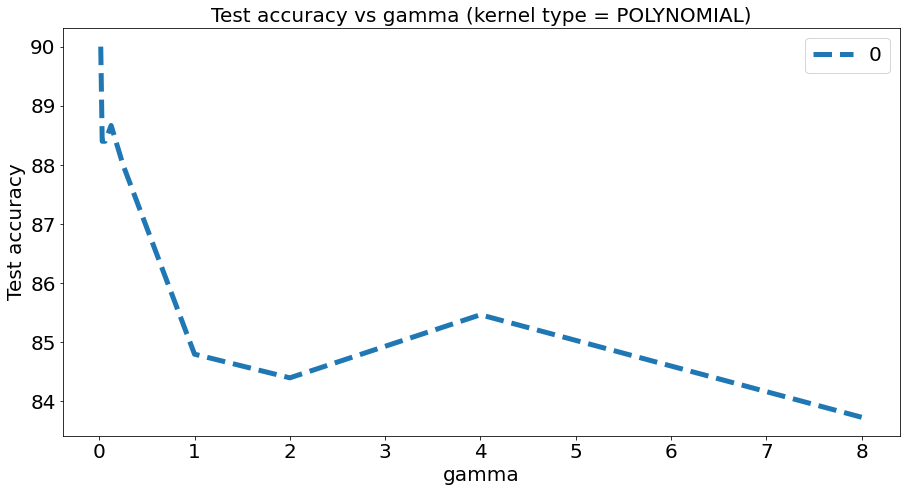

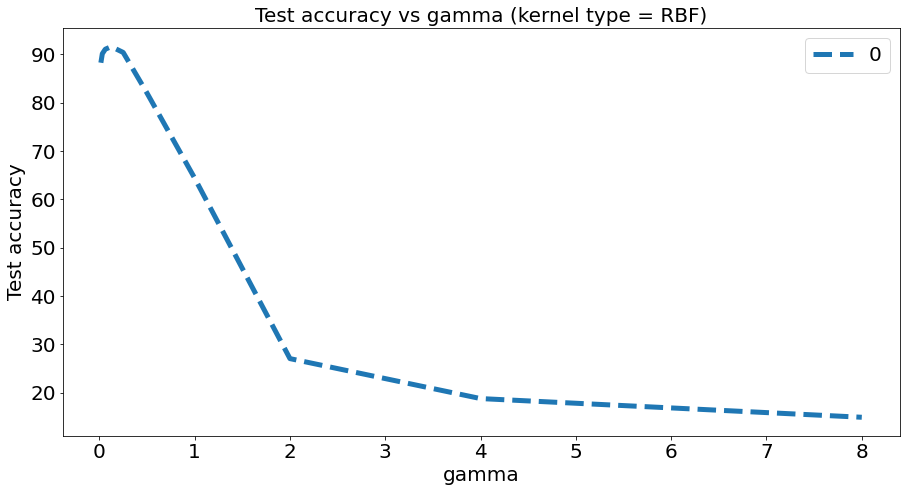

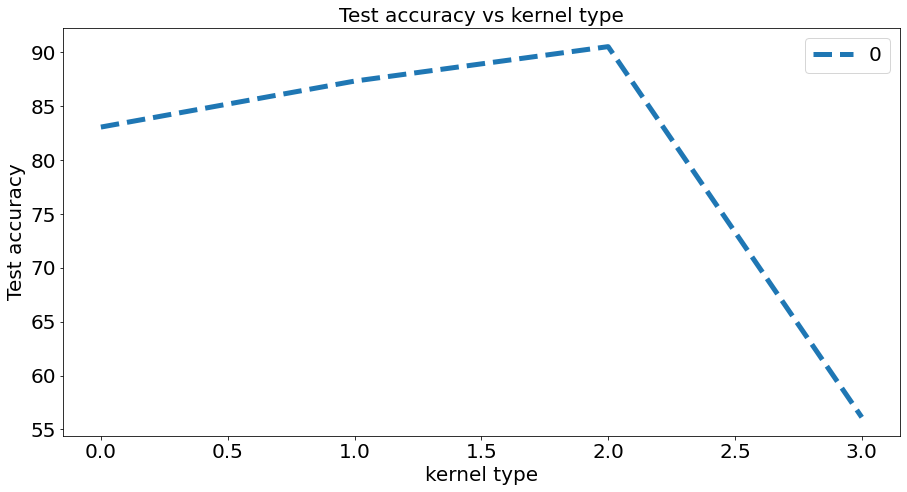

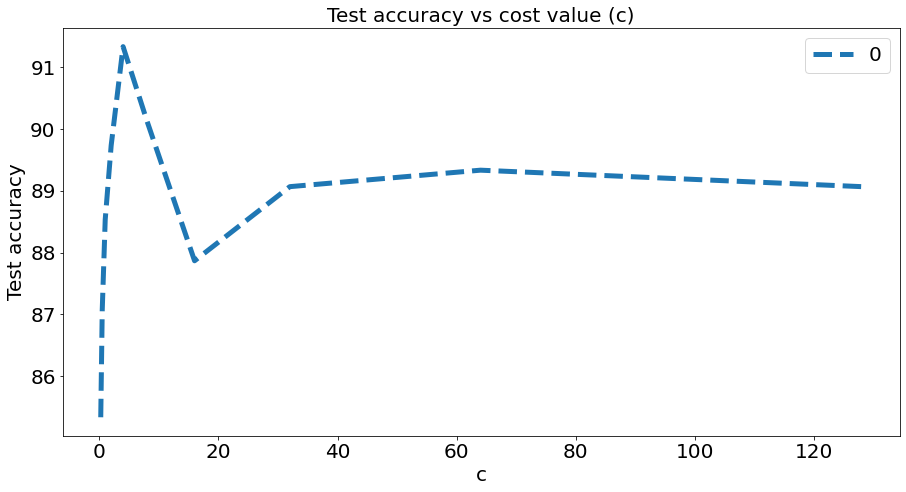

In [70]:
save_plots(plot_polydeg, img_data1, 75, 1, 'plot15.svg')
save_plots(plot_polygamma, img_data1, 75, 1, 'plot16.svg')
save_plots(plot_rbfgamma, img_data1, 75, 1, 'plot17.svg')
save_plots(plot_ktype, img_data1, 75, 1, 'plot18.svg')
save_plots(plot_cval, img_data1, 75, 1, 'plot19.svg')

Accuracy = 10.4% (78/750) (classification)
Accuracy = 82.4% (618/750) (classification)
Accuracy = 88.4% (663/750) (classification)
Accuracy = 86.2667% (647/750) (classification)
Accuracy = 85.3333% (640/750) (classification)
Accuracy = 87.2% (654/750) (classification)
Accuracy = 85.2% (639/750) (classification)
Accuracy = 83.2% (624/750) (classification)
Accuracy = 83.2% (624/750) (classification)
Accuracy = 83.2% (624/750) (classification)
Accuracy = 89.6% (672/750) (classification)
Accuracy = 88.9333% (667/750) (classification)
Accuracy = 89.2% (669/750) (classification)
Accuracy = 89.3333% (670/750) (classification)
Accuracy = 87.4667% (656/750) (classification)
Accuracy = 86.6667% (650/750) (classification)
Accuracy = 85.6% (642/750) (classification)
Accuracy = 88.2667% (662/750) (classification)
Accuracy = 86.9333% (652/750) (classification)
Accuracy = 86.2667% (647/750) (classification)
Accuracy = 90.9333% (682/750) (classification)
Accuracy = 91.3333% (685/750) (classification)


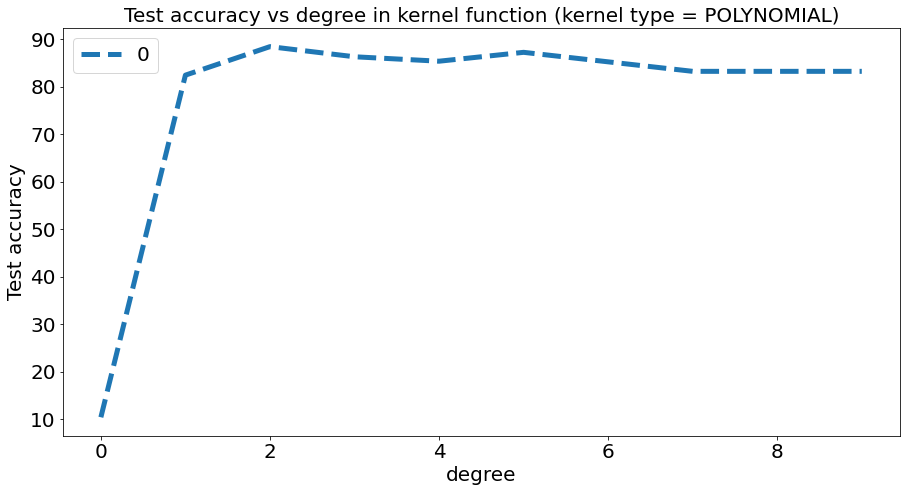

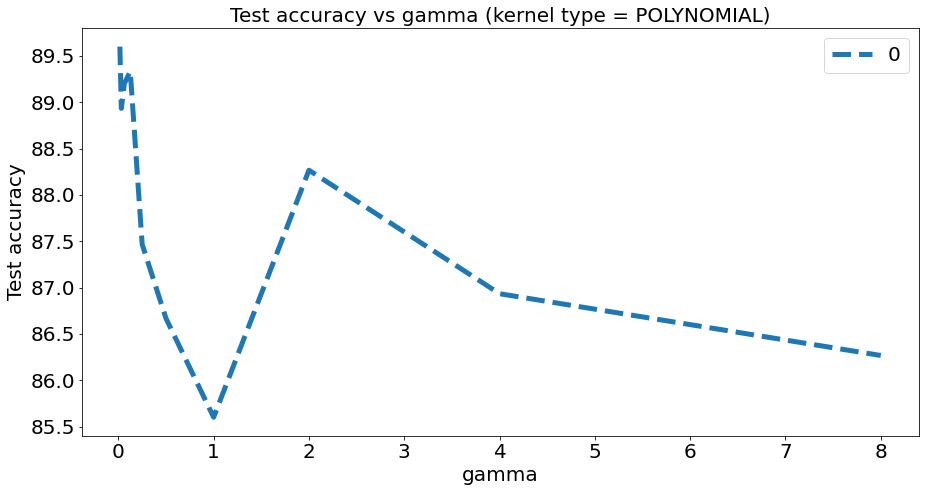

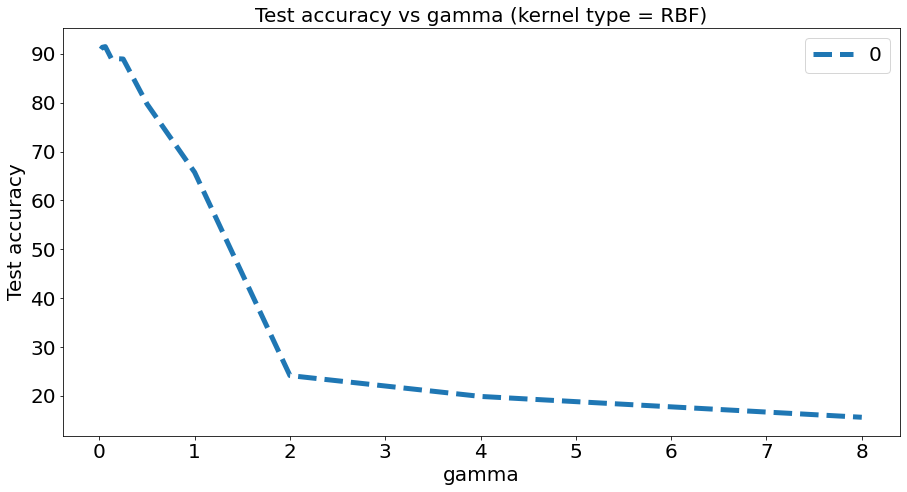

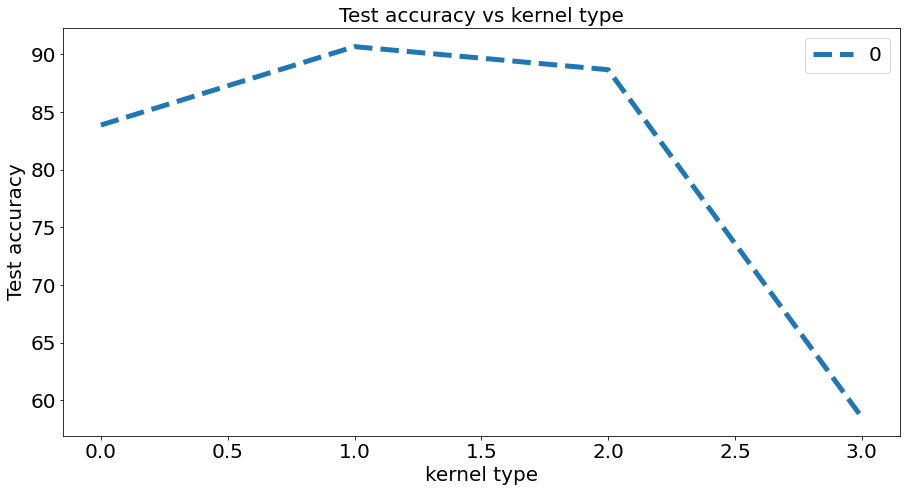

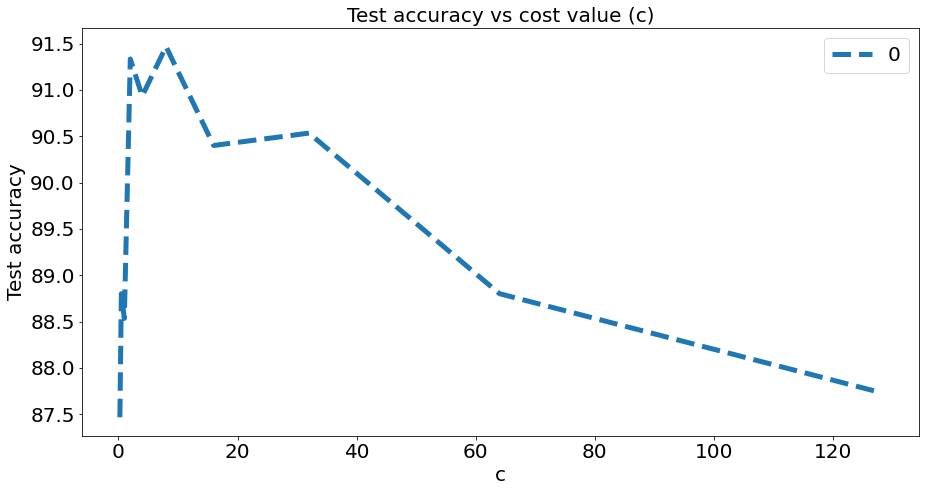

In [71]:
save_plots(plot_polydeg, img_data1, 75, 1, 'plot20.svg')
save_plots(plot_polygamma, img_data1, 75, 1, 'plot21.svg')
save_plots(plot_rbfgamma, img_data1, 75, 1, 'plot22.svg')
save_plots(plot_ktype, img_data1, 75, 1, 'plot23.svg')
save_plots(plot_cval, img_data1, 75, 1, 'plot24.svg')

In [72]:
img_data2 = IMAGE_DATA.drop(['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F21', 'F22', 'F23', 'F24', 'F25'], axis = 1)
img_data2

F11       F12       F13  ...       F19       F20  class_label
0     0.638329  0.433765  2.228255  ...  0.303223  0.137926          7.0
1    -0.956245 -0.809724 -0.423412  ... -0.424678 -0.014438          1.0
2    -0.277414  1.599624  0.875395  ...  1.368997 -0.745012          3.0
3     0.136494  0.575337 -2.338978  ... -0.008174 -0.559950          2.0
4    -0.630059  1.240954 -0.202304  ...  0.734458 -0.842683          5.0
...        ...       ...       ...  ...       ...       ...          ...
2995 -0.856515  1.192357  1.025365  ...  0.848278  0.052298          2.0
2996 -0.501167 -0.940197 -1.173121  ... -0.544630  0.312495          6.0
2997 -1.572103 -1.453141  1.817373  ...  1.079164  0.529654          0.0
2998 -0.354647 -0.100109 -0.200731  ... -0.868468  0.965434          5.0
2999  0.572016  0.504234  0.252221  ... -0.040038 -0.594674          3.0

[3000 rows x 11 columns]

Accuracy = 10.5333% (79/750) (classification)
Accuracy = 42.5333% (319/750) (classification)
Accuracy = 64.8% (486/750) (classification)
Accuracy = 62.6667% (470/750) (classification)
Accuracy = 59.4667% (446/750) (classification)
Accuracy = 59.3333% (445/750) (classification)
Accuracy = 57.6% (432/750) (classification)
Accuracy = 59.8667% (449/750) (classification)
Accuracy = 58.5333% (439/750) (classification)
Accuracy = 59.4667% (446/750) (classification)
Accuracy = 63.4667% (476/750) (classification)
Accuracy = 63.8667% (479/750) (classification)
Accuracy = 62.8% (471/750) (classification)
Accuracy = 60.8% (456/750) (classification)
Accuracy = 56.9333% (427/750) (classification)
Accuracy = 59.4667% (446/750) (classification)
Accuracy = 58.8% (441/750) (classification)
Accuracy = 54.6667% (410/750) (classification)
Accuracy = 50.2667% (377/750) (classification)
Accuracy = 54.6667% (410/750) (classification)
Accuracy = 63.6% (477/750) (classification)
Accuracy = 64% (480/750) (classi

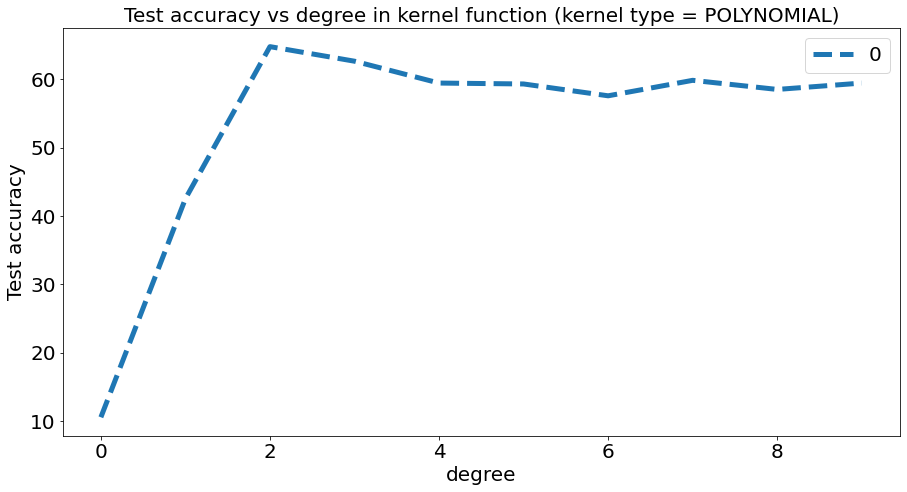

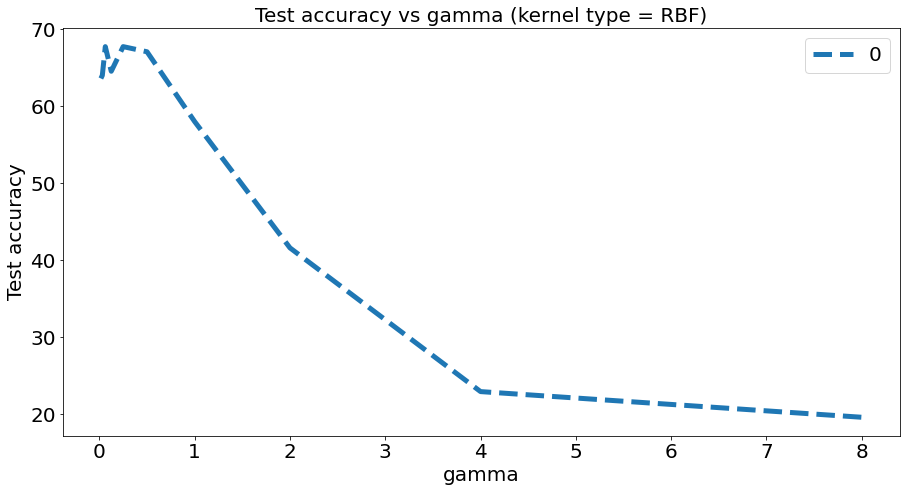

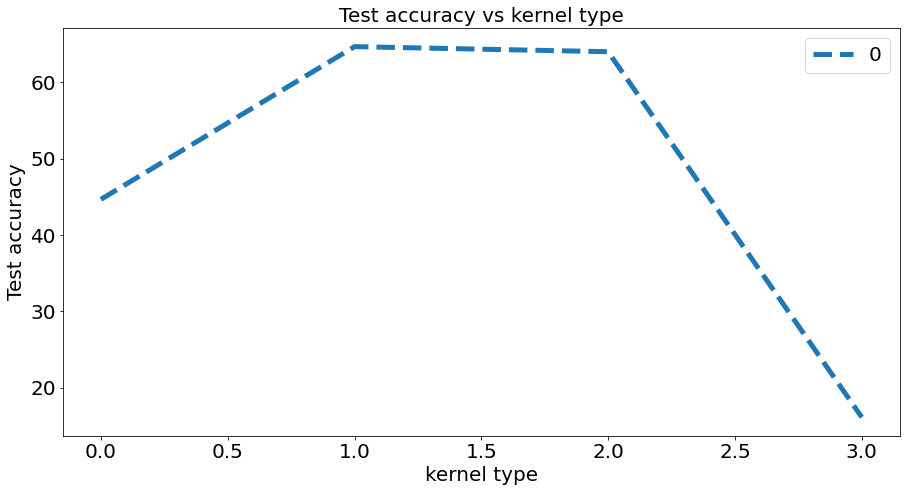

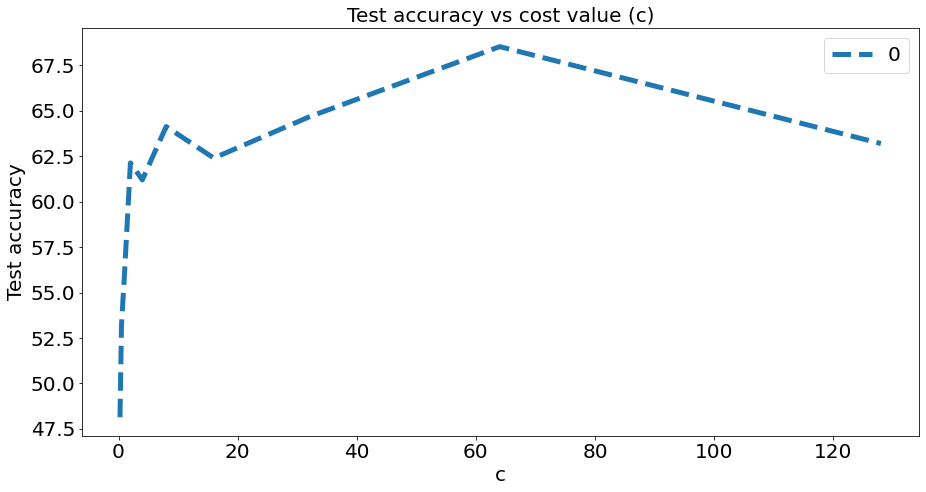

In [73]:
save_plots(plot_polydeg, img_data2, 75, 1, 'plot25.svg')
save_plots(plot_polygamma, img_data2, 75, 1, 'plot26.svg')
save_plots(plot_rbfgamma, img_data2, 75, 1, 'plot27.svg')
save_plots(plot_ktype, img_data2, 75, 1, 'plot28.svg')
save_plots(plot_cval, img_data2, 75, 1, 'plot29.svg')

Accuracy = 9.73333% (73/750) (classification)
Accuracy = 44.2667% (332/750) (classification)
Accuracy = 63.0667% (473/750) (classification)
Accuracy = 65.2% (489/750) (classification)
Accuracy = 61.0667% (458/750) (classification)
Accuracy = 61.8667% (464/750) (classification)
Accuracy = 59.6% (447/750) (classification)
Accuracy = 54.6667% (410/750) (classification)
Accuracy = 58.4% (438/750) (classification)
Accuracy = 56.1333% (421/750) (classification)
Accuracy = 60.8% (456/750) (classification)
Accuracy = 64.6667% (485/750) (classification)
Accuracy = 62.2667% (467/750) (classification)
Accuracy = 63.2% (474/750) (classification)
Accuracy = 55.8667% (419/750) (classification)
Accuracy = 58.5333% (439/750) (classification)
Accuracy = 57.6% (432/750) (classification)
Accuracy = 56.9333% (427/750) (classification)
Accuracy = 55.8667% (419/750) (classification)
Accuracy = 54% (405/750) (classification)
Accuracy = 62% (465/750) (classification)
Accuracy = 64.9333% (487/750) (classificat

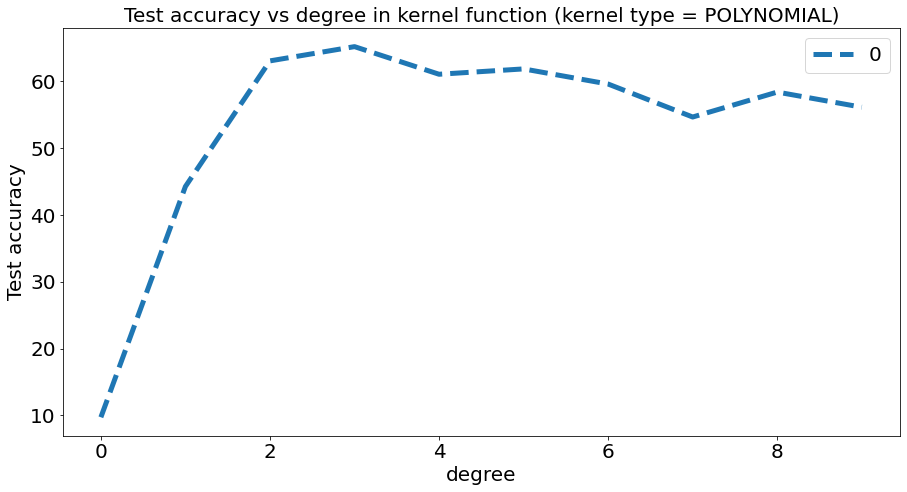

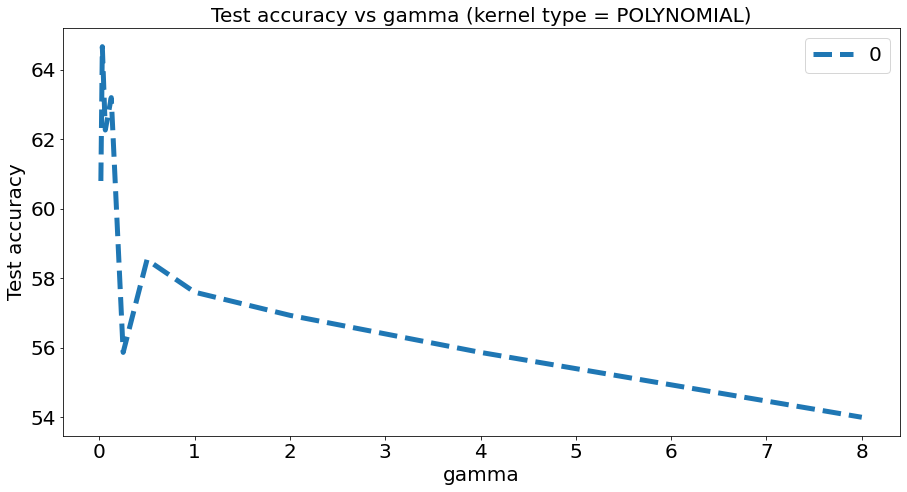

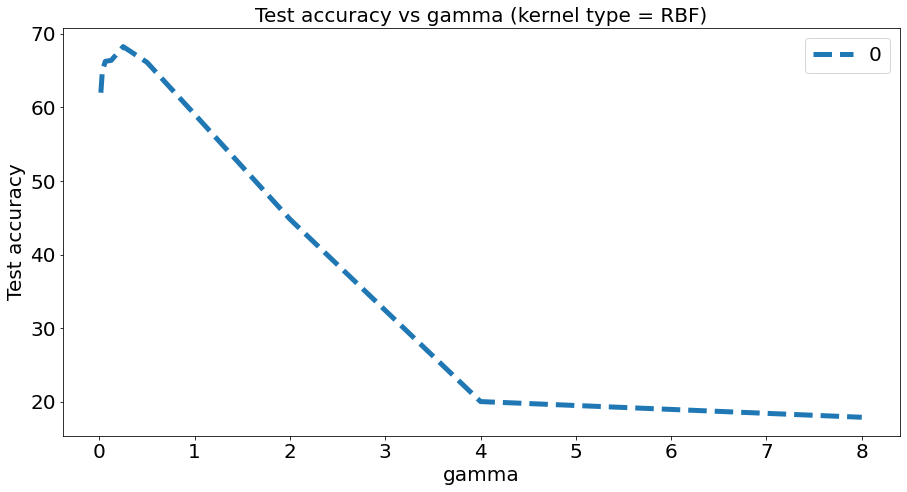

In [74]:
save_plots(plot_polydeg, img_data2, 75, 1, 'plot30.svg')
save_plots(plot_polygamma, img_data2, 75, 1, 'plot31.svg')
save_plots(plot_rbfgamma, img_data2, 75, 1, 'plot32.svg')
save_plots(plot_ktype, img_data2, 75, 1, 'plot33.svg')
save_plots(plot_cval, img_data2, 75, 1, 'plot34.svg')

## **PART 2**

Load the dataset and import all required packages and libraries.

In [75]:
from google.colab import files
uploaded = files.upload()

Saving train_set.csv to train_set.csv


In [76]:
import io
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from PIL import Image

In [77]:
TRAIN_DATA = pd.read_csv(io.BytesIO(uploaded['train_set.csv']), names=['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20', 'F21', 'F22', 'F23', 'F24', 'F25', 'class_label'])
TRAIN_DATA

F1        F2        F3  ...       F24       F25  class_label
0     0.241071 -0.382275 -0.071395  ... -0.462733  1.057861          2.0
1     1.009803 -1.756574 -3.779213  ... -0.220847 -1.002899          3.0
2     0.544482  2.549219 -1.033869  ... -0.041552 -1.040946          8.0
3    -0.385740 -2.533647 -2.164713  ...  0.242716  0.115380          3.0
4    -3.429625 -1.008043 -0.266236  ...  0.013644 -0.243033          1.0
...        ...       ...       ...  ...       ...       ...          ...
7995 -1.287028 -1.093704 -2.600912  ... -0.695812 -1.329153          8.0
7996 -0.469138 -2.635919 -3.037727  ... -0.293379 -1.312104          3.0
7997  4.098357 -0.096337 -1.045198  ...  0.492526  0.255800          0.0
7998  2.825730 -3.729644 -2.376964  ... -0.221208  0.612474          5.0
7999  0.679551 -0.367616  1.391191  ...  0.367261 -0.790719          2.0

[8000 rows x 26 columns]

In [78]:
from google.colab import files
uploaded = files.upload()

Saving test_set.csv to test_set.csv


In [79]:
TEST_DATA = pd.read_csv(io.BytesIO(uploaded['test_set.csv']), names=['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20', 'F21', 'F22', 'F23', 'F24', 'F25'])
TEST_DATA

F1        F2        F3  ...       F23       F24       F25
0    -3.500702 -2.976843  0.934516  ...  0.408949 -0.661300  0.554441
1    -3.959396 -2.017084  0.319540  ... -0.083040  0.040392 -0.548814
2    -3.641020 -1.486659 -0.073623  ...  0.262860  0.405049 -0.744915
3    -0.084150 -1.237680 -0.736304  ...  0.254029 -0.586919  0.293326
4    -3.577442 -0.575851  0.492993  ... -0.372977 -0.377574  0.195823
...        ...       ...       ...  ...       ...       ...       ...
1995 -1.472950 -1.275222 -2.719236  ... -0.169992 -0.756067  0.027858
1996 -0.337723 -1.308879  1.675904  ... -1.510537  0.582962 -0.014001
1997  2.244268 -0.900414 -2.536425  ... -1.173748 -0.245106  1.158986
1998  0.377416 -0.174252  0.523777  ...  0.968266 -1.070831  0.392584
1999 -2.234355  0.976261 -2.710615  ...  0.824499  0.618171  0.357257

[2000 rows x 25 columns]

### **Sci-kit Learn Classification**

In [80]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [81]:
def test_sklearn2(kt = 'rbf', c_value = 4, gamma_value = 0.032, deg_value = 3, train_data = TRAIN_DATA, test_data = TEST_DATA):
  t1 = train_data.drop(['class_label'], axis = 1)
  t1 = t1.to_numpy()
  t2 = test_data.to_numpy()
  t3 = train_data['class_label']
  t3 = t3.to_numpy()
  classifier = SVC(kernel = kt, C = c_value, gamma = gamma_value, degree = deg_value, decision_function_shape = 'ovr', )
  classifier.fit(t1, t3)
  Y_pred = classifier.predict(t2)
  #print(classification_report(t4, Y_pred))
  return Y_pred

In [82]:
test_sklearn2('rbf', 4, 0.032, 3, TRAIN_DATA, TEST_DATA)

array([1., 1., 1., ..., 0., 2., 7.])

In [83]:
def save_csv(ktype, cval, gamma_val, deg_val, filename):
  final_prediction = test_sklearn2(ktype, cval, gamma_val, deg_val, TRAIN_DATA, TEST_DATA)
  my_submission = pd.DataFrame(final_prediction, columns=['Class'])
  my_submission.to_csv(filename, index=False)

  with open(filename, 'w+') as f:
    f.write('Id,Class\n')
    for i in range(final_prediction.shape[0]):
      if i + 1 < 1000: 
        f.write('{},{:d}\n'.format(str(i+1), int(final_prediction[i])))
      else:
        f.write('\"{:01d},{:03d}\",{:d}\n'.format((i+1)//1000, (i+1)%1000, int(final_prediction[i])))

  #files.download(filename)


In [84]:
save_csv('linear', 2, 0.03, 2, 'submission.csv')  # SCORE = 0.91750
save_csv('poly', 2, 0.03, 2, 'submission1.csv')   # SCORE = 0.94625 => 'polynomial' kernel > 'linear' kernel
save_csv('poly', 2, 0.03, 3, 'submission2.csv')   # SCORE = 0.95500 => (DEGREE = 3) > (DEGREE = 2) in 'polynomial' kernel
save_csv('poly', 2, 0.03, 4, 'submission3.csv')   # SCORE = 0.93500 => (DEGREE = 3) > (DEGREE = 4) in 'polynomial' kernel
save_csv('poly', 2, 0.03, 3, 'submission4.csv')   # SCORE = 0.95500
save_csv('poly', 2, 0.05, 3, 'submission5.csv')   # SCORE = 0.94625 => increase in gamma value -> decrease in Score
save_csv('poly', 2, 0.1, 3, 'submission6.csv')    # SCORE = 0.94625
save_csv('poly', 2, 0.08, 3, 'submission7.csv')   # SCORE = 0.94625 => increase or decrease in gamma (beyong 0.5) -> no change in Score
save_csv('poly', 4, 0.03, 3, 'submission8.csv')   # SCORE = 0.94875 
save_csv('poly', 6, 0.03, 3, 'submission9.csv')   # SCORE = 0.94375 => increase or decrease in C -> slight change in Score

In [85]:
save_csv('poly', 2, 0.03, 3, 'submission4.csv')   # SCORE = 0.95500
save_csv('rbf', 2, 0.03, 3, 'submission10.csv')   # SCORE = 0.96625 => 'rbf' kernel > 'polynomial' kernel
save_csv('rbf', 2, 0.05, 3, 'submission11.csv')   # SCORE = 0.96625
save_csv('rbf', 2, 0.1, 3, 'submission12.csv')    # SCORE = 0.96500
save_csv('rbf', 2, 0.2, 3, 'submission13.csv')    # SCORE = 0.92125
save_csv('rbf', 2, 0.15, 3, 'submission14.csv')    # SCORE = 0.95625
save_csv('rbf', 2, 0.07, 3, 'submission15.csv')    # SCORE = 0.96750 
save_csv('rbf', 2, 0.08, 3, 'submission16.csv')    # SCORE = 0.96750 => increase in Score till gamma = 0.8 and then decrease 

save_csv('rbf', 2, 0.08, 2, 'submission17.csv')    # SCORE = 0.96750 
save_csv('rbf', 2, 0.08, 4, 'submission18.csv')    # SCORE = 0.96750 => no change in Score with variation in degree

save_csv('rbf', 4, 0.08, 3, 'submission19.csv')    # SCORE = 0.96750 
save_csv('rbf', 8, 0.08, 3, 'submission20.csv')    # SCORE = 0.96875  
save_csv('rbf', 16, 0.08, 3, 'submission21.csv')    # SCORE = 0.96875  
save_csv('rbf', 32, 0.08, 3, 'submission22.csv')    # SCORE = 0.96875 => slight increase in Score till C = 8 followed by no change  



Scores follow the trend :<br>

*   Linear < Polynomial < RBF
*   (For Polynomial) C = 2, gamma = 0.03, degree = 3 
*   **(For RBF) C = 8, gamma = 0.08, degree = 3** (optimal case, Score =0.96875)





In [86]:
test_sklearn2('rbf', 8, 0.08, 3, TRAIN_DATA, TEST_DATA)

array([1., 1., 1., ..., 0., 2., 7.])